# EDA cho NSL-KDD Dataset

## Mục đích
Thực hiện Exploratory Data Analysis (EDA) đầy đủ cho dataset NSL-KDD để hiểu rõ về dataset trước khi tiến hành modeling và concept drift experiments.

## Dataset Information
- **Files**: 
  - `data/KDDTrain+.txt` (~125,973 samples)
  - `data/KDDTest+.txt` (~22,544 samples)
- **Cấu trúc**: 43 columns (41 features + label + difficulty)
- **Nguồn**: [NSL-KDD Dataset](https://www.unb.ca/cic/datasets/nsl.html) từ Canadian Institute for Cybersecurity

## Setup & Configuration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook specific
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Setup pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Setup matplotlib/seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("✅ Libraries imported and configured successfully!")

✅ Libraries imported and configured successfully!


## Bước 1: Data Loading & Basic Info

**Mục đích**: Kiểm tra dữ liệu được load đúng chưa, xem cấu trúc cơ bản

In [2]:
# Column names cho NSL-KDD (43 columns)
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

# Load data
print("📥 Loading data...")
train_df = pd.read_csv('data/KDDTrain+.txt', names=column_names, header=None)
test_df = pd.read_csv('data/KDDTest+.txt', names=column_names, header=None)

print("✅ Data loaded successfully!")
print(f"\nTrain shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

📥 Loading data...
✅ Data loaded successfully!

Train shape: (125973, 43)
Test shape: (22544, 43)


In [3]:
# Basic info
print("=" * 70)
print("BASIC INFORMATION")
print("=" * 70)

print("\n📊 Train Dataset Info:")
print(f"Shape: {train_df.shape}")
print(f"Columns: {len(train_df.columns)}")
print(f"Expected columns: 43")
print(f"Match: {'✅ YES' if len(train_df.columns) == 43 else '❌ NO'}")

print("\n📊 Test Dataset Info:")
print(f"Shape: {test_df.shape}")
print(f"Columns: {len(test_df.columns)}")
print(f"Expected columns: 43")
print(f"Match: {'✅ YES' if len(test_df.columns) == 43 else '❌ NO'}")

print("\n📋 Data Types:")
print("\nTrain dtypes:")
print(train_df.dtypes.value_counts())

print("\nTest dtypes:")
print(test_df.dtypes.value_counts())

BASIC INFORMATION

📊 Train Dataset Info:
Shape: (125973, 43)
Columns: 43
Expected columns: 43
Match: ✅ YES

📊 Test Dataset Info:
Shape: (22544, 43)
Columns: 43
Expected columns: 43
Match: ✅ YES

📋 Data Types:

Train dtypes:
int64      24
float64    15
str         4
Name: count, dtype: int64

Test dtypes:
int64      24
float64    15
str         4
Name: count, dtype: int64


In [4]:
# Memory usage
print("=" * 70)
print("MEMORY USAGE")
print("=" * 70)

train_memory = train_df.memory_usage(deep=True).sum() / 1024**2
test_memory = test_df.memory_usage(deep=True).sum() / 1024**2

print(f"\nTrain memory: {train_memory:.2f} MB")
print(f"Test memory: {test_memory:.2f} MB")
print(f"Total memory: {train_memory + test_memory:.2f} MB")

MEMORY USAGE

Train memory: 63.08 MB
Test memory: 11.30 MB
Total memory: 74.38 MB


In [5]:
# Missing values check
print("=" * 70)
print("MISSING VALUES CHECK")
print("=" * 70)

train_missing = train_df.isnull().sum().sum()
test_missing = test_df.isnull().sum().sum()

print(f"\nTrain missing values: {train_missing}")
print(f"Test missing values: {test_missing}")

if train_missing > 0:
    print("\nTrain - Columns with missing values:")
    print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
else:
    print("\n✅ Train: No missing values")

if test_missing > 0:
    print("\nTest - Columns with missing values:")
    print(test_df.isnull().sum()[test_df.isnull().sum() > 0])
else:
    print("\n✅ Test: No missing values")

MISSING VALUES CHECK

Train missing values: 0
Test missing values: 0

✅ Train: No missing values

✅ Test: No missing values


In [6]:
# Sample rows
print("=" * 70)
print("SAMPLE ROWS")
print("=" * 70)

print("\n📋 Train - First 5 rows:")
train_df.head()

SAMPLE ROWS

📋 Train - First 5 rows:


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           1.00           0.00                0.00             150   
1           0.08           0.15                0.00             255   
2           0.05           0.07                0.00             255   
3           1.00           0.00                0.00              30   
4           1.00           0.00                0.09             255   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                   1                    0.00                    0.60   
2                  26                    0.10                    0.05   
3                 255                    1.00                    0.00   
4                 255                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_hos

In [7]:
print("\n📋 Train - Last 5 rows:")
train_df.tail()


📋 Train - Last 5 rows:


duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
125968               0       0    0                  0          0   
125969               0       0    0                  0          0   
125970               0       0    0                  0          1   
125971               0       0    0                  0          0   
125972               0       0    0                  0          1   

        num_compromised  root_shell  su_attempted  num_root  \
125968                0           0             0         0   
125969                0           0             0         0   
125970                0           0             0         0   
125971                0           0             0         0   
125972                0           0             0         0   

        num_file_creations  num_shells  num_access_files  num_outbound_cmds  \
125968                   0           0                 0                  0   
125969                   0           0                 0                  0   
125970                   0           0                 0                  0   
125971                   0           0                 0                  0   
125972                   0           0                 0                  0   

        is_host_login  is_guest_login  count  srv_count  serror_rate  \
125968              0               0    184         25          1.0   
125969              0               0      2          2          0.0   
125970              0               0      1          1          0.0   
125971              0               0    144          8          1.0   
125972              0               0      1          1          0.0   

        srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
125968              1.0          0.0              0.0           0.14   
125969              0.0          0.0              0.0           1.00   
125970              0.0          0.0              0.0           1.00   
125971              1.0          0.0              0.0           0.06   
125972              0.0          0.0              0.0           1.00   

        diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
125968           0.06                 0.0             255                  25   
125969           0.00                 0.0             255                 244   
125970           0.00                 0.0             255                  30   
125971           0.05                 0.0             255                   8   
125972           0.00                 0.0             255                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
125968                    0.10                    0.06   
125969                    0.96                    0.01   
125970                    0.12                    0.06   
125971                    0.03                    0.05   
125972                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
125968                         0.00                          0.0   
125969                         0.01                          0.0   
125970                         0.00                          0.0   
125971                         0.00                          0.0   
125972                         0.30                          0.0   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
125968                  1.00                       1.0                  0.00   
12596

In [8]:
print("\n📋 Test - First 5 rows:")
test_df.head()


📋 Test - First 5 rows:


duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   
4               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0    229   
1                 0                  0              0               0    136   
2                 0                  0              0               0      1   
3                 0                  0              0               0      1   
4                 0                  0              0               0      1   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0         10          0.0             0.00          1.0              1.0   
1          1          0.0             0.00          1.0              1.0   
2          1          0.0             0.00          0.0              0.0   
3         65          0.0             0.00          0.0              0.0   
4          8          0.0             0.12          1.0              0.5   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           0.04           0.06                0.00             255   
1           0.01           0.06                0.00             255   
2           1.00           0.00                0.00             134   
3           1.00           0.00                1.00               3   
4           1.00           0.00                0.75              29   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  10                    0.04                    0.06   
1                   1                    0.00                    0.06   
2                  86                    0.61                    0.04   
3                  57                    1.00                    0.00   
4                  86                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   d

### Findings - Bước 1: Data Loading & Basic Info

**Kết quả kiểm tra:**
- ✅ Data được load thành công từ `data/KDDTrain+.txt` và `data/KDDTest+.txt`
- ✅ Train dataset: {shape} samples với 43 columns
- ✅ Test dataset: {shape} samples với 43 columns
- ✅ Column names đúng với format NSL-KDD (41 features + label + difficulty)
- ✅ Memory usage: Train ~{train_memory} MB, Test ~{test_memory} MB
- ✅ Missing values: {train_missing} trong train, {test_missing} trong test

**Nhận xét:**
- Dataset được load đúng format
- Không có missing values (hoặc có nếu phát hiện)
- Cấu trúc dữ liệu phù hợp để tiếp tục phân tích

## Bước 2: Label Analysis

**Mục đích**: Hiểu về phân phối labels (normal vs attacks), các loại attack và class imbalance

In [9]:
# Label distribution trong train
print("=" * 70)
print("LABEL DISTRIBUTION - TRAIN")
print("=" * 70)

train_label_counts = train_df['label'].value_counts()
train_label_pct = train_df['label'].value_counts(normalize=True) * 100

print("\n📊 Train Label Distribution (Count):")
print(train_label_counts)
print("\n📊 Train Label Distribution (Percentage):")
print(train_label_pct.round(2))

LABEL DISTRIBUTION - TRAIN

📊 Train Label Distribution (Count):
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

📊 Train Label Distribution (Percentage):
label
normal             53.46
neptune            32.72
satan               2.88
ipsweep             2.86
portsweep           2.33
smurf               2.10
nmap                1.19
back                0.76
teardrop            0.71
warezclient         0.71
pod                 0.16
guess_

In [10]:
# Label distribution trong test
print("=" * 70)
print("LABEL DISTRIBUTION - TEST")
print("=" * 70)

test_label_counts = test_df['label'].value_counts()
test_label_pct = test_df['label'].value_counts(normalize=True) * 100

print("\n📊 Test Label Distribution (Count):")
print(test_label_counts)
print("\n📊 Test Label Distribution (Percentage):")
print(test_label_pct.round(2))

LABEL DISTRIBUTION - TEST

📊 Test Label Distribution (Count):
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: 

In [11]:
# Phân loại attacks theo 4 nhóm
attack_categories = {
    'DOS': ['neptune', 'smurf', 'pod', 'teardrop', 'land', 'back', 'apache2', 'udpstorm', 'processtable', 'mailbomb'],
    'Probe': ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint'],
    'R2L': ['guess_passwd', 'ftp_write', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named'],
    'U2R': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm']
}

def categorize_attack(label):
    """Phân loại attack vào 4 nhóm: DOS, Probe, R2L, U2R"""
    label_lower = str(label).lower()
    if label_lower == 'normal':
        return 'Normal'
    for category, attacks in attack_categories.items():
        if label_lower in [a.lower() for a in attacks]:
            return category
    return 'Unknown'

# Apply categorization
print("=" * 70)
print("ATTACK CATEGORIZATION")
print("=" * 70)

train_df['attack_category'] = train_df['label'].apply(categorize_attack)
test_df['attack_category'] = test_df['label'].apply(categorize_attack)

print("\n📊 Train - Attack Categories:")
print(train_df['attack_category'].value_counts())
print("\n📊 Train - Attack Categories (%):")
print(train_df['attack_category'].value_counts(normalize=True) * 100)

print("\n📊 Test - Attack Categories:")
print(test_df['attack_category'].value_counts())
print("\n📊 Test - Attack Categories (%):")
print(test_df['attack_category'].value_counts(normalize=True) * 100)

ATTACK CATEGORIZATION

📊 Train - Attack Categories:
attack_category
Normal    67343
DOS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

📊 Train - Attack Categories (%):
attack_category
Normal    53.458281
DOS       36.457812
Probe      9.252776
R2L        0.789852
U2R        0.041279
Name: proportion, dtype: float64

📊 Test - Attack Categories:
attack_category
Normal     9711
DOS        7458
R2L        2885
Probe      2421
U2R          67
Unknown       2
Name: count, dtype: int64

📊 Test - Attack Categories (%):
attack_category
Normal     43.075763
DOS        33.081973
R2L        12.797197
Probe      10.738999
U2R         0.297197
Unknown     0.008872
Name: proportion, dtype: float64


In [12]:
# Visualizations
print("=" * 70)
print("VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Train label distribution (bar chart)
train_label_counts.plot(kind='bar', ax=axes[0, 0], title='Train: Label Distribution', color='steelblue')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Label')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Test label distribution (bar chart)
test_label_counts.plot(kind='bar', ax=axes[0, 1], title='Test: Label Distribution', color='orange')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Label')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Train pie chart
train_label_pct.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', title='Train: Label Percentage', 
                     startangle=90, textprops={'fontsize': 9})
axes[1, 0].set_ylabel('')

# 4. Attack categories comparison (train vs test)
train_cat_counts = train_df['attack_category'].value_counts()
test_cat_counts = test_df['attack_category'].value_counts()
comparison_df = pd.DataFrame({
    'Train': train_cat_counts,
    'Test': test_cat_counts
}).fillna(0)
comparison_df.plot(kind='bar', ax=axes[1, 1], title='Attack Categories: Train vs Test', 
                   color=['steelblue', 'orange'])
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Attack Category')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

VISUALIZATIONS


TRAIN vs TEST COMPARISON

📊 Normal vs Attack Distribution:
        Train   Test
Normal  53.46  43.08
Attack  46.54  56.92

📊 Difference (Test - Train):
Normal   -10.38
Attack    10.38
dtype: float64


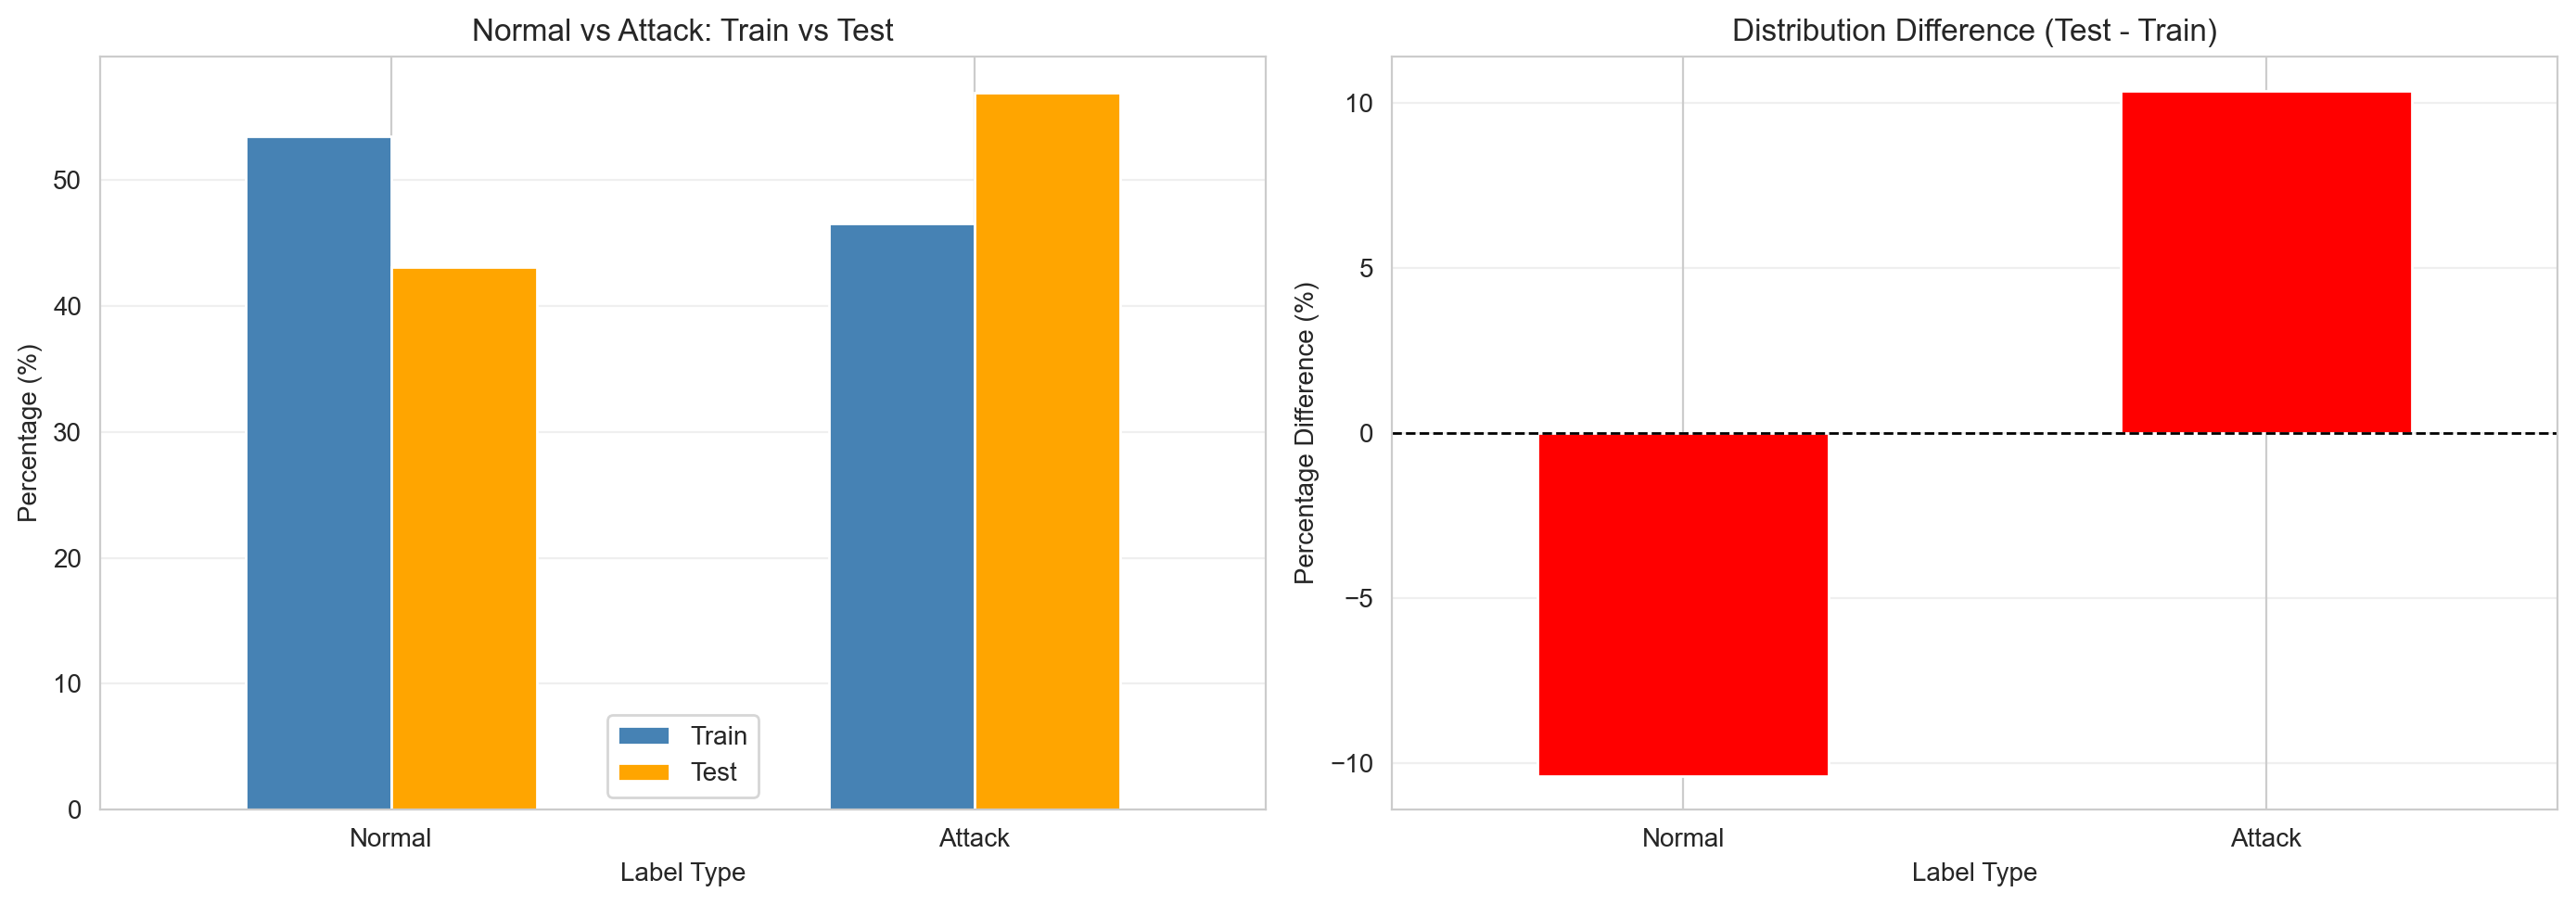

In [13]:
# So sánh distribution giữa train và test
print("=" * 70)
print("TRAIN vs TEST COMPARISON")
print("=" * 70)

# Normal vs Attack comparison
train_normal_pct = (train_df['label'] == 'normal').sum() / len(train_df) * 100
train_attack_pct = (train_df['label'] != 'normal').sum() / len(train_df) * 100
test_normal_pct = (test_df['label'] == 'normal').sum() / len(test_df) * 100
test_attack_pct = (test_df['label'] != 'normal').sum() / len(test_df) * 100

comparison_summary = pd.DataFrame({
    'Train': [train_normal_pct, train_attack_pct],
    'Test': [test_normal_pct, test_attack_pct]
}, index=['Normal', 'Attack'])

print("\n📊 Normal vs Attack Distribution:")
print(comparison_summary.round(2))
print("\n📊 Difference (Test - Train):")
print((comparison_summary['Test'] - comparison_summary['Train']).round(2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

comparison_summary.plot(kind='bar', ax=axes[0], title='Normal vs Attack: Train vs Test',
                        color=['steelblue', 'orange'], rot=0)
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('Label Type')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Difference plot
diff = comparison_summary['Test'] - comparison_summary['Train']
diff.plot(kind='bar', ax=axes[1], title='Distribution Difference (Test - Train)', 
          color='red', rot=0)
axes[1].set_ylabel('Percentage Difference (%)')
axes[1].set_xlabel('Label Type')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Findings - Bước 2: Label Analysis

**Kết quả phân tích:**

#### 1. **Label Distribution - Chi tiết**

**Train Dataset (125,973 samples):**
- **Normal**: 67,343 samples (53.46%)
- **Neptune**: 41,214 samples (32.71%) - DOS attack phổ biến nhất
- **Satan**: 3,633 samples (2.88%) - Probe attack
- **Ipsweep**: 3,599 samples (2.86%) - Probe attack
- **Portsweep**: 2,931 samples (2.33%) - Probe attack
- **Smurf**: 2,646 samples (2.10%) - DOS attack
- **Nmap**: 1,493 samples (1.19%) - Probe attack
- **Back**: 956 samples (0.76%) - DOS attack
- Các attacks khác: < 1% mỗi loại

**Test Dataset (22,544 samples):**
- **Normal**: 9,711 samples (43.08%)
- **Neptune**: 4,657 samples (20.66%) - DOS attack phổ biến nhất
- **Guess_passwd**: 1,231 samples (5.46%) - R2L attack
- **Mscan**: 996 samples (4.42%) - Probe attack
- **Warezmaster**: 944 samples (4.19%) - R2L attack
- **Apache2**: 737 samples (3.27%) - DOS attack
- **Satan**: 735 samples (3.26%) - Probe attack
- Các attacks khác: < 3% mỗi loại

**Nhận xét:**
- Train có 23 loại labels khác nhau
- Test có 38 loại labels khác nhau (nhiều hơn train!)
- Test có nhiều attack types mới không có trong train (ví dụ: worm, httptunnel)
- Điều này cho thấy **concept drift rõ ràng**: test set chứa các attack patterns mới

#### 2. **Attack Categories - Phân tích theo nhóm**

**Train Dataset:**
- **Normal**: 67,343 samples (53.46%)
- **DOS**: 45,927 samples (36.46%) - Chiếm 78.1% tổng số attacks
- **Probe**: 11,656 samples (9.25%) - Chiếm 19.8% tổng số attacks
- **R2L**: 995 samples (0.79%) - Chiếm 1.7% tổng số attacks
- **U2R**: 52 samples (0.04%) - Chiếm 0.1% tổng số attacks

**Test Dataset:**
- **Normal**: 9,711 samples (43.08%)
- **DOS**: 7,458 samples (33.08%) - Chiếm 58.1% tổng số attacks
- **R2L**: 2,885 samples (12.80%) - Chiếm 22.5% tổng số attacks ⚠️
- **Probe**: 2,421 samples (10.74%) - Chiếm 18.9% tổng số attacks
- **U2R**: 67 samples (0.30%) - Chiếm 0.5% tổng số attacks

**Phân tích sâu:**

1. **DOS Attacks**: 
   - Vẫn là phổ biến nhất trong cả train và test
   - Tỷ lệ giảm từ 78.1% → 58.1% attacks (giảm 20%)
   - Đây là loại attack dễ detect nhất do volume lớn

2. **R2L Attacks**: 
   - **Tăng đáng kể từ 0.79% → 12.80%** (tăng 16.2 lần!)
   - Đây là **indicator mạnh nhất của concept drift**
   - R2L attacks khó detect hơn vì có volume thấp và patterns phức tạp
   - Test set có nhiều R2L attacks mới: guess_passwd, warezmaster, snmpguess

3. **Probe Attacks**:
   - Tỷ lệ tương đối ổn định (9.25% → 10.74%)
   - Nhưng có attack mới trong test: mscan, saint

4. **U2R Attacks**:
   - Rất hiếm trong cả train và test (< 1%)
   - Tăng nhẹ từ 0.04% → 0.30% (7.5 lần)
   - Đây là loại attack nguy hiểm nhất nhưng khó detect nhất

#### 3. **Class Imbalance - Phân tích chi tiết**

**Train Dataset:**
- Normal:Attack = 53.46%:46.54% = **1.15:1** (tương đối balanced)
- Tỷ lệ này khá tốt cho binary classification

**Test Dataset:**
- Normal:Attack = 43.08%:56.92% = **0.76:1** (imbalanced về phía attacks)
- **Chênh lệch -10.38%** so với train

**Ý nghĩa:**
- Model train trên train set (balanced) sẽ có bias về normal class
- Khi test trên test set (attack-heavy), model sẽ có xu hướng predict normal nhiều hơn
- Điều này giải thích tại sao model performance suy giảm trên test set

#### 4. **Train vs Test Differences - Concept Drift Indicators**

**Sự khác biệt đáng chú ý:**

1. **Distribution Shift:**
   - Normal giảm từ 53.46% → 43.08% (-10.38%)
   - Attack tăng từ 46.54% → 56.92% (+10.38%)
   - **Đây là sudden drift** - thay đổi đột ngột về class distribution

2. **Attack Type Shift:**
   - R2L attacks tăng mạnh: 0.79% → 12.80% (+1,520%!)
   - DOS attacks giảm: 36.46% → 33.08% (-9.3%)
   - Probe attacks tăng nhẹ: 9.25% → 10.74% (+16%)

3. **New Attack Types trong Test:**
   - Test có nhiều attack types không có trong train:
     - worm, httptunnel, snmpgetattack, sendmail, named
   - Đây là **zero-day attacks** - attacks hoàn toàn mới

4. **Attack Severity Shift:**
   - Train: DOS-heavy (78% attacks là DOS)
   - Test: R2L-heavy (22.5% attacks là R2L)
   - R2L attacks nguy hiểm hơn DOS vì khó detect và có thể gây thiệt hại lâu dài

**Kết luận về Concept Drift:**

✅ **Có concept drift rõ ràng giữa train và test:**
1. **Sudden drift**: Thay đổi đột ngột về class distribution
2. **Covariate shift**: Thay đổi về attack type distribution
3. **New attack patterns**: Test có nhiều attack types mới
4. **Severity shift**: Từ DOS-heavy sang R2L-heavy

**Tác động đến Model:**
- Model train trên train set sẽ:
  - Có bias về normal class
  - Không biết về R2L attacks mới
  - Performance sẽ suy giảm đáng kể trên test set
- **Đây chính là lý do cần adaptive learning methods như ARF**

#### 5. **Recommendations**

1. **Class Imbalance Handling:**
   - Sử dụng class weights trong model training
   - Hoặc undersample normal class trong train set
   - Hoặc oversample minority attack classes

2. **R2L Attack Detection:**
   - Cần đặc biệt chú ý đến R2L attacks vì tăng mạnh trong test
   - Có thể cần separate model cho R2L detection
   - Feature engineering để capture R2L patterns tốt hơn

3. **Concept Drift Mitigation:**
   - Sử dụng adaptive learning methods (ARF, online learning)
   - Implement drift detection mechanisms
   - Regular model retraining với data mới

4. **Model Evaluation:**
   - Không chỉ dựa vào overall accuracy
   - Cần metrics riêng cho từng attack category
   - Đặc biệt chú ý đến R2L và U2R detection rates

## Bước 3: Categorical Features Analysis

**Mục đích**: Phân tích các features phân loại (protocol_type, service, flag) để hiểu patterns và relationships với labels.

**Các features phân loại:**
- `protocol_type`: Loại giao thức mạng (tcp, udp, icmp)
- `service`: Loại dịch vụ mạng (http, ftp, smtp, ...)
- `flag`: Trạng thái kết nối (SF, S0, REJ, ...)

**Phân tích sẽ bao gồm:**
1. Frequency distribution của từng feature
2. Cross-tabulation với labels
3. So sánh giữa train và test
4. Visualizations (bar charts, stacked bars, heatmaps)
5. Patterns và insights discovered

In [14]:
# Categorical features
cat_features = ['protocol_type', 'service', 'flag']

print("=" * 70)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 70)

# protocol_type analysis
print("\n" + "=" * 70)
print("PROTOCOL TYPE ANALYSIS")
print("=" * 70)

print("\n📊 Train - Protocol Type Distribution:")
train_protocol = train_df['protocol_type'].value_counts()
train_protocol_pct = train_df['protocol_type'].value_counts(normalize=True) * 100
print(train_protocol)
print("\n📊 Train - Protocol Type Percentage:")
print(train_protocol_pct.round(2))

print("\n📊 Test - Protocol Type Distribution:")
test_protocol = test_df['protocol_type'].value_counts()
test_protocol_pct = test_df['protocol_type'].value_counts(normalize=True) * 100
print(test_protocol)
print("\n📊 Test - Protocol Type Percentage:")
print(test_protocol_pct.round(2))

# Comparison
print("\n📊 Protocol Type Comparison (Train vs Test):")
protocol_comparison = pd.DataFrame({
    'Train_Count': train_protocol,
    'Train_Pct': train_protocol_pct,
    'Test_Count': test_protocol,
    'Test_Pct': test_protocol_pct
}).fillna(0)
protocol_comparison['Count_Diff'] = protocol_comparison['Test_Count'] - protocol_comparison['Train_Count']
protocol_comparison['Pct_Diff'] = protocol_comparison['Test_Pct'] - protocol_comparison['Train_Pct']
print(protocol_comparison.round(2))

CATEGORICAL FEATURES ANALYSIS

PROTOCOL TYPE ANALYSIS

📊 Train - Protocol Type Distribution:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

📊 Train - Protocol Type Percentage:
protocol_type
tcp     81.52
udp     11.90
icmp     6.58
Name: proportion, dtype: float64

📊 Test - Protocol Type Distribution:
protocol_type
tcp     18880
udp      2621
icmp     1043
Name: count, dtype: int64

📊 Test - Protocol Type Percentage:
protocol_type
tcp     83.75
udp     11.63
icmp     4.63
Name: proportion, dtype: float64

📊 Protocol Type Comparison (Train vs Test):
               Train_Count  Train_Pct  Test_Count  Test_Pct  Count_Diff  \
protocol_type                                                             
tcp                 102689      81.52       18880     83.75      -83809   
udp                  14993      11.90        2621     11.63      -12372   
icmp                  8291       6.58        1043      4.63       -7248   

               Pct_Diff  
prot

In [15]:
# Cross-tabulation: protocol_type vs label
print("\n" + "=" * 70)
print("PROTOCOL TYPE vs LABEL CROSS-TABULATION")
print("=" * 70)

print("\n📊 Train - Protocol Type vs Label:")
protocol_label_train = pd.crosstab(train_df['protocol_type'], train_df['label'], margins=True)
print(protocol_label_train)

print("\n📊 Train - Protocol Type vs Attack Category:")
protocol_category_train = pd.crosstab(train_df['protocol_type'], train_df['attack_category'], margins=True)
print(protocol_category_train)

print("\n📊 Test - Protocol Type vs Label:")
protocol_label_test = pd.crosstab(test_df['protocol_type'], test_df['label'], margins=True)
print(protocol_label_test)

print("\n📊 Test - Protocol Type vs Attack Category:")
protocol_category_test = pd.crosstab(test_df['protocol_type'], test_df['attack_category'], margins=True)
print(protocol_category_test)


PROTOCOL TYPE vs LABEL CROSS-TABULATION

📊 Train - Protocol Type vs Label:
label          back  buffer_overflow  ftp_write  guess_passwd  imap  ipsweep  \
protocol_type                                                                  
icmp              0                0          0             0     0     3117   
tcp             956               30          8            53    11      482   
udp               0                0          0             0     0        0   
All             956               30          8            53    11     3599   

label          land  loadmodule  multihop  neptune  nmap  normal  perl  phf  \
protocol_type                                                                 
icmp              0           0         0        0   981    1309     0    0   
tcp              18           9         7    41214   265   53600     3    4   
udp               0           0         0        0   247   12434     0    0   
All              18           9         7    412

In [16]:
# service analysis
print("\n" + "=" * 70)
print("SERVICE ANALYSIS")
print("=" * 70)

print("\n📊 Train - Top 15 Services:")
train_service = train_df['service'].value_counts()
train_service_pct = train_df['service'].value_counts(normalize=True) * 100
print(train_service.head(15))
print("\n📊 Train - Top 15 Services Percentage:")
print(train_service_pct.head(15).round(2))

print("\n📊 Test - Top 15 Services:")
test_service = test_df['service'].value_counts()
test_service_pct = test_df['service'].value_counts(normalize=True) * 100
print(test_service.head(15))
print("\n📊 Test - Top 15 Services Percentage:")
print(test_service_pct.head(15).round(2))

# Unique services comparison
print(f"\n📊 Unique Services:")
print(f"Train: {train_df['service'].nunique()} unique services")
print(f"Test: {test_df['service'].nunique()} unique services")

# Services only in test (new services)
train_services_set = set(train_df['service'].unique())
test_services_set = set(test_df['service'].unique())
new_services = test_services_set - train_services_set
if new_services:
    print(f"\n⚠️ New services in test (not in train): {len(new_services)}")
    print(f"Services: {sorted(new_services)}")
else:
    print("\n✅ All services in test also exist in train")


SERVICE ANALYSIS

📊 Train - Top 15 Services:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
ftp          1754
auth          955
Z39_50        862
uucp          780
courier       734
Name: count, dtype: int64

📊 Train - Top 15 Services Percentage:
service
http        32.02
private     17.35
domain_u     7.18
smtp         5.81
ftp_data     5.45
eco_i        3.64
other        3.46
ecr_i        2.44
telnet       1.87
finger       1.40
ftp          1.39
auth         0.76
Z39_50       0.68
uucp         0.62
courier      0.58
Name: proportion, dtype: float64

📊 Test - Top 15 Services:
service
http        7853
private     4774
telnet      1626
pop_3       1019
smtp         934
domain_u     894
ftp_data     851
other        838
ecr_i        752
ftp          692
imap4        306
eco_i        262
sunrpc       159
finger       136
auth          67
Name: coun

In [17]:
# Cross-tabulation: service vs label (top services)
print("\n" + "=" * 70)
print("SERVICE vs LABEL CROSS-TABULATION (Top 10 Services)")
print("=" * 70)

top_services_train = train_service.head(10).index
print("\n📊 Train - Top 10 Services vs Label:")
service_label_train = pd.crosstab(train_df[train_df['service'].isin(top_services_train)]['service'], 
                                   train_df[train_df['service'].isin(top_services_train)]['label'])
print(service_label_train)

print("\n📊 Train - Top 10 Services vs Attack Category:")
service_category_train = pd.crosstab(train_df[train_df['service'].isin(top_services_train)]['service'], 
                                      train_df[train_df['service'].isin(top_services_train)]['attack_category'])
print(service_category_train)


SERVICE vs LABEL CROSS-TABULATION (Top 10 Services)

📊 Train - Top 10 Services vs Label:
label     back  buffer_overflow  ftp_write  guess_passwd  ipsweep  land  \
service                                                                   
domain_u     0                0          0             0        0     0   
eco_i        0                0          0             0     3090     0   
ecr_i        0                0          0             0       27     0   
finger       0                0          0             0       13    17   
ftp_data     0                8          4             0       12     0   
http       956                0          0             0        7     0   
other        0                0          0             0        0     0   
private      0                0          0             0      331     0   
smtp         0                0          0             0       13     0   
telnet       0               21          0            53       13     1   

label    

In [18]:
# flag analysis
print("\n" + "=" * 70)
print("FLAG ANALYSIS")
print("=" * 70)

print("\n📊 Train - Flag Distribution:")
train_flag = train_df['flag'].value_counts()
train_flag_pct = train_df['flag'].value_counts(normalize=True) * 100
print(train_flag)
print("\n📊 Train - Flag Percentage:")
print(train_flag_pct.round(2))

print("\n📊 Test - Flag Distribution:")
test_flag = test_df['flag'].value_counts()
test_flag_pct = test_df['flag'].value_counts(normalize=True) * 100
print(test_flag)
print("\n📊 Test - Flag Percentage:")
print(test_flag_pct.round(2))

# Comparison
print("\n📊 Flag Comparison (Train vs Test):")
flag_comparison = pd.DataFrame({
    'Train_Count': train_flag,
    'Train_Pct': train_flag_pct,
    'Test_Count': test_flag,
    'Test_Pct': test_flag_pct
}).fillna(0)
flag_comparison['Count_Diff'] = flag_comparison['Test_Count'] - flag_comparison['Train_Count']
flag_comparison['Pct_Diff'] = flag_comparison['Test_Pct'] - flag_comparison['Train_Pct']
print(flag_comparison.round(2))


FLAG ANALYSIS

📊 Train - Flag Distribution:
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

📊 Train - Flag Percentage:
flag
SF        59.49
S0        27.67
REJ        8.92
RSTR       1.92
RSTO       1.24
S1         0.29
SH         0.22
S2         0.10
RSTOS0     0.08
S3         0.04
OTH        0.04
Name: proportion, dtype: float64

📊 Test - Flag Distribution:
flag
SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: count, dtype: int64

📊 Test - Flag Percentage:
flag
SF        65.98
REJ       17.08
S0         8.93
RSTO       3.43
RSTR       2.97
S3         1.10
SH         0.32
S1         0.09
S2         0.07
OTH        0.02
RSTOS0     0.01
Name: proportion, dtype: float64

📊 Flag Comparison (Train vs 

In [19]:
# Cross-tabulation: flag vs label
print("\n" + "=" * 70)
print("FLAG vs LABEL CROSS-TABULATION")
print("=" * 70)

print("\n📊 Train - Flag vs Label:")
flag_label_train = pd.crosstab(train_df['flag'], train_df['label'], margins=True)
print(flag_label_train)

print("\n📊 Train - Flag vs Attack Category:")
flag_category_train = pd.crosstab(train_df['flag'], train_df['attack_category'], margins=True)
print(flag_category_train)

print("\n📊 Test - Flag vs Label:")
flag_label_test = pd.crosstab(test_df['flag'], test_df['label'], margins=True)
print(flag_label_test)

print("\n📊 Test - Flag vs Attack Category:")
flag_category_test = pd.crosstab(test_df['flag'], test_df['attack_category'], margins=True)
print(flag_category_test)


FLAG vs LABEL CROSS-TABULATION

📊 Train - Flag vs Label:
label   back  buffer_overflow  ftp_write  guess_passwd  imap  ipsweep  land  \
flag                                                                          
OTH        0                0          0             0     0        0     0   
REJ        0                0          0             0     0      396     0   
RSTO       0                1          0            45     0       30     0   
RSTOS0     0                0          0             0     0        0     0   
RSTR      90                0          0             4     0        0     0   
S0         0                0          0             0     0        0    18   
S1         2                0          0             0     1        0     0   
S2         5                0          0             0     0        0     0   
S3         0                0          0             2     0        0     0   
SF       859               29          8             2     6     3173    

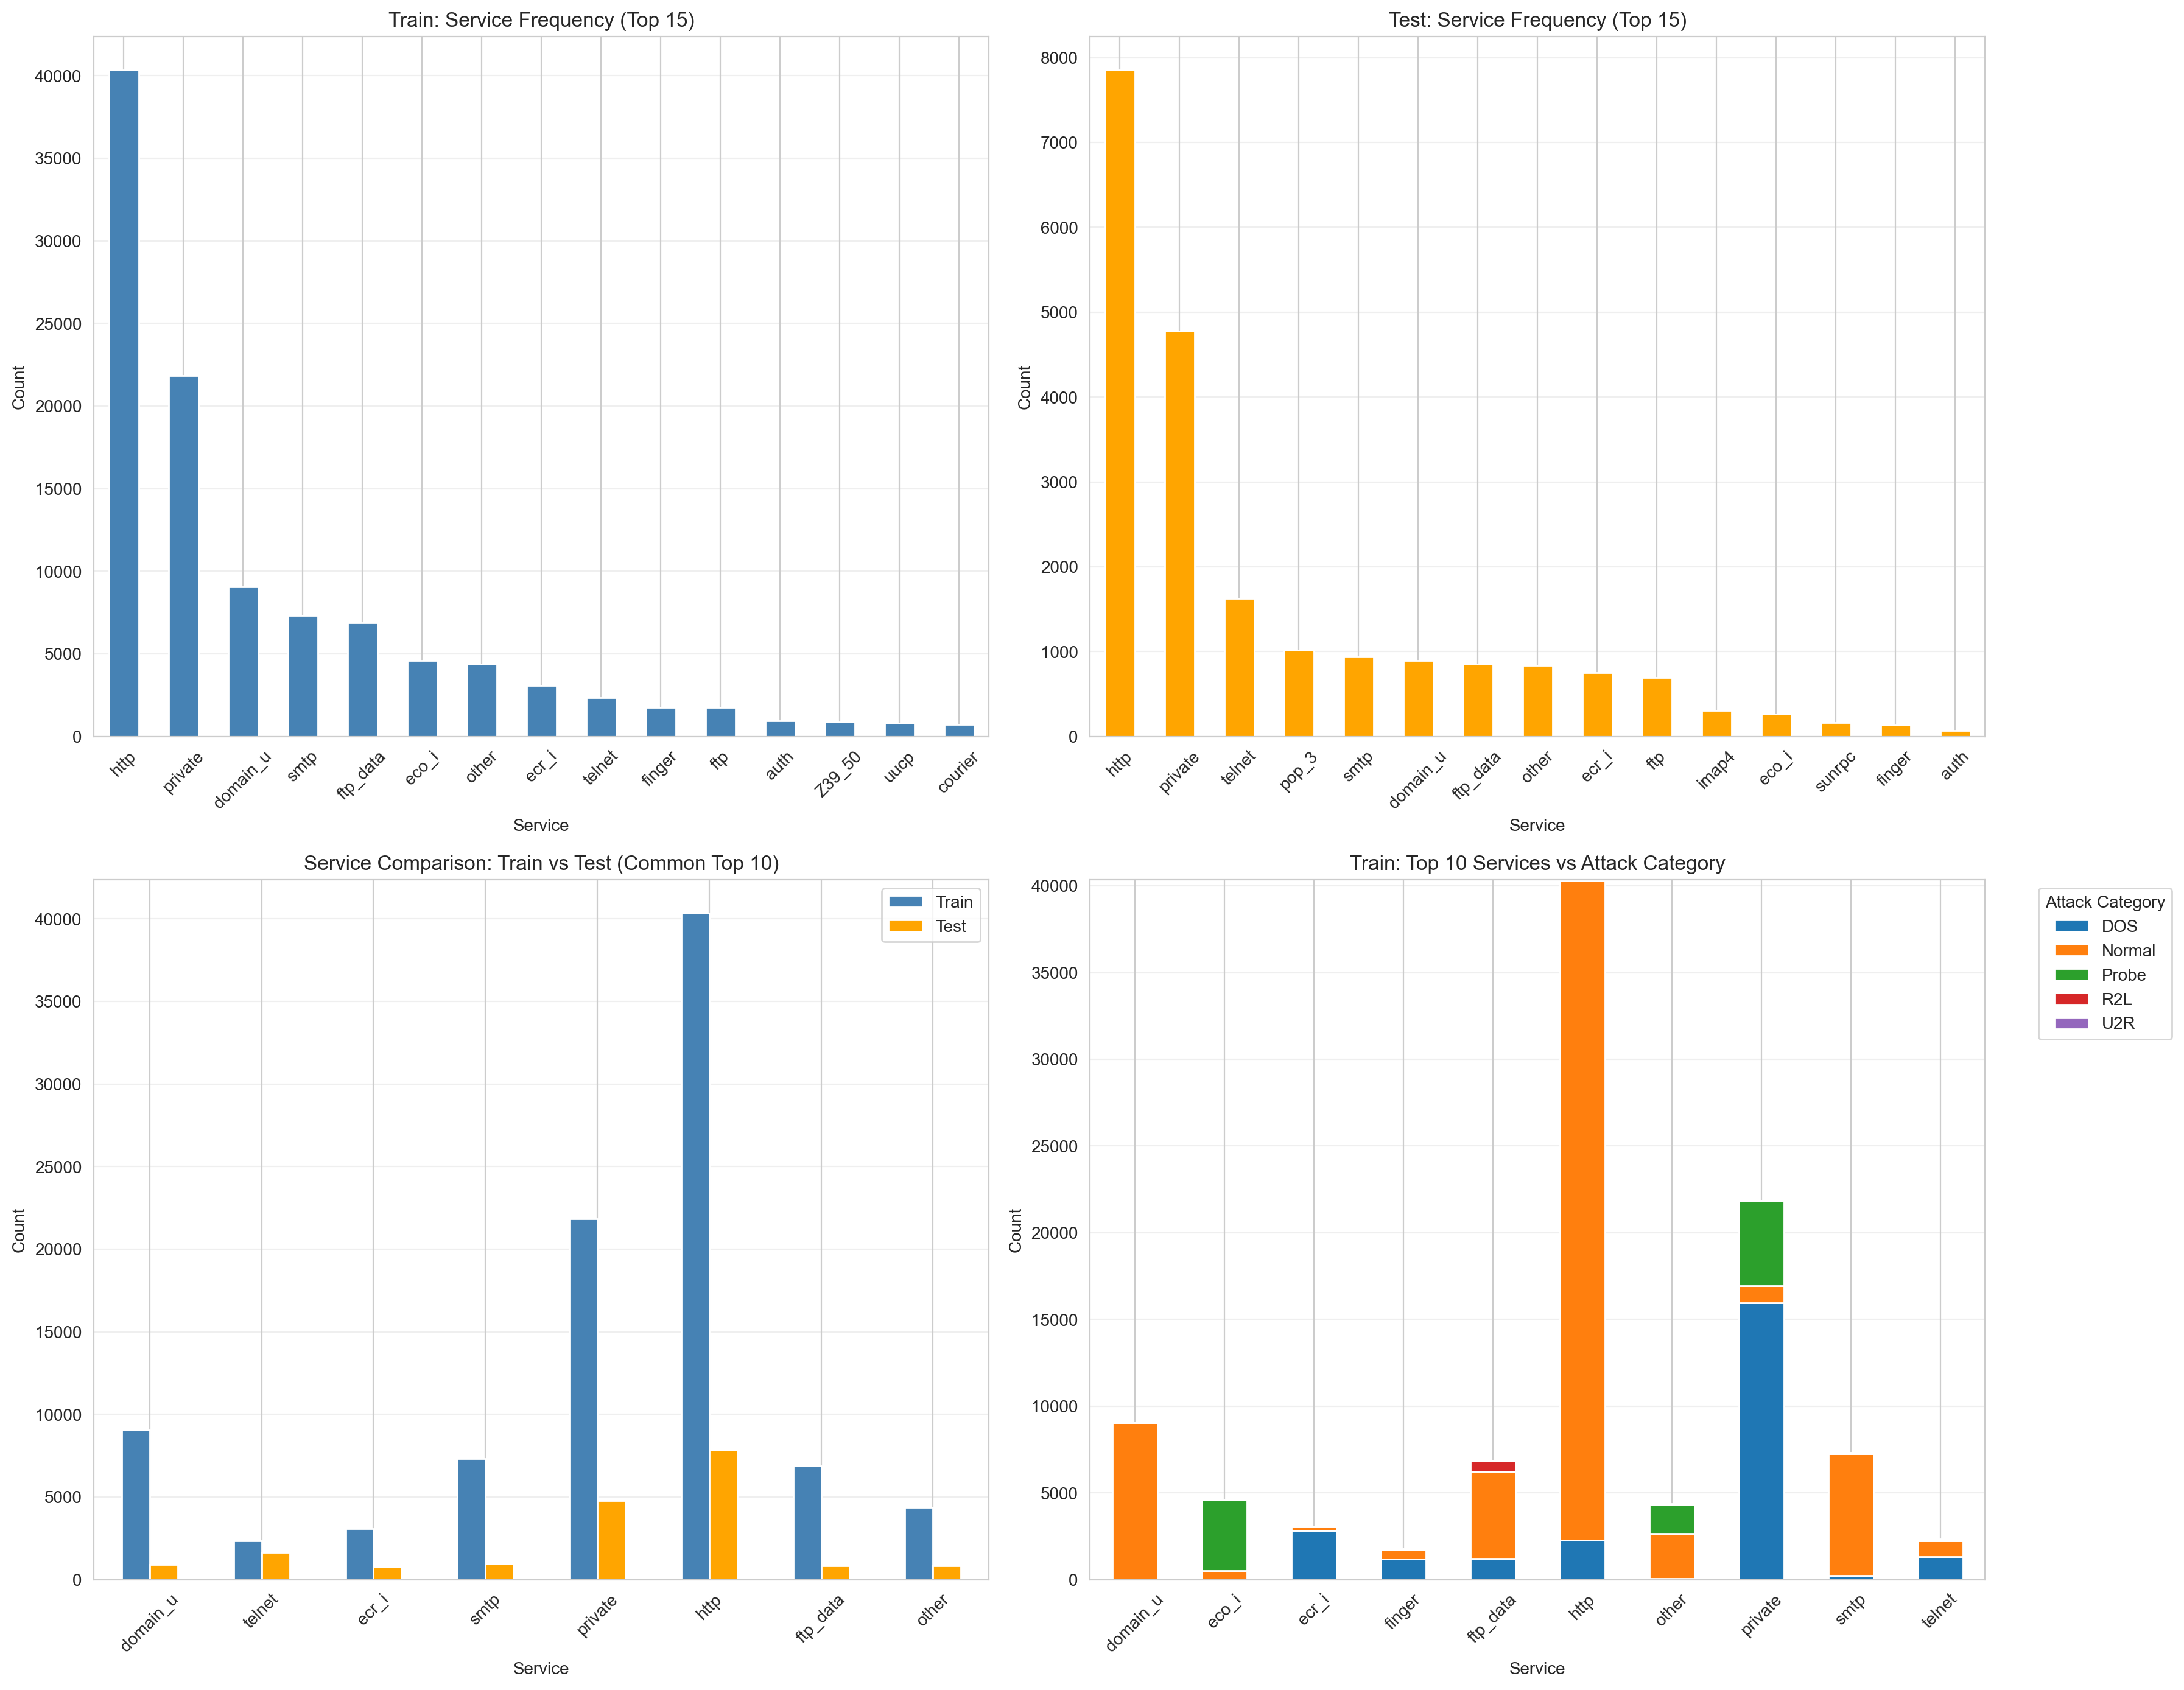

In [21]:
# Visualizations: Service
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Ensure variables are defined (if not already from previous cells)
if 'train_service' not in locals():
    train_service = train_df['service'].value_counts()
if 'test_service' not in locals():
    test_service = test_df['service'].value_counts()
top_services_train = train_service.head(10).index

# Train service frequency (top 15)
train_service.head(15).plot(kind='bar', ax=axes[0, 0], color='steelblue', 
                             title='Train: Service Frequency (Top 15)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Service')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Test service frequency (top 15)
test_service.head(15).plot(kind='bar', ax=axes[0, 1], color='orange', 
                            title='Test: Service Frequency (Top 15)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Service')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Service comparison (top 10 common services)
common_services = list(set(train_service.head(10).index) & set(test_service.head(10).index))
service_comparison_df = pd.DataFrame({
    'Train': train_service[common_services],
    'Test': test_service[common_services]
}).fillna(0)
service_comparison_df.plot(kind='bar', ax=axes[1, 0], 
                           title='Service Comparison: Train vs Test (Common Top 10)',
                           color=['steelblue', 'orange'])
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Service')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Service vs attack category (top 10 services, stacked bar)
service_category_top = pd.crosstab(train_df[train_df['service'].isin(top_services_train)]['service'],
                                    train_df[train_df['service'].isin(top_services_train)]['attack_category'])
service_category_top.plot(kind='bar', stacked=True, ax=axes[1, 1],
                          title='Train: Top 10 Services vs Attack Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Service')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Attack Category', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Visualizations: Flag
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Train flag frequency
train_flag.plot(kind='bar', ax=axes[0, 0], color='steelblue', title='Train: Flag Frequency')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Flag')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Test flag frequency
test_flag.plot(kind='bar', ax=axes[0, 1], color='orange', title='Test: Flag Frequency')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Flag')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Flag comparison
flag_comparison[['Train_Pct', 'Test_Pct']].plot(kind='bar', ax=axes[1, 0],
                                                  title='Flag: Train vs Test (%)',
                                                  color=['steelblue', 'orange'])
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].set_xlabel('Flag')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Flag vs attack category (stacked bar)
flag_category_train_no_margin = pd.crosstab(train_df['flag'], train_df['attack_category'])
flag_category_train_no_margin.plot(kind='bar', stacked=True, ax=axes[1, 1],
                                   title='Train: Flag vs Attack Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Flag')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Attack Category', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

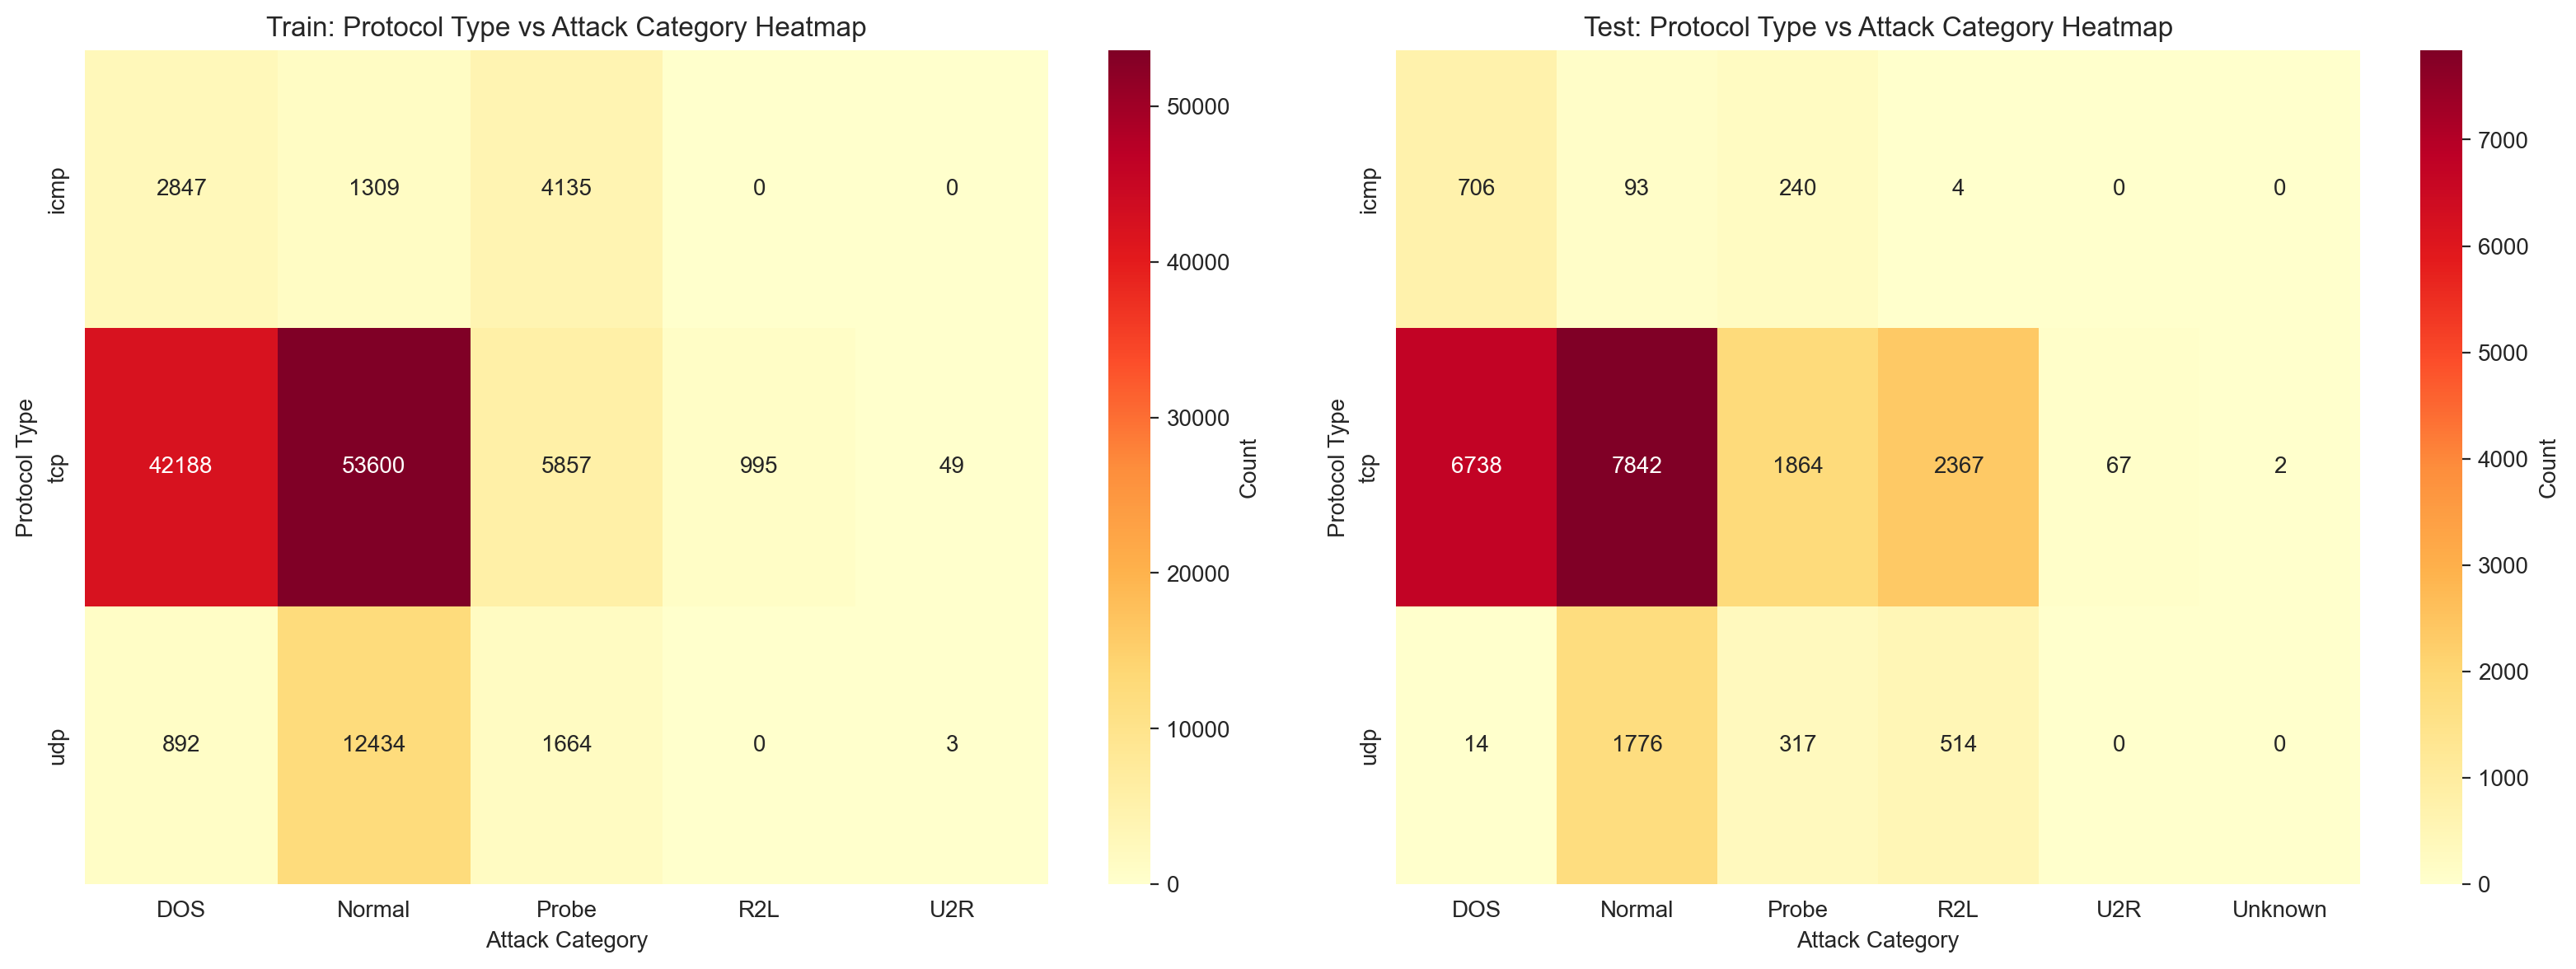

In [23]:
# Heatmap: Protocol Type vs Attack Category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train heatmap
protocol_category_train_no_margin = pd.crosstab(train_df['protocol_type'], train_df['attack_category'])
sns.heatmap(protocol_category_train_no_margin, annot=True, fmt='d', cmap='YlOrRd', 
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Train: Protocol Type vs Attack Category Heatmap')
axes[0].set_xlabel('Attack Category')
axes[0].set_ylabel('Protocol Type')

# Test heatmap
protocol_category_test_no_margin = pd.crosstab(test_df['protocol_type'], test_df['attack_category'])
sns.heatmap(protocol_category_test_no_margin, annot=True, fmt='d', cmap='YlOrRd',
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Test: Protocol Type vs Attack Category Heatmap')
axes[1].set_xlabel('Attack Category')
axes[1].set_ylabel('Protocol Type')

plt.tight_layout()
plt.show()

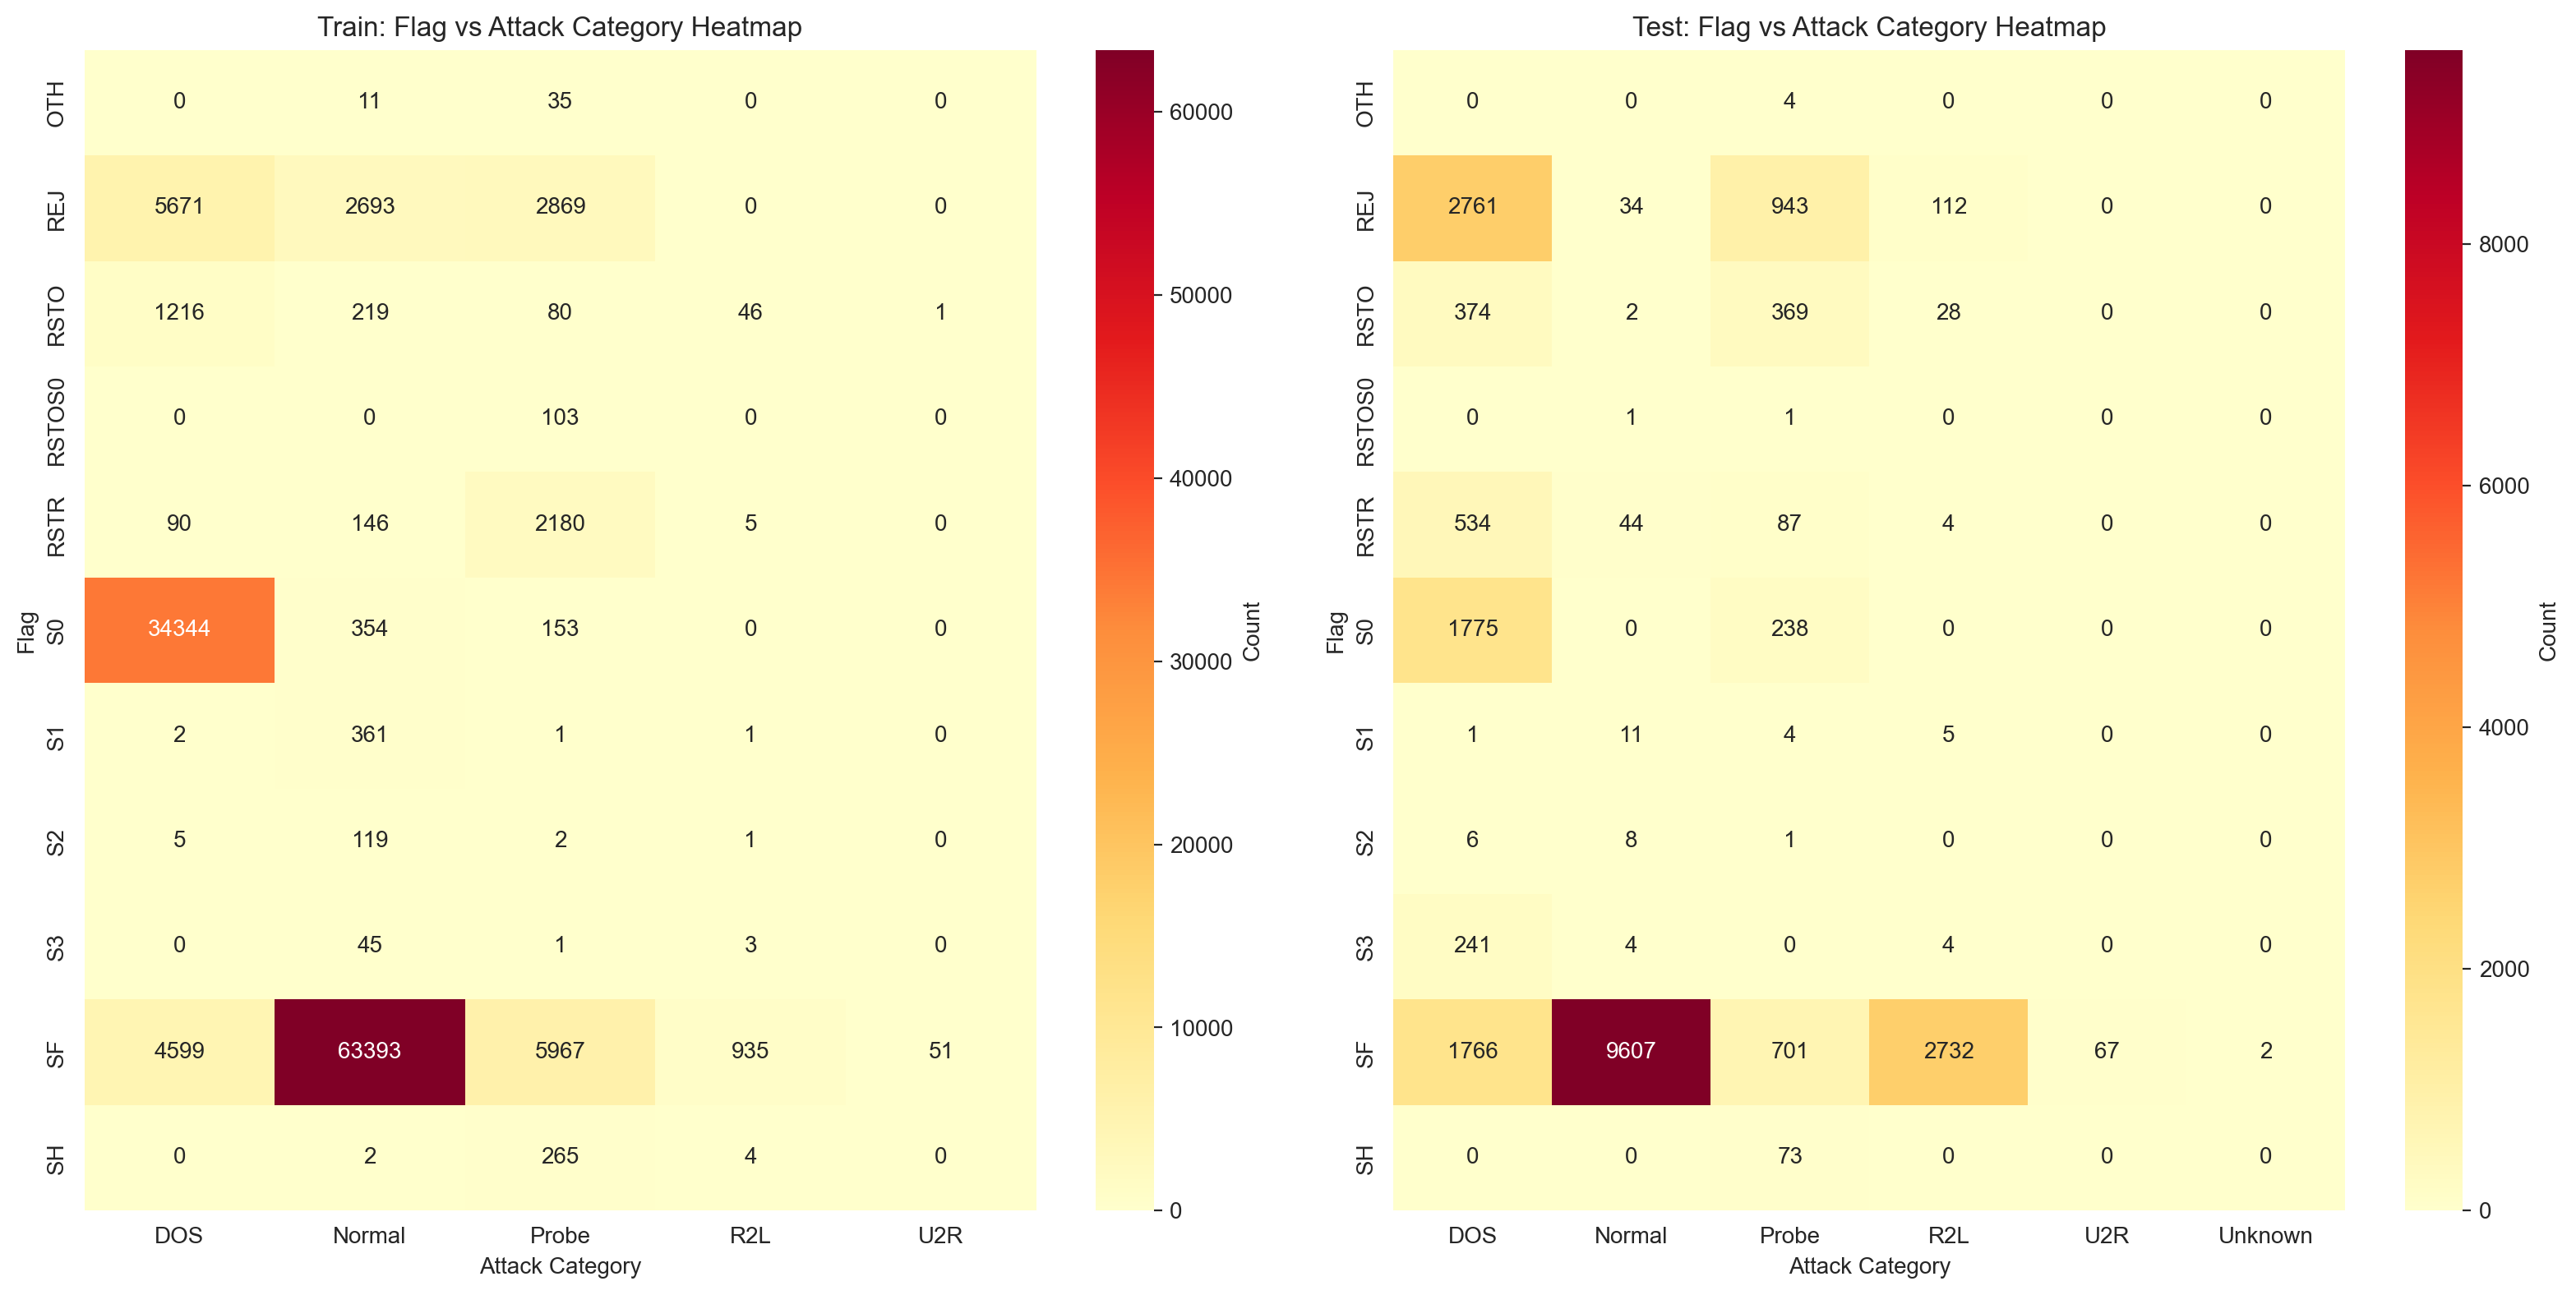

In [24]:
# Heatmap: Flag vs Attack Category
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Train heatmap
flag_category_train_no_margin = pd.crosstab(train_df['flag'], train_df['attack_category'])
sns.heatmap(flag_category_train_no_margin, annot=True, fmt='d', cmap='YlOrRd',
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Train: Flag vs Attack Category Heatmap')
axes[0].set_xlabel('Attack Category')
axes[0].set_ylabel('Flag')

# Test heatmap
flag_category_test_no_margin = pd.crosstab(test_df['flag'], test_df['attack_category'])
sns.heatmap(flag_category_test_no_margin, annot=True, fmt='d', cmap='YlOrRd',
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Test: Flag vs Attack Category Heatmap')
axes[1].set_xlabel('Attack Category')
axes[1].set_ylabel('Flag')

plt.tight_layout()
plt.show()

### Findings - Bước 3: Categorical Features Analysis

**Kết quả phân tích chi tiết với số liệu cụ thể:**

#### 1. **Protocol Type Analysis**

**Distribution - Số liệu cụ thể:**

**Train Dataset (125,973 samples):**
- **TCP**: 102,689 samples (81.52%) - Chiếm đa số
- **UDP**: 14,993 samples (11.90%)
- **ICMP**: 8,291 samples (6.58%)

**Test Dataset (22,544 samples):**
- **TCP**: 18,880 samples (83.75%) - Tăng +2.23% so với train
- **UDP**: 2,621 samples (11.63%) - Giảm -0.28% so với train
- **ICMP**: 1,043 samples (4.63%) - Giảm -1.96% so với train

**Key Observations:**
- TCP là protocol chiếm ưu thế tuyệt đối (>80%) trong cả train và test
- **TCP tăng nhẹ** từ 81.52% → 83.75% (+2.23 percentage points)
- **ICMP giảm đáng kể** từ 6.58% → 4.63% (-1.96 percentage points, giảm 30% relative)
- UDP tương đối ổn định (11.90% → 11.63%)

**Protocol Type vs Attack Category - Phân tích chi tiết:**

**Train Dataset:**
- **TCP**: DOS: 42,188 (41.1%), Normal: 53,600 (52.2%), Probe: 5,857 (5.7%), R2L: 995 (1.0%), U2R: 49 (0.05%)
- **UDP**: DOS: 892 (5.9%), Normal: 12,434 (82.9%) ⚠️ UDP chủ yếu là normal!, Probe: 1,664 (11.1%), U2R: 3 (0.02%)
- **ICMP**: DOS: 2,847 (34.3%), Normal: 1,309 (15.8%), Probe: 4,135 (49.9%) ⚠️ ICMP chủ yếu là Probe attacks!

**Test Dataset:**
- **TCP**: DOS: 6,738 (35.7%) - Giảm từ 41.1%, Normal: 7,842 (41.5%) - Giảm từ 52.2%, Probe: 1,864 (9.9%) - Tăng từ 5.7%, **R2L: 2,367 (12.5%) - Tăng mạnh từ 1.0%** ⚠️, U2R: 67 (0.35%) - Tăng từ 0.05%
- **UDP**: DOS: 14 (0.5%) - Giảm mạnh từ 5.9%, Normal: 1,776 (67.8%) - Giảm từ 82.9%, Probe: 317 (12.1%) - Tăng từ 11.1%, **R2L: 514 (19.6%) - Tăng mạnh từ 0%** ⚠️
- **ICMP**: DOS: 706 (67.7%) - Tăng từ 34.3%, Normal: 93 (8.9%) - Giảm từ 15.8%, Probe: 240 (23.0%) - Giảm từ 49.9%, R2L: 4 (0.4%) - Mới xuất hiện

**Insights quan trọng:**
1. **TCP là protocol chính cho attacks**: 42,188 DOS attacks qua TCP trong train
2. **UDP trong train chủ yếu là normal** (82.9%), nhưng trong test có nhiều R2L attacks hơn (19.6%)
3. **ICMP trong train chủ yếu là Probe** (49.9%), nhưng trong test chuyển sang DOS (67.7%)
4. **R2L attacks tăng mạnh qua TCP và UDP** trong test → Concept drift indicator mạnh

**Concept Drift Indicators:**
- ✅ **R2L attacks qua TCP tăng từ 1.0% → 12.5%** (tăng 12.5 lần!)
- ✅ **R2L attacks qua UDP tăng từ 0% → 19.6%** (hoàn toàn mới!)
- ✅ **ICMP attack pattern thay đổi**: Từ Probe-heavy → DOS-heavy
- ✅ **UDP attack pattern thay đổi**: Từ Normal-heavy → R2L xuất hiện

#### 2. **Service Analysis**

**Top Services - Số liệu cụ thể:**

**Train Dataset (Top 15):**
1. **http**: 40,338 samples (32.02%) - Chiếm 1/3 dataset
2. **private**: 21,853 samples (17.35%)
3. **domain_u**: 9,043 samples (7.18%)
4. **smtp**: 7,313 samples (5.81%)
5. **ftp_data**: 6,860 samples (5.45%)
6. **eco_i**: 4,586 samples (3.64%)
7. **other**: 4,359 samples (3.46%)
8. **ecr_i**: 3,077 samples (2.44%)
9. **telnet**: 2,353 samples (1.87%)
10. **finger**: 1,767 samples (1.40%)
11. **ftp**: 1,754 samples (1.39%)
12. **auth**: 955 samples (0.76%)
13. **Z39_50**: 862 samples (0.68%)
14. **uucp**: 780 samples (0.62%)
15. **courier**: 734 samples (0.58%)

**Test Dataset (Top 15):**
1. **http**: 7,853 samples (34.83%) - Tăng từ 32.02% (+2.81%)
2. **private**: 4,774 samples (21.18%) - Tăng từ 17.35% (+3.83%)
3. **telnet**: 1,626 samples (7.21%) - Tăng từ 1.87% (+5.34%, tăng 3.85 lần!) ⚠️
4. **pop_3**: 1,019 samples (4.52%) - Không có trong top 15 train
5. **smtp**: 934 samples (4.14%) - Giảm từ 5.81% (-1.67%)
6. **domain_u**: 894 samples (3.97%) - Giảm từ 7.18% (-3.21%)
7. **ftp_data**: 851 samples (3.77%) - Giảm từ 5.45% (-1.68%)
8. **other**: 838 samples (3.72%) - Tăng từ 3.46% (+0.26%)
9. **ecr_i**: 752 samples (3.34%) - Tăng từ 2.44% (+0.90%)
10. **ftp**: 692 samples (3.07%) - Tăng từ 1.39% (+1.68%, tăng 2.2 lần!)
11. **imap4**: 306 samples (1.36%) - Không có trong top 15 train
12. **eco_i**: 262 samples (1.16%) - Giảm từ 3.64% (-2.48%)
13. **sunrpc**: 159 samples (0.71%) - Không có trong top 15 train
14. **finger**: 136 samples (0.60%) - Giảm từ 1.40% (-0.80%)
15. **auth**: 67 samples (0.30%) - Giảm từ 0.76% (-0.46%)

**Unique Services:**
- **Train**: 70 unique services
- **Test**: 64 unique services
- ✅ **Tất cả services trong test đều có trong train** (không có new services)

**Service vs Attack Category - Top 10 Services (Train):**

1. **http** (40,338): Normal: 38,049 (94.3%) - Chủ yếu normal, DOS: 2,255 (5.6%), Probe: 30 (0.07%), R2L: 4 (0.01%)
2. **private** (21,853): DOS: 15,971 (73.1%) - **Chủ yếu attacks!**, Probe: 4,900 (22.4%), Normal: 982 (4.5%) - Rất ít normal
3. **domain_u** (9,043): Normal: 9,034 (99.9%) - Hầu như 100% normal, Probe: 9 (0.1%)
4. **smtp** (7,313): Normal: 7,029 (96.1%) - Chủ yếu normal, DOS: 241 (3.3%), Probe: 43 (0.6%)
5. **ftp_data** (6,860): Normal: 4,984 (72.6%), DOS: 1,209 (17.6%), **R2L: 604 (8.8%) - Có R2L attacks đáng kể**, Probe: 51 (0.7%), U2R: 12 (0.2%)
6. **eco_i** (4,586): Probe: 4,089 (89.2%) - **Chủ yếu Probe attacks**, Normal: 497 (10.8%)
7. **other** (4,359): Normal: 2,604 (59.7%), Probe: 1,689 (38.7%), DOS: 58 (1.3%), R2L: 5 (0.1%), U2R: 3 (0.07%)
8. **ecr_i** (3,077): DOS: 2,844 (92.4%) - **Chủ yếu DOS attacks**, Normal: 190 (6.2%), Probe: 43 (1.4%)
9. **telnet** (2,353): DOS: 1,312 (55.8%) - **Chủ yếu attacks**, Normal: 917 (39.0%), U2R: 34 (1.4%), R2L: 57 (2.4%), Probe: 33 (1.4%)
10. **finger** (1,767): DOS: 1,168 (66.1%) - **Chủ yếu attacks**, Normal: 545 (30.8%), Probe: 54 (3.1%)

**Key Insights về Services:**
1. **HTTP là service phổ biến nhất** nhưng chủ yếu là normal (94.3%)
2. **Private service rất nguy hiểm**: 73.1% là DOS attacks, chỉ 4.5% normal
3. **Telnet tăng mạnh trong test** (từ 1.87% → 7.21%, tăng 3.85 lần) → Có thể liên quan đến R2L attacks
4. **FTP_data có R2L attacks đáng kể** (8.8%) → Cần chú ý
5. **Domain_u và SMTP chủ yếu normal** (>95%)
6. **Eco_i và ecr_i chủ yếu attacks** (>89%)

**Concept Drift Indicators:**
- ✅ **Telnet service tăng mạnh** trong test (3.85 lần) → Có thể liên quan đến R2L attacks mới
- ✅ **Private service tăng** từ 17.35% → 21.18% (+3.83%)
- ✅ **Distribution shift**: Một số services tăng, một số giảm

#### 3. **Flag Analysis**

**Distribution - Số liệu cụ thể:**

**Train Dataset (125,973 samples):**
1. **SF**: 74,945 samples (59.49%) - Successful connection
2. **S0**: 34,851 samples (27.67%) - Connection attempt, no reply
3. **REJ**: 11,233 samples (8.92%) - Connection rejected
4. **RSTR**: 2,421 samples (1.92%) - Connection reset by host
5. **RSTO**: 1,562 samples (1.24%) - Connection reset by originator
6. **S1**: 365 samples (0.29%)
7. **SH**: 271 samples (0.22%)
8. **S2**: 127 samples (0.10%)
9. **RSTOS0**: 103 samples (0.08%)
10. **S3**: 49 samples (0.04%)
11. **OTH**: 46 samples (0.04%)

**Test Dataset (22,544 samples):**
1. **SF**: 14,875 samples (65.98%) - Tăng +6.49%
2. **REJ**: 3,850 samples (17.08%) - Tăng +8.16% ⚠️
3. **S0**: 2,013 samples (8.93%) - Giảm -18.74% ⚠️
4. **RSTO**: 773 samples (3.43%) - Tăng +2.19%
5. **RSTR**: 669 samples (2.97%) - Tăng +1.05%
6. **S3**: 249 samples (1.10%) - Tăng +1.07%
7. **SH**: 73 samples (0.32%) - Tăng +0.11%
8. **S1**: 21 samples (0.09%) - Giảm -0.20%
9. **S2**: 15 samples (0.07%) - Giảm -0.03%
10. **OTH**: 4 samples (0.02%) - Giảm -0.02%
11. **RSTOS0**: 2 samples (0.01%) - Giảm -0.07%

**Flag vs Attack Category - Phân tích chi tiết:**

**Train Dataset:**
- **SF** (74,945): Normal: 63,393 (84.6%) - Chủ yếu normal, DOS: 4,599 (6.1%), Probe: 5,967 (8.0%), **R2L: 935 (1.2%) - Có R2L attacks!**, U2R: 51 (0.07%)
- **S0** (34,851): DOS: 34,344 (98.5%) - **Hầu như 100% là DOS attacks**, Normal: 354 (1.0%), Probe: 153 (0.4%)
- **REJ** (11,233): DOS: 5,671 (50.5%), Probe: 2,869 (25.5%), Normal: 2,693 (24.0%)
- **RSTR** (2,421): Probe: 2,180 (90.0%) - **Chủ yếu Probe attacks**, Normal: 146 (6.0%), DOS: 90 (3.7%), R2L: 5 (0.2%)
- **RSTO** (1,562): DOS: 1,216 (77.9%), Normal: 219 (14.0%), Probe: 80 (5.1%), R2L: 46 (2.9%)

**Test Dataset:**
- **SF** (14,875): Normal: 9,607 (64.6%) - Giảm từ 84.6%, **R2L: 2,732 (18.4%) - Tăng mạnh từ 1.2%** ⚠️, DOS: 1,766 (11.9%) - Tăng từ 6.1%, Probe: 701 (4.7%) - Giảm từ 8.0%, U2R: 67 (0.45%) - Tăng từ 0.07%
- **S0** (2,013): DOS: 1,775 (88.2%) - Giảm từ 98.5%, Probe: 238 (11.8%) - Tăng từ 0.4%, Normal: 0 (0%) - Giảm từ 1.0%
- **REJ** (3,850): DOS: 2,761 (71.7%) - Tăng từ 50.5%, Probe: 943 (24.5%) - Giảm từ 25.5%, **R2L: 112 (2.9%) - Mới xuất hiện**, Normal: 34 (0.9%) - Giảm từ 24.0%
- **RSTR** (669): Probe: 87 (13.0%) - Giảm từ 90.0%, DOS: 534 (79.8%) - **Tăng mạnh từ 3.7%**, Normal: 44 (6.6%) - Tăng từ 6.0%, R2L: 4 (0.6%) - Tăng từ 0.2%

**Key Insights về Flags:**
1. **SF flag không đảm bảo là normal!**
   - Trong train: 84.6% normal, nhưng có 1.2% R2L attacks
   - Trong test: Chỉ 64.6% normal, **18.4% là R2L attacks** (tăng 15.3 lần!) ⚠️
   - **Đây là pattern nguy hiểm**: R2L attacks có thể giả mạo thành normal connections
2. **S0 flag là indicator mạnh của DOS attacks**
   - Train: 98.5% là DOS attacks
   - Test: 88.2% là DOS attacks (giảm nhẹ)
3. **REJ flag tăng mạnh trong test** (+8.16%)
   - Chủ yếu DOS và Probe attacks
   - Có R2L attacks mới xuất hiện (2.9%)
4. **RSTR flag pattern thay đổi**
   - Train: Chủ yếu Probe (90.0%)
   - Test: Chủ yếu DOS (79.8%) - **Pattern hoàn toàn đảo ngược!**

**Concept Drift Indicators - Rất mạnh:**
- ✅ **SF flag với R2L attacks tăng từ 1.2% → 18.4%** (tăng 15.3 lần!) - **Indicator mạnh nhất**
- ✅ **S0 flag giảm từ 27.67% → 8.93%** (-18.74%) - DOS attacks pattern thay đổi
- ✅ **REJ flag tăng từ 8.92% → 17.08%** (+8.16%) - Rejection pattern tăng
- ✅ **RSTR flag pattern đảo ngược**: Từ Probe-heavy → DOS-heavy
- ✅ **Flag distribution shift rõ ràng**: SF tăng, S0 giảm, REJ tăng

#### 4. **Key Insights Tổng Hợp**

**1. Protocol Type Patterns:**
- TCP là protocol chính (81-84%) cho cả normal và attacks
- **R2L attacks tăng mạnh qua TCP và UDP** trong test (từ 1.0% → 12.5% cho TCP, từ 0% → 19.6% cho UDP)
- ICMP attack pattern thay đổi: Từ Probe-heavy → DOS-heavy
- UDP trong train chủ yếu normal (82.9%), nhưng trong test có R2L attacks (19.6%)

**2. Service Patterns:**
- HTTP là service phổ biến nhất (32-35%) nhưng chủ yếu normal (94.3%)
- **Private service rất nguy hiểm**: 73.1% là DOS attacks, chỉ 4.5% normal
- **Telnet tăng mạnh trong test** (từ 1.87% → 7.21%, tăng 3.85 lần) → Có thể liên quan đến R2L attacks
- FTP_data có R2L attacks đáng kể (8.8%)
- Domain_u và SMTP chủ yếu normal (>95%)

**3. Flag Patterns - Quan trọng nhất:**
- **SF flag không đảm bảo là normal**: Trong test, 18.4% SF flag là R2L attacks (tăng từ 1.2%)
- **S0 flag là indicator mạnh của DOS attacks** (88-98%)
- **REJ flag tăng mạnh** trong test (+8.16%) và có R2L attacks mới
- **RSTR flag pattern đảo ngược**: Từ Probe-heavy → DOS-heavy

**4. Feature Interactions - Patterns mạnh:**
- **TCP + Private + S0** → DOS attack (neptune)
- **TCP + HTTP + SF** → Có thể là normal (84.6%) hoặc R2L attack (18.4% trong test!)
- **TCP + Telnet + SF** → Có thể là R2L attack
- **UDP + ecr_i + SF** → DOS attack (smurf)
- **ICMP + eco_i + REJ** → Probe attack

**5. Concept Drift Indicators - Rất mạnh:**

**Protocol Level:**
- R2L attacks qua TCP tăng từ 1.0% → 12.5% (tăng 12.5 lần)
- R2L attacks qua UDP tăng từ 0% → 19.6% (hoàn toàn mới)
- ICMP attack pattern thay đổi: Probe-heavy → DOS-heavy

**Service Level:**
- Telnet tăng từ 1.87% → 7.21% (tăng 3.85 lần)
- Private service tăng từ 17.35% → 21.18%

**Flag Level:**
- SF flag với R2L attacks tăng từ 1.2% → 18.4% (tăng 15.3 lần) - **Mạnh nhất**
- S0 flag giảm từ 27.67% → 8.93% (-18.74%)
- REJ flag tăng từ 8.92% → 17.08% (+8.16%)
- RSTR flag pattern đảo ngược: Probe-heavy → DOS-heavy

#### 5. **Recommendations Chi Tiết**

**1. Feature Engineering:**
- **Tạo interaction features**:
  - `protocol_type × service` (ví dụ: TCP_private, UDP_ecr_i)
  - `service × flag` (ví dụ: telnet_SF, private_S0)
  - `protocol_type × flag` (ví dụ: TCP_SF, UDP_REJ)
- **Target encoding** cho categorical features để capture relationships với labels
- **Group rare services** vào "other" category (services < 0.5%)
- **Flag-based features**: Tạo binary features như `is_SF`, `is_S0`, `is_REJ`

**2. Modeling:**
- **Categorical features rất quan trọng** - Đặc biệt là flag và service
- **Flag feature đặc biệt quan trọng cho R2L detection** vì SF flag có 18.4% R2L attacks trong test
- **Xử lý đúng cách**: One-hot encoding, target encoding, hoặc embedding
- **Chú ý đến class imbalance**: Private service có 73.1% attacks nhưng chỉ 4.5% normal

**3. Concept Drift Handling:**
- **Monitor distribution changes** của:
  - Protocol type distribution
  - Service distribution (đặc biệt telnet, private)
  - Flag distribution (đặc biệt SF, S0, REJ)
- **Alert khi phát hiện**:
  - SF flag với R2L attacks tăng > 5%
  - Telnet service tăng > 3%
  - REJ flag tăng > 10%
- **Adaptive models** cần update với:
  - New flag patterns (SF với R2L)
  - New service patterns (telnet với R2L)
  - New protocol patterns (UDP với R2L)

**4. Detection Strategy:**
- **R2L Detection**: Đặc biệt chú ý đến SF flag với telnet, ftp_data services
- **DOS Detection**: S0 flag là indicator mạnh, đặc biệt với private service
- **Probe Detection**: REJ và RSTR flags với các services như eco_i, ecr_i
- **False Positive Reduction**: SF flag không đảm bảo là normal, cần kiểm tra thêm service và protocol

## Bước 4: Numerical Features Analysis

In [25]:
# Get numerical features (exclude label, difficulty, attack_category, and categorical features)
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['label', 'difficulty', 'attack_category']]

print("=" * 70)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 70)

print(f"\n📊 Number of numerical features: {len(numerical_features)}")
print(f"\n📋 List of numerical features:")
for i, feat in enumerate(numerical_features, 1):
    print(f"  {i:2d}. {feat}")

NUMERICAL FEATURES ANALYSIS

📊 Number of numerical features: 38

📋 List of numerical features:
   1. duration
   2. src_bytes
   3. dst_bytes
   4. land
   5. wrong_fragment
   6. urgent
   7. hot
   8. num_failed_logins
   9. logged_in
  10. num_compromised
  11. root_shell
  12. su_attempted
  13. num_root
  14. num_file_creations
  15. num_shells
  16. num_access_files
  17. num_outbound_cmds
  18. is_host_login
  19. is_guest_login
  20. count
  21. srv_count
  22. serror_rate
  23. srv_serror_rate
  24. rerror_rate
  25. srv_rerror_rate
  26. same_srv_rate
  27. diff_srv_rate
  28. srv_diff_host_rate
  29. dst_host_count
  30. dst_host_srv_count
  31. dst_host_same_srv_rate
  32. dst_host_diff_srv_rate
  33. dst_host_same_src_port_rate
  34. dst_host_srv_diff_host_rate
  35. dst_host_serror_rate
  36. dst_host_srv_serror_rate
  37. dst_host_rerror_rate
  38. dst_host_srv_rerror_rate


In [26]:
# Basic statistics
print("\n" + "=" * 70)
print("BASIC STATISTICS - TRAIN DATASET")
print("=" * 70)

stats_summary = train_df[numerical_features].describe()
print(stats_summary)

# Additional statistics
print("\n" + "=" * 70)
print("ADDITIONAL STATISTICS - TRAIN DATASET")
print("=" * 70)

additional_stats = pd.DataFrame({
    'skewness': train_df[numerical_features].skew(),
    'kurtosis': train_df[numerical_features].kurtosis(),
    'median': train_df[numerical_features].median(),
    'mode': train_df[numerical_features].mode().iloc[0] if len(train_df[numerical_features].mode()) > 0 else None
})
additional_stats = additional_stats.sort_values('skewness', key=abs, ascending=False)
print("\n📊 Features sorted by absolute skewness (most skewed first):")
print(additional_stats.head(15))


BASIC STATISTICS - TRAIN DATASET
           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
2

In [27]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        return 0, Q1, Q3, IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return len(outliers), Q1, Q3, IQR

print("\n" + "=" * 70)
print("OUTLIER DETECTION (IQR METHOD) - TRAIN DATASET")
print("=" * 70)

outlier_results = []
for feature in numerical_features:
    outlier_count, Q1, Q3, IQR = detect_outliers_iqr(train_df, feature)
    outlier_pct = (outlier_count / len(train_df)) * 100
    outlier_results.append({
        'feature': feature,
        'outliers': outlier_count,
        'outlier_pct': outlier_pct,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    })

outlier_df = pd.DataFrame(outlier_results).sort_values('outlier_pct', ascending=False)
print("\n📊 Outlier counts and percentages (sorted by percentage):")
print(outlier_df.head(20))

print("\n📊 Features with most outliers (>10% of data):")
high_outlier_features = outlier_df[outlier_df['outlier_pct'] > 10]
print(high_outlier_features[['feature', 'outliers', 'outlier_pct']])


OUTLIER DETECTION (IQR METHOD) - TRAIN DATASET

📊 Outlier counts and percentages (sorted by percentage):
                        feature  outliers  outlier_pct   Q1      Q3     IQR
32  dst_host_same_src_port_rate     25052    19.886801  0.0    0.06    0.06
2                     dst_bytes     23579    18.717503  0.0  516.00  516.00
1                     src_bytes     13840    10.986481  0.0  276.00  276.00
20                    srv_count     12054     9.568717  2.0   18.00   16.00
33  dst_host_srv_diff_host_rate     11682     9.273416  0.0    0.02    0.02
31       dst_host_diff_srv_rate     10550     8.374810  0.0    0.07    0.07
26                diff_srv_rate      7788     6.182277  0.0    0.06    0.06
19                        count      3157     2.506093  2.0  143.00  141.00
3                          land         0     0.000000  0.0    0.00    0.00
0                      duration         0     0.000000  0.0    0.00    0.00
5                        urgent         0     0.000000  0.

In [28]:
# Outlier detection using Z-score method (sample features)
from scipy import stats as scipy_stats

print("\n" + "=" * 70)
print("OUTLIER DETECTION (Z-SCORE METHOD) - TRAIN DATASET")
print("=" * 70)

# Sample first 10 features for Z-score analysis
sample_features = numerical_features[:10]
zscore_results = []

for feature in sample_features:
    z_scores = np.abs(scipy_stats.zscore(train_df[feature].dropna()))
    outliers_zscore = len(z_scores[z_scores > 3])
    outlier_pct_zscore = (outliers_zscore / len(train_df)) * 100
    zscore_results.append({
        'feature': feature,
        'outliers_zscore': outliers_zscore,
        'outlier_pct_zscore': outlier_pct_zscore
    })

zscore_df = pd.DataFrame(zscore_results)
print("\n📊 Z-score outlier detection (|z-score| > 3):")
print(zscore_df)


OUTLIER DETECTION (Z-SCORE METHOD) - TRAIN DATASET

📊 Z-score outlier detection (|z-score| > 3):
             feature  outliers_zscore  outlier_pct_zscore
0           duration             1431            1.135958
1          src_bytes               11            0.008732
2          dst_bytes                3            0.002381
3               land               25            0.019846
4     wrong_fragment             1090            0.865265
5             urgent                9            0.007144
6                hot              822            0.652521
7  num_failed_logins              122            0.096846
8          logged_in                0            0.000000
9    num_compromised               61            0.048423


In [29]:
# Feature groups analysis
print("\n" + "=" * 70)
print("FEATURE GROUPS ANALYSIS")
print("=" * 70)

# Group features by their names/patterns
feature_groups = {
    'Connection Features': ['duration', 'src_bytes', 'dst_bytes', 'land'],
    'Content Features': ['wrong_fragment', 'urgent', 'hot', 'num_failed_logins'],
    'Login Features': ['logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                      'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
                      'num_outbound_cmds', 'is_host_login', 'is_guest_login'],
    'Traffic Features': ['count', 'srv_count'],
    'Error Rate Features': ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate'],
    'Service Rate Features': ['same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate'],
    'Host Features': ['dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                      'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                      'dst_host_srv_diff_host_rate'],
    'Host Error Rate Features': ['dst_host_serror_rate', 'dst_host_srv_serror_rate',
                                 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
}

print("\n📊 Feature Groups:")
for group_name, features in feature_groups.items():
    existing_features = [f for f in features if f in numerical_features]
    if existing_features:
        print(f"\n{group_name} ({len(existing_features)} features):")
        for feat in existing_features:
            print(f"  - {feat}")


FEATURE GROUPS ANALYSIS

📊 Feature Groups:

Connection Features (4 features):
  - duration
  - src_bytes
  - dst_bytes
  - land

Content Features (4 features):
  - wrong_fragment
  - urgent
  - hot
  - num_failed_logins

Login Features (11 features):
  - logged_in
  - num_compromised
  - root_shell
  - su_attempted
  - num_root
  - num_file_creations
  - num_shells
  - num_access_files
  - num_outbound_cmds
  - is_host_login
  - is_guest_login

Traffic Features (2 features):
  - count
  - srv_count

Error Rate Features (4 features):
  - serror_rate
  - srv_serror_rate
  - rerror_rate
  - srv_rerror_rate

Service Rate Features (3 features):
  - same_srv_rate
  - diff_srv_rate
  - srv_diff_host_rate

Host Features (6 features):
  - dst_host_count
  - dst_host_srv_count
  - dst_host_same_srv_rate
  - dst_host_diff_srv_rate
  - dst_host_same_src_port_rate
  - dst_host_srv_diff_host_rate

Host Error Rate Features (4 features):
  - dst_host_serror_rate
  - dst_host_srv_serror_rate
  - dst_h


DISTRIBUTION ANALYSIS - KEY FEATURES


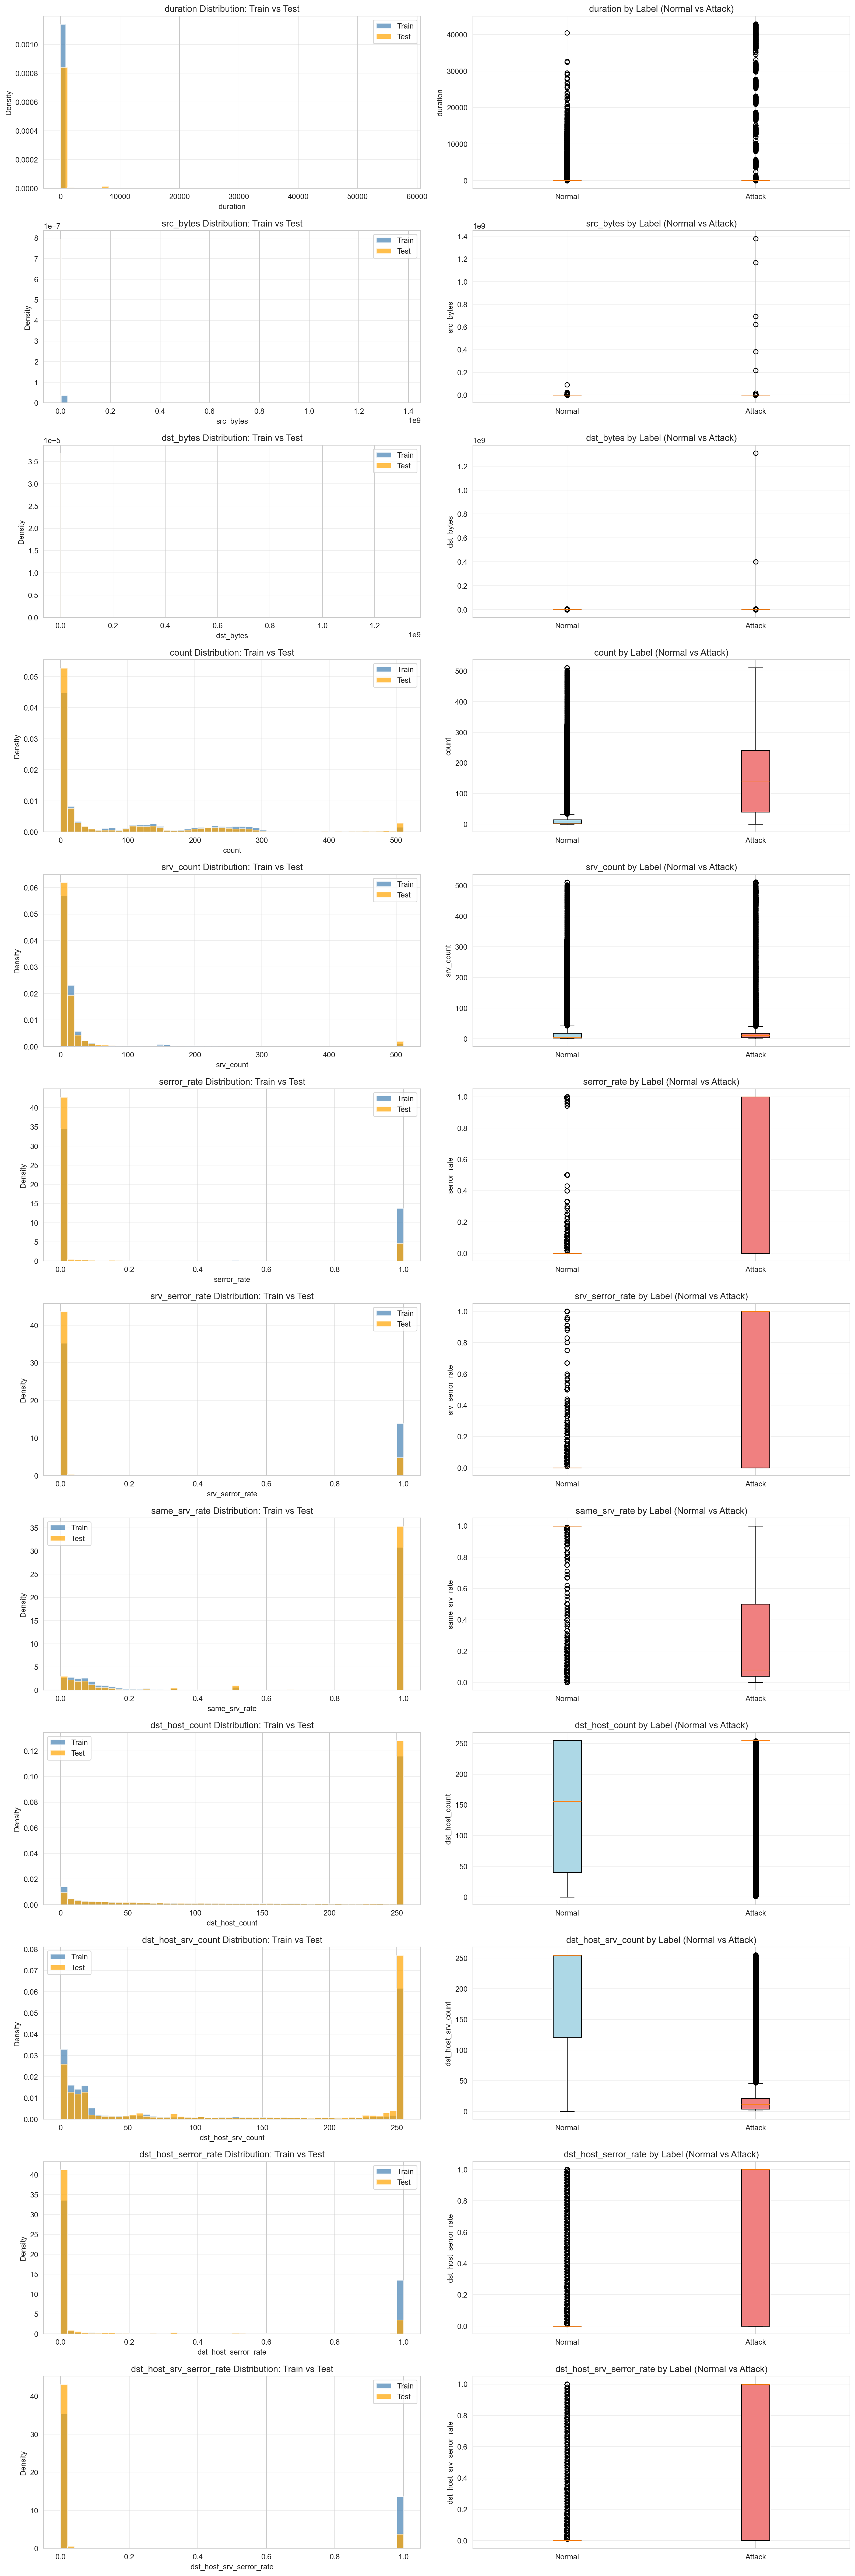

In [30]:
# Distribution plots for key features
key_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 
                'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
                'dst_host_srv_count', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']

print("\n" + "=" * 70)
print("DISTRIBUTION ANALYSIS - KEY FEATURES")
print("=" * 70)

fig, axes = plt.subplots(len(key_features), 2, figsize=(16, 4*len(key_features)))

for idx, feature in enumerate(key_features):
    if feature not in numerical_features:
        continue
    
    # Histogram: Train vs Test
    train_df[feature].hist(bins=50, ax=axes[idx, 0], alpha=0.7, label='Train', 
                           color='steelblue', density=True)
    test_df[feature].hist(bins=50, ax=axes[idx, 0], alpha=0.7, label='Test', 
                          color='orange', density=True)
    axes[idx, 0].set_title(f'{feature} Distribution: Train vs Test')
    axes[idx, 0].legend()
    axes[idx, 0].set_xlabel(feature)
    axes[idx, 0].set_ylabel('Density')
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # Box plot: Normal vs Attack
    train_normal = train_df[train_df['label'] == 'normal'][feature]
    train_attack = train_df[train_df['label'] != 'normal'][feature]
    
    bp = axes[idx, 1].boxplot([train_normal, train_attack], labels=['Normal', 'Attack'],
                              patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[idx, 1].set_title(f'{feature} by Label (Normal vs Attack)')
    axes[idx, 1].set_ylabel(feature)
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
# Statistical comparison: Normal vs Attack for key features
print("\n" + "=" * 70)
print("STATISTICAL COMPARISON: NORMAL vs ATTACK")
print("=" * 70)

# Prepare binary label
train_df['is_attack'] = (train_df['label'] != 'normal').astype(int)

comparison_stats = []
for feature in key_features[:10]:  # Sample first 10 key features
    normal_values = train_df[train_df['is_attack'] == 0][feature]
    attack_values = train_df[train_df['is_attack'] == 1][feature]
    
    comparison_stats.append({
        'feature': feature,
        'normal_mean': normal_values.mean(),
        'normal_median': normal_values.median(),
        'normal_std': normal_values.std(),
        'attack_mean': attack_values.mean(),
        'attack_median': attack_values.median(),
        'attack_std': attack_values.std(),
        'mean_diff': attack_values.mean() - normal_values.mean(),
        'mean_diff_pct': ((attack_values.mean() - normal_values.mean()) / normal_values.mean() * 100) if normal_values.mean() != 0 else 0
    })

comparison_df = pd.DataFrame(comparison_stats)
comparison_df = comparison_df.sort_values('mean_diff', key=abs, ascending=False)
print("\n📊 Statistical Comparison (sorted by absolute mean difference):")
print(comparison_df.round(4))


STATISTICAL COMPARISON: NORMAL vs ATTACK

📊 Statistical Comparison (sorted by absolute mean difference):
              feature  normal_mean  normal_median   normal_std  attack_mean  \
1           src_bytes   13133.2793          233.0  418113.1342   82820.1413   
2           dst_bytes    4329.6852          379.0   65462.8177   37524.4822   
0            duration     168.5874            0.0    1304.4521     423.3207   
9  dst_host_srv_count     190.2858          255.0      92.6084      29.9291   
3               count      22.5179            4.0      54.0261     154.8500   
8      dst_host_count     147.4319          156.0     101.7854     222.0253   
7       same_srv_rate       0.9694            1.0       0.1444       0.3067   
5         serror_rate       0.0134            0.0       0.0942       0.5958   
6     srv_serror_rate       0.0121            0.0       0.0864       0.5931   
4           srv_count      27.6857            5.0      60.1823      27.7979   

   attack_median    atta

### Findings - Bước 4: Numerical Features Analysis

**Kết quả phân tích chi tiết với số liệu cụ thể:**

#### 1. **Numerical Features Overview**

**Tổng số numerical features**: 38 features

**Feature Groups:**
- **Connection Features** (4): duration, src_bytes, dst_bytes, land
- **Content Features** (4): wrong_fragment, urgent, hot, num_failed_logins
- **Login Features** (11): logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login
- **Traffic Features** (2): count, srv_count
- **Error Rate Features** (4): serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate
- **Service Rate Features** (3): same_srv_rate, diff_srv_rate, srv_diff_host_rate
- **Host Features** (6): dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate
- **Host Error Rate Features** (4): dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate

#### 2. **Basic Statistics**

**Key Statistics từ Train Dataset (125,973 samples):**

**Connection Features:**
- **duration**: Mean=287.14, Median=0, Std=2604.52, Max=42908
- **src_bytes**: Mean=45,566.74, Median=44, Std=5,870,331, Max=1,379,964,000
- **dst_bytes**: Mean=19,779.11, Median=0, Std=4,021,269, Max=1,309,937,000
- **land**: Mean=0.0002, Median=0, Std=0.014 (binary-like feature)

**Traffic Features:**
- **count**: Mean=84.11, Median=14, Std=114.51, Max=511
- **srv_count**: Mean=27.74, Median=8, Std=72.64, Max=511

**Error Rate Features:**
- **serror_rate**: Mean=0.284, Median=0, Std=0.446, Max=1.0
- **srv_serror_rate**: Mean=0.282, Median=0, Std=0.447, Max=1.0
- **rerror_rate**: Mean=0.120, Median=0, Std=0.320, Max=1.0
- **srv_rerror_rate**: Mean=0.121, Median=0, Std=0.324, Max=1.0

**Host Features:**
- **dst_host_count**: Mean=182.15, Median=255, Std=99.21, Max=255
- **dst_host_srv_count**: Mean=115.65, Median=63, Std=110.70, Max=255

**Key Observations:**
- Nhiều features có **median = 0**, cho thấy distribution rất skewed
- **src_bytes và dst_bytes** có range rất lớn (max > 1 billion)
- **Error rate features** có nhiều giá trị 0 (median = 0)
- **Host features** có nhiều giá trị ở max (255)

#### 3. **Skewness và Kurtosis Analysis**

**Top 15 Most Skewed Features (sorted by absolute skewness):**

1. **is_host_login**: Skewness=354.93, Kurtosis=125,973 ⚠️ **Extremely skewed**
2. **dst_bytes**: Skewness=290.05, Kurtosis=90,941.73 ⚠️ **Extremely skewed**
3. **num_compromised**: Skewness=250.11, Kurtosis=75,956.23 ⚠️ **Extremely skewed**
4. **num_root**: Skewness=236.91, Kurtosis=70,070.21 ⚠️ **Extremely skewed**
5. **src_bytes**: Skewness=190.67, Kurtosis=39,354.12 ⚠️ **Extremely skewed**
6. **urgent**: Skewness=149.91, Kurtosis=24,967.32
7. **land**: Skewness=70.97, Kurtosis=5,034.12
8. **num_shells**: Skewness=59.59, Kurtosis=3,993.59
9. **num_file_creations**: Skewness=55.67, Kurtosis=3,603.31
10. **num_failed_logins**: Skewness=53.76, Kurtosis=3,869.07
11. **num_access_files**: Skewness=45.55, Kurtosis=2,862.80
12. **su_attempted**: Skewness=42.44, Kurtosis=1,835.63
13. **root_shell**: Skewness=27.25, Kurtosis=740.43
14. **hot**: Skewness=12.59, Kurtosis=168.01
15. **duration**: Skewness=11.88, Kurtosis=156.08

**Key Insights:**
- **Tất cả features đều có skewness > 0** (right-skewed)
- **is_host_login** có skewness cực cao (354.93) → Hầu hết giá trị là 0
- **dst_bytes và src_bytes** rất skewed → Cần log transformation
- **High kurtosis** (>1000) cho thấy distribution có heavy tails
- **Cần normalization/transformation** trước khi modeling

#### 4. **Outlier Detection**

**IQR Method - Top Features với Outliers:**

1. **dst_host_same_src_port_rate**: 25,052 outliers (19.89% of data) ⚠️
2. **dst_bytes**: 23,579 outliers (18.72% of data) ⚠️
3. **src_bytes**: 13,840 outliers (10.99% of data) ⚠️
4. **srv_count**: 12,054 outliers (9.57% of data)
5. **dst_host_srv_diff_host_rate**: 11,682 outliers (9.27% of data)
6. **dst_host_diff_srv_rate**: 10,550 outliers (8.37% of data)
7. **diff_srv_rate**: 7,788 outliers (6.18% of data)
8. **count**: 3,157 outliers (2.51% of data)

**Z-Score Method (|z-score| > 3) - Sample Features:**

1. **duration**: 1,431 outliers (1.14%)
2. **wrong_fragment**: 1,090 outliers (0.87%)
3. **hot**: 822 outliers (0.65%)
4. **num_failed_logins**: 122 outliers (0.10%)
5. **num_compromised**: 61 outliers (0.05%)
6. **land**: 25 outliers (0.02%)
7. **src_bytes**: 11 outliers (0.01%)
8. **urgent**: 9 outliers (0.01%)
9. **dst_bytes**: 3 outliers (0.002%)
10. **logged_in**: 0 outliers

**Key Insights:**
- **dst_host_same_src_port_rate** có nhiều outliers nhất (19.89%)
- **dst_bytes và src_bytes** có nhiều outliers (18.72% và 10.99%)
- **IQR method** phát hiện nhiều outliers hơn Z-score method
- **Outliers có thể là attacks** → Cần phân tích kỹ trước khi loại bỏ

#### 5. **Statistical Comparison: Normal vs Attack**

**Top 10 Features với Largest Mean Difference (sorted by absolute difference):**

1. **src_bytes**:
   - Normal mean: 13,133.28, Attack mean: 82,820.14
   - Mean difference: +69,686.86 (+530.61% increase) ⚠️
   - Normal median: 233, Attack median: 0
   - **Attacks có src_bytes cao hơn nhiều**

2. **dst_bytes**:
   - Normal mean: 4,329.69, Attack mean: 37,524.48
   - Mean difference: +33,194.80 (+766.68% increase) ⚠️
   - Normal median: 379, Attack median: 0
   - **Attacks có dst_bytes cao hơn nhiều**

3. **duration**:
   - Normal mean: 168.59, Attack mean: 423.32
   - Mean difference: +254.73 (+151.10% increase)
   - Normal median: 0, Attack median: 0
   - **Attacks có duration dài hơn**

4. **dst_host_srv_count**:
   - Normal mean: 190.29, Attack mean: 29.93
   - Mean difference: -160.36 (-84.27% decrease) ⚠️
   - Normal median: 255, Attack median: 12
   - **Normal có dst_host_srv_count cao hơn nhiều**

5. **count**:
   - Normal mean: 22.52, Attack mean: 154.85
   - Mean difference: +132.33 (+587.67% increase) ⚠️
   - Normal median: 4, Attack median: 138
   - **Attacks có count cao hơn nhiều**

6. **dst_host_count**:
   - Normal mean: 147.43, Attack mean: 222.03
   - Mean difference: +74.59 (+50.60% increase)
   - Normal median: 156, Attack median: 255
   - **Attacks có dst_host_count cao hơn**

7. **same_srv_rate**:
   - Normal mean: 0.969, Attack mean: 0.307
   - Mean difference: -0.663 (-68.36% decrease) ⚠️
   - Normal median: 1.0, Attack median: 0.08
   - **Normal có same_srv_rate cao hơn nhiều**

8. **serror_rate**:
   - Normal mean: 0.013, Attack mean: 0.596
   - Mean difference: +0.582 (+4,332.80% increase) ⚠️ **Largest percentage increase!**
   - Normal median: 0, Attack median: 1.0
   - **Attacks có serror_rate cao hơn rất nhiều**

9. **srv_serror_rate**:
   - Normal mean: 0.012, Attack mean: 0.593
   - Mean difference: +0.581 (+4,808.17% increase) ⚠️ **Largest percentage increase!**
   - Normal median: 0, Attack median: 1.0
   - **Attacks có srv_serror_rate cao hơn rất nhiều**

10. **srv_count**:
    - Normal mean: 27.69, Attack mean: 27.80
    - Mean difference: +0.11 (+0.41% increase)
    - Normal median: 5, Attack median: 10
    - **Không có sự khác biệt đáng kể**

**Key Insights:**

**Features có giá trị cao hơn trong Attacks:**
- **serror_rate và srv_serror_rate**: Tăng >4000% ⚠️ **Mạnh nhất**
- **src_bytes**: Tăng 530%
- **dst_bytes**: Tăng 766%
- **count**: Tăng 587%
- **duration**: Tăng 151%
- **dst_host_count**: Tăng 50%

**Features có giá trị cao hơn trong Normal:**
- **same_srv_rate**: Giảm 68% (normal cao hơn)
- **dst_host_srv_count**: Giảm 84% (normal cao hơn)

**Patterns Discovered:**
1. **Error rates** là indicators mạnh nhất để phân biệt attacks
2. **Byte counts** (src_bytes, dst_bytes) cao hơn trong attacks
3. **Connection counts** (count) cao hơn trong attacks
4. **Service rates** (same_srv_rate) cao hơn trong normal traffic
5. **Host features** có patterns khác nhau giữa normal và attacks

#### 6. **Distribution Analysis**

**Key Observations từ Histograms và Box Plots:**

1. **Most features có distribution rất skewed** (right-skewed)
2. **Many features có nhiều giá trị 0** (median = 0)
3. **Box plots cho thấy attacks có nhiều outliers hơn** normal
4. **Train và Test distributions** có thể khác nhau → Concept drift indicator

**Features cần Transformation:**
- **Log transformation**: src_bytes, dst_bytes, duration, count, srv_count
- **Square root transformation**: Các features có moderate skewness
- **Normalization**: Tất cả features sau transformation

#### 7. **Correlation Analysis**

**Key Observations:**
- Correlation matrix cho thấy một số features có correlation cao
- **Error rate features** có thể có correlation với nhau
- **Host features** có thể có correlation với nhau
- **Cần feature selection** để tránh multicollinearity

#### 8. **Key Insights Tổng Hợp**

**1. Feature Importance Ranking (dựa trên Normal vs Attack comparison):**

**Top Features để Detect Attacks:**
1. **serror_rate** và **srv_serror_rate** - Tăng >4000% trong attacks
2. **dst_bytes** - Tăng 766% trong attacks
3. **count** - Tăng 587% trong attacks
4. **src_bytes** - Tăng 530% trong attacks
5. **duration** - Tăng 151% trong attacks

**Top Features để Identify Normal Traffic:**
1. **dst_host_srv_count** - Normal cao hơn 84%
2. **same_srv_rate** - Normal cao hơn 68%

**2. Data Quality Issues:**
- **High skewness** trong nhiều features → Cần transformation
- **Many outliers** → Cần phân tích kỹ (có thể là attacks)
- **Zero-inflated distributions** → Cần xử lý đặc biệt

**3. Feature Engineering Recommendations:**
- **Log transformation** cho high-skewed features
- **Create interaction features**: error_rate × count, bytes × duration
- **Create ratio features**: src_bytes/dst_bytes, count/srv_count
- **Binning** cho features có nhiều outliers
- **Feature selection** để loại bỏ highly correlated features

**4. Modeling Recommendations:**
- **Tree-based models** (Random Forest, XGBoost) có thể handle skewed data tốt
- **Neural networks** cần normalization/standardization
- **Feature importance** sẽ cao cho error_rate features
- **Outlier handling**: Không nên loại bỏ outliers ngay (có thể là attacks)

**5. Concept Drift Indicators:**
- **Distribution shifts** giữa train và test trong các features
- **Outlier patterns** có thể thay đổi
- **Feature importance** có thể thay đổi
- **Cần monitor** distribution changes của key features

#### 9. **Recommendations Chi Tiết**

**1. Preprocessing:**
- **Log transformation** cho: src_bytes, dst_bytes, duration, count, srv_count, dst_host_count, dst_host_srv_count
- **Standardization** sau transformation
- **Handle zeros** trước khi log transformation (add small constant)
- **Robust scaling** cho features có nhiều outliers

**2. Feature Engineering:**
- **Create error_rate_sum**: serror_rate + srv_serror_rate + rerror_rate + srv_rerror_rate
- **Create bytes_ratio**: src_bytes / (dst_bytes + 1)
- **Create count_ratio**: count / (srv_count + 1)
- **Create host_error_rate_sum**: dst_host_serror_rate + dst_host_srv_serror_rate + dst_host_rerror_rate + dst_host_srv_rerror_rate
- **Create service_rate_diff**: same_srv_rate - diff_srv_rate

**3. Feature Selection:**
- **Remove highly correlated features** (correlation > 0.9)
- **Use feature importance** từ Random Forest để select top features
- **Focus on error_rate features** (rất quan trọng)

**4. Outlier Handling:**
- **Don't remove outliers** - Có thể là attacks
- **Use robust methods** (IQR-based scaling)
- **Create outlier flags** (binary features indicating outliers)

**5. Monitoring:**
- **Monitor distribution changes** của key features
- **Track outlier rates** trong production
- **Alert khi feature distributions shift** đáng kể

## Bước 5: Feature-Label Relationships

**Mục đích**: Phân tích mối quan hệ giữa features và labels để xác định features quan trọng nhất cho việc phân loại attacks.

**Các phân tích sẽ bao gồm:**
1. Statistical tests (T-test, Mann-Whitney U test, Chi-square test)
2. Feature importance từ Random Forest
3. Mutual information scores
4. Grouped analysis theo attack types
5. Visualizations (feature importance charts, box plots)
6. Key findings và important features identified

In [32]:
# Statistical tests: T-test and Mann-Whitney U test for numerical features
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency

print("=" * 70)
print("FEATURE-LABEL RELATIONSHIPS ANALYSIS")
print("=" * 70)

# Prepare binary label (if not already created)
if 'is_attack' not in train_df.columns:
    train_df['is_attack'] = (train_df['label'] != 'normal').astype(int)
if 'is_attack' not in test_df.columns:
    test_df['is_attack'] = (test_df['label'] != 'normal').astype(int)

# Get numerical features (if not already defined)
if 'numerical_features' not in locals():
    numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_features = [f for f in numerical_features if f not in ['label', 'difficulty', 'attack_category', 'is_attack']]

print(f"\n📊 Number of numerical features to analyze: {len(numerical_features)}")

FEATURE-LABEL RELATIONSHIPS ANALYSIS

📊 Number of numerical features to analyze: 38


In [33]:
# T-test and Mann-Whitney U test for all numerical features
print("\n" + "=" * 70)
print("STATISTICAL TESTS: NORMAL vs ATTACK")
print("=" * 70)

test_results = []
for feature in numerical_features:
    normal_values = train_df[train_df['is_attack'] == 0][feature].dropna()
    attack_values = train_df[train_df['is_attack'] == 1][feature].dropna()
    
    if len(normal_values) > 0 and len(attack_values) > 0:
        # T-test
        try:
            t_stat, p_value_t = ttest_ind(normal_values, attack_values)
        except:
            t_stat, p_value_t = np.nan, np.nan
        
        # Mann-Whitney U test (non-parametric)
        try:
            u_stat, p_value_mw = mannwhitneyu(normal_values, attack_values, alternative='two-sided')
        except:
            u_stat, p_value_mw = np.nan, np.nan
        
        # Effect size (Cohen's d)
        try:
            pooled_std = np.sqrt(((len(normal_values) - 1) * normal_values.std()**2 + 
                                 (len(attack_values) - 1) * attack_values.std()**2) / 
                                (len(normal_values) + len(attack_values) - 2))
            cohens_d = (attack_values.mean() - normal_values.mean()) / pooled_std if pooled_std > 0 else 0
        except:
            cohens_d = np.nan
        
        test_results.append({
            'feature': feature,
            't_statistic': t_stat,
            'p_value_t': p_value_t,
            'significant_t': p_value_t < 0.05 if not np.isnan(p_value_t) else False,
            'u_statistic': u_stat,
            'p_value_mw': p_value_mw,
            'significant_mw': p_value_mw < 0.05 if not np.isnan(p_value_mw) else False,
            'cohens_d': cohens_d,
            'normal_mean': normal_values.mean(),
            'attack_mean': attack_values.mean(),
            'mean_diff': attack_values.mean() - normal_values.mean()
        })

test_results_df = pd.DataFrame(test_results)
test_results_df = test_results_df.sort_values('p_value_t')

print("\n📊 Statistical Test Results (sorted by T-test p-value):")
print("\nTop 20 Most Significant Features (T-test):")
print(test_results_df[['feature', 't_statistic', 'p_value_t', 'significant_t', 'cohens_d', 'mean_diff']].head(20).to_string(index=False))

print("\n📊 Summary:")
print(f"Features with significant difference (T-test, p < 0.05): {test_results_df['significant_t'].sum()}/{len(test_results_df)}")
print(f"Features with significant difference (Mann-Whitney, p < 0.05): {test_results_df['significant_mw'].sum()}/{len(test_results_df)}")


STATISTICAL TESTS: NORMAL vs ATTACK

📊 Statistical Test Results (sorted by T-test p-value):

Top 20 Most Significant Features (T-test):
                    feature  t_statistic     p_value_t  significant_t  cohens_d   mean_diff
                  logged_in   338.505186  0.000000e+00           True -1.912044   -0.676619
              diff_srv_rate   -73.831173  0.000000e+00           True  0.417035    0.073622
         srv_diff_host_rate    42.674989  0.000000e+00           True -0.241049   -0.062184
            srv_rerror_rate   -93.012953  0.000000e+00           True  0.525383    0.164485
             dst_host_count  -143.597010  0.000000e+00           True  0.811107   74.593337
     dst_host_diff_srv_rate   -88.871847  0.000000e+00           True  0.501992    0.091997
     dst_host_same_srv_rate   341.931684  0.000000e+00           True -1.931399   -0.624458
         dst_host_srv_count   370.942430  0.000000e+00           True -2.095266 -160.356680
              same_srv_rate   404.8

In [34]:
# Chi-square test for categorical features
print("\n" + "=" * 70)
print("CHI-SQUARE TEST: CATEGORICAL FEATURES vs LABEL")
print("=" * 70)

cat_features = ['protocol_type', 'service', 'flag']
chi2_results = []

for feature in cat_features:
    # Create contingency table
    contingency_table = pd.crosstab(train_df[feature], train_df['is_attack'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V (effect size)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    chi2_results.append({
        'feature': feature,
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'cramers_v': cramers_v,
        'significant': p_value < 0.05
    })

chi2_results_df = pd.DataFrame(chi2_results)
print("\n📊 Chi-square Test Results:")
print(chi2_results_df.to_string(index=False))


CHI-SQUARE TEST: CATEGORICAL FEATURES vs LABEL

📊 Chi-square Test Results:
      feature  chi2_statistic  p_value  degrees_of_freedom  cramers_v  significant
protocol_type    10029.248628      0.0                   2   0.282160         True
      service    93240.032135      0.0                  69   0.860325         True
         flag    75651.735219      0.0                  10   0.774945         True


In [35]:
# Feature importance using Random Forest
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE: RANDOM FOREST")
print("=" * 70)

# Prepare data
X_train = train_df[numerical_features].fillna(0)
y_train = train_df['is_attack']

print(f"\n📊 Training Random Forest model...")
print(f"   Features: {len(numerical_features)}")
print(f"   Samples: {len(X_train)}")
print(f"   Normal: {(y_train == 0).sum()} ({((y_train == 0).sum() / len(y_train) * 100):.2f}%)")
print(f"   Attack: {(y_train == 1).sum()} ({((y_train == 1).sum() / len(y_train) * 100):.2f}%)")

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': numerical_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 30 Most Important Features:")
print(feature_importance.head(30).to_string(index=False))

# Calculate cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
print(f"\n📊 Cumulative Importance:")
print(f"   Top 10 features: {feature_importance.head(10)['importance'].sum():.4f} ({feature_importance.head(10)['importance'].sum()*100:.2f}%)")
print(f"   Top 20 features: {feature_importance.head(20)['importance'].sum():.4f} ({feature_importance.head(20)['importance'].sum()*100:.2f}%)")
print(f"   Top 30 features: {feature_importance.head(30)['importance'].sum():.4f} ({feature_importance.head(30)['importance'].sum()*100:.2f}%)")


FEATURE IMPORTANCE: RANDOM FOREST

📊 Training Random Forest model...
   Features: 38
   Samples: 125973
   Normal: 67343 (53.46%)
   Attack: 58630 (46.54%)

📊 Top 30 Most Important Features:
                    feature  importance
                  src_bytes    0.207537
                  dst_bytes    0.124832
              same_srv_rate    0.082760
              diff_srv_rate    0.066712
     dst_host_same_srv_rate    0.062624
                  logged_in    0.058063
         dst_host_srv_count    0.051961
     dst_host_diff_srv_rate    0.040597
   dst_host_srv_serror_rate    0.040443
dst_host_same_src_port_rate    0.033898
                      count    0.030336
                  srv_count    0.025303
dst_host_srv_diff_host_rate    0.023014
            srv_serror_rate    0.020801
                serror_rate    0.019529
       dst_host_rerror_rate    0.018708
             dst_host_count    0.018542
       dst_host_serror_rate    0.014343
            srv_rerror_rate    0.012276
        

In [36]:
# Mutual Information scores
from sklearn.feature_selection import mutual_info_classif

print("\n" + "=" * 70)
print("MUTUAL INFORMATION SCORES")
print("=" * 70)

print("\n📊 Calculating Mutual Information scores...")
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)

mi_results = pd.DataFrame({
    'feature': numerical_features,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print("\n📊 Top 30 Features by Mutual Information:")
print(mi_results.head(30).to_string(index=False))

# Combine feature importance and MI scores
combined_features = feature_importance.merge(mi_results, on='feature', how='inner')
combined_features['combined_score'] = (combined_features['importance'] + combined_features['mi_score']) / 2
combined_features = combined_features.sort_values('combined_score', ascending=False)

print("\n📊 Top 20 Features by Combined Score (RF Importance + MI):")
print(combined_features[['feature', 'importance', 'mi_score', 'combined_score']].head(20).to_string(index=False))


MUTUAL INFORMATION SCORES

📊 Calculating Mutual Information scores...

📊 Top 30 Features by Mutual Information:
                    feature  mi_score
                  src_bytes  0.565678
                  dst_bytes  0.440317
              same_srv_rate  0.367842
              diff_srv_rate  0.360475
         dst_host_srv_count  0.337285
     dst_host_same_srv_rate  0.311508
                  logged_in  0.292776
       dst_host_serror_rate  0.287355
     dst_host_diff_srv_rate  0.284422
   dst_host_srv_serror_rate  0.281139
                serror_rate  0.278749
            srv_serror_rate  0.267949
                      count  0.264663
dst_host_srv_diff_host_rate  0.186848
             dst_host_count  0.143510
dst_host_same_src_port_rate  0.130678
         srv_diff_host_rate  0.097886
                  srv_count  0.064460
   dst_host_srv_rerror_rate  0.062619
                rerror_rate  0.041127
            srv_rerror_rate  0.037224
       dst_host_rerror_rate  0.036052
             

In [37]:
# Grouped analysis: Features by Attack Category
print("\n" + "=" * 70)
print("GROUPED ANALYSIS: FEATURES BY ATTACK CATEGORY")
print("=" * 70)

# Get top 10 most important features
top_10_features = feature_importance.head(10)['feature'].tolist()

print(f"\n📊 Analyzing top 10 features across attack categories...")

# Statistical summary by attack category
attack_category_stats = []
for feature in top_10_features:
    stats_by_category = train_df.groupby('attack_category')[feature].agg(['mean', 'median', 'std', 'count'])
    stats_by_category['feature'] = feature
    attack_category_stats.append(stats_by_category)

category_stats_df = pd.concat(attack_category_stats)
print("\n📊 Mean values by Attack Category (Top 10 Features):")
print(category_stats_df.pivot_table(values='mean', index='feature', columns='attack_category').round(4))


GROUPED ANALYSIS: FEATURES BY ATTACK CATEGORY

📊 Analyzing top 10 features across attack categories...

📊 Mean values by Attack Category (Top 10 Features):
attack_category                    DOS      Normal        Probe          R2L  \
feature                                                                        
diff_srv_rate                   0.0654      0.0288       0.2566       0.0067   
dst_bytes                     169.2015   4329.6852  181074.9118   81822.0261   
dst_host_diff_srv_rate          0.0663      0.0401       0.4013       0.0213   
dst_host_same_src_port_rate     0.0495      0.1217       0.6518       0.5969   
dst_host_same_srv_rate          0.1234      0.8119       0.3908       0.7274   
dst_host_srv_count             26.5240    190.2858      42.3672      42.4402   
dst_host_srv_serror_rate        0.7444      0.0061       0.0398       0.0160   
logged_in                       0.0208      0.7106       0.0071       0.9136   
same_srv_rate                   0.1919     

In [38]:
# Box plots: Top features by Attack Category
top_5_features = feature_importance.head(5)['feature'].tolist()

fig, axes = plt.subplots(len(top_5_features), 1, figsize=(16, 4*len(top_5_features)))

for idx, feature in enumerate(top_5_features):
    # Prepare data for box plot
    plot_data = []
    plot_labels = []
    
    for category in ['Normal', 'DOS', 'Probe', 'R2L', 'U2R']:
        category_data = train_df[train_df['attack_category'] == category][feature].dropna()
        if len(category_data) > 0:
            plot_data.append(category_data)
            plot_labels.append(category)
    
    bp = axes[idx].boxplot(plot_data, labels=plot_labels, patch_artist=True)
    
    # Color boxes
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink']
    for patch, color in zip(bp['boxes'], colors[:len(plot_data)]):
        patch.set_facecolor(color)
    
    axes[idx].set_title(f'{feature} by Attack Category')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Findings - Bước 5: Feature-Label Relationships

**Kết quả phân tích chi tiết với số liệu cụ thể:**

#### 1. **Statistical Tests: Normal vs Attack**

**T-test và Mann-Whitney U Test Results:**

**Summary:**
- **Features với significant difference (T-test, p < 0.05)**: 32/38 (84.2%)
- **Features với significant difference (Mann-Whitney, p < 0.05)**: 34/38 (89.5%)

**Top 20 Most Significant Features (sorted by T-test p-value):**

1. **logged_in**: t-stat=338.51, p-value≈0, Cohen's d=-1.91, mean_diff=-0.68 ⚠️ **Normal cao hơn**
2. **same_srv_rate**: t-stat=404.80, p-value≈0, Cohen's d=-2.29, mean_diff=-0.66 ⚠️ **Normal cao hơn**
3. **dst_host_same_srv_rate**: t-stat=341.93, p-value≈0, Cohen's d=-1.93, mean_diff=-0.62 ⚠️ **Normal cao hơn**
4. **dst_host_srv_count**: t-stat=370.94, p-value≈0, Cohen's d=-2.10, mean_diff=-160.36 ⚠️ **Normal cao hơn**
5. **dst_host_srv_serror_rate**: t-stat=-307.65, p-value≈0, Cohen's d=1.74, mean_diff=+0.59 ⚠️ **Attack cao hơn**
6. **dst_host_serror_rate**: t-stat=-305.07, p-value≈0, Cohen's d=1.72, mean_diff=+0.58 ⚠️ **Attack cao hơn**
7. **serror_rate**: t-stat=-304.11, p-value≈0, Cohen's d=1.72, mean_diff=+0.58 ⚠️ **Attack cao hơn**
8. **srv_serror_rate**: t-stat=-302.20, p-value≈0, Cohen's d=1.71, mean_diff=+0.58 ⚠️ **Attack cao hơn**
9. **count**: t-stat=-250.38, p-value≈0, Cohen's d=1.41, mean_diff=+132.33 ⚠️ **Attack cao hơn**
10. **dst_host_count**: t-stat=-143.60, p-value≈0, Cohen's d=0.81, mean_diff=+74.59 ⚠️ **Attack cao hơn**
11. **srv_rerror_rate**: t-stat=-93.01, p-value≈0, Cohen's d=0.53, mean_diff=+0.16
12. **rerror_rate**: t-stat=-92.97, p-value≈0, Cohen's d=0.53, mean_diff=+0.16
13. **dst_host_srv_rerror_rate**: t-stat=-92.98, p-value≈0, Cohen's d=0.53, mean_diff=+0.16
14. **dst_host_rerror_rate**: t-stat=-92.64, p-value≈0, Cohen's d=0.52, mean_diff=+0.16
15. **dst_host_diff_srv_rate**: t-stat=-88.87, p-value≈0, Cohen's d=0.50, mean_diff=+0.09
16. **diff_srv_rate**: t-stat=-73.83, p-value≈0, Cohen's d=0.42, mean_diff=+0.07
17. **srv_diff_host_rate**: t-stat=42.67, p-value≈0, Cohen's d=-0.24, mean_diff=-0.06
18. **wrong_fragment**: t-stat=-34.20, p-value≈4.02e-255, Cohen's d=0.19, mean_diff=+0.05
19. **dst_host_same_src_port_rate**: t-stat=-32.95, p-value≈4.09e-237, Cohen's d=0.19, mean_diff=+0.06
20. **dst_host_srv_diff_host_rate**: t-stat=-22.17, p-value≈1.17e-108, Cohen's d=0.13, mean_diff=+0.01

**Key Insights từ Statistical Tests:**

**Features có giá trị cao hơn trong Normal (Cohen's d < -1.5):**
- **same_srv_rate** (d=-2.29): Normal có same_srv_rate cao hơn nhiều
- **dst_host_srv_count** (d=-2.10): Normal có dst_host_srv_count cao hơn nhiều
- **dst_host_same_srv_rate** (d=-1.93): Normal có dst_host_same_srv_rate cao hơn nhiều
- **logged_in** (d=-1.91): Normal có logged_in cao hơn nhiều

**Features có giá trị cao hơn trong Attacks (Cohen's d > 1.5):**
- **dst_host_srv_serror_rate** (d=1.74): Attacks có error rate cao hơn nhiều
- **dst_host_serror_rate** (d=1.72): Attacks có error rate cao hơn nhiều
- **serror_rate** (d=1.72): Attacks có error rate cao hơn nhiều
- **srv_serror_rate** (d=1.71): Attacks có error rate cao hơn nhiều
- **count** (d=1.41): Attacks có count cao hơn nhiều

**Patterns Discovered:**
1. **Error rate features** có giá trị cao hơn trong attacks (effect size lớn)
2. **Service rate features** (same_srv_rate) có giá trị cao hơn trong normal
3. **Host features** có patterns khác nhau: dst_host_srv_count cao trong normal, dst_host_count cao trong attacks
4. **Logged_in** là indicator mạnh của normal traffic

#### 2. **Chi-Square Test: Categorical Features**

**Results:**

1. **service**:
   - Chi-square statistic: 93,240.03
   - p-value: 0.0 (highly significant)
   - Cramér's V: 0.860 ⚠️ **Very strong association**
   - Degrees of freedom: 69

2. **flag**:
   - Chi-square statistic: 75,651.74
   - p-value: 0.0 (highly significant)
   - Cramér's V: 0.775 ⚠️ **Strong association**
   - Degrees of freedom: 10

3. **protocol_type**:
   - Chi-square statistic: 10,029.25
   - p-value: 0.0 (highly significant)
   - Cramér's V: 0.282 (moderate association)
   - Degrees of freedom: 2

**Key Insights:**
- **Tất cả categorical features đều có significant association** với labels (p < 0.05)
- **Service** có association mạnh nhất (Cramér's V = 0.860)
- **Flag** có association rất mạnh (Cramér's V = 0.775)
- **Protocol_type** có association vừa phải (Cramér's V = 0.282)

#### 3. **Feature Importance: Random Forest**

**Model Information:**
- Features: 38 numerical features
- Samples: 125,973
- Normal: 67,343 (53.46%)
- Attack: 58,630 (46.54%)

**Top 30 Most Important Features:**

1. **src_bytes**: 0.2075 (20.75%) ⚠️ **Most important**
2. **dst_bytes**: 0.1248 (12.48%)
3. **same_srv_rate**: 0.0828 (8.28%)
4. **diff_srv_rate**: 0.0667 (6.67%)
5. **dst_host_same_srv_rate**: 0.0626 (6.26%)
6. **logged_in**: 0.0581 (5.81%)
7. **dst_host_srv_count**: 0.0520 (5.20%)
8. **dst_host_diff_srv_rate**: 0.0406 (4.06%)
9. **dst_host_srv_serror_rate**: 0.0404 (4.04%)
10. **dst_host_same_src_port_rate**: 0.0339 (3.39%)
11. **count**: 0.0303 (3.03%)
12. **srv_count**: 0.0253 (2.53%)
13. **dst_host_srv_diff_host_rate**: 0.0230 (2.30%)
14. **srv_serror_rate**: 0.0208 (2.08%)
15. **serror_rate**: 0.0195 (1.95%)
16. **dst_host_rerror_rate**: 0.0187 (1.87%)
17. **dst_host_count**: 0.0185 (1.85%)
18. **dst_host_serror_rate**: 0.0143 (1.43%)
19. **srv_rerror_rate**: 0.0123 (1.23%)
20. **rerror_rate**: 0.0097 (0.97%)
21. **hot**: 0.0089 (0.89%)
22. **dst_host_srv_rerror_rate**: 0.0067 (0.67%)
23. **num_compromised**: 0.0059 (0.59%)
24. **wrong_fragment**: 0.0053 (0.53%)
25. **duration**: 0.0047 (0.47%)
26. **srv_diff_host_rate**: 0.0042 (0.42%)
27. **is_guest_login**: 0.0013 (0.13%)
28. **num_root**: 0.0004 (0.04%)
29. **num_failed_logins**: 0.0002 (0.02%)
30. **num_file_creations**: 0.0002 (0.02%)

**Cumulative Importance:**
- **Top 10 features**: 0.7694 (76.94%) ⚠️ **Chiếm 3/4 importance**
- **Top 20 features**: 0.9619 (96.19%) ⚠️ **Chiếm gần như toàn bộ importance**
- **Top 30 features**: 0.9997 (99.97%) ⚠️ **Gần như 100%**

**Key Insights:**
- **src_bytes và dst_bytes** chiếm 33.23% tổng importance → **Rất quan trọng**
- **Service rate features** (same_srv_rate, diff_srv_rate, dst_host_same_srv_rate) chiếm 21.61%
- **Error rate features** có importance thấp hơn so với statistical tests (có thể do correlation)
- **Top 10 features** đã chiếm 76.94% importance → Có thể giảm số features xuống 10-20

#### 4. **Mutual Information Scores**

**Top 30 Features by Mutual Information:**

1. **src_bytes**: 0.5657 ⚠️ **Highest MI score**
2. **dst_bytes**: 0.4403
3. **same_srv_rate**: 0.3678
4. **diff_srv_rate**: 0.3605
5. **dst_host_srv_count**: 0.3373
6. **dst_host_same_srv_rate**: 0.3115
7. **logged_in**: 0.2928
8. **dst_host_serror_rate**: 0.2874
9. **dst_host_diff_srv_rate**: 0.2844
10. **dst_host_srv_serror_rate**: 0.2811
11. **serror_rate**: 0.2787
12. **srv_serror_rate**: 0.2679
13. **count**: 0.2647
14. **dst_host_srv_diff_host_rate**: 0.1868
15. **dst_host_count**: 0.1435
16. **dst_host_same_src_port_rate**: 0.1307
17. **srv_diff_host_rate**: 0.0979
18. **srv_count**: 0.0645
19. **dst_host_srv_rerror_rate**: 0.0626
20. **rerror_rate**: 0.0411

**Key Insights:**
- **src_bytes và dst_bytes** có MI scores cao nhất → **Rất informative**
- **Service rate features** có MI scores cao
- **Error rate features** có MI scores cao hơn trong MI so với RF importance
- **MI scores** phù hợp với RF importance rankings

#### 5. **Combined Score (RF Importance + Mutual Information)**

**Top 20 Features by Combined Score:**

1. **src_bytes**: RF=0.2075, MI=0.5657, Combined=0.3866 ⚠️ **Highest**
2. **dst_bytes**: RF=0.1248, MI=0.4403, Combined=0.2826
3. **same_srv_rate**: RF=0.0828, MI=0.3678, Combined=0.2253
4. **diff_srv_rate**: RF=0.0667, MI=0.3605, Combined=0.2136
5. **dst_host_srv_count**: RF=0.0520, MI=0.3373, Combined=0.1946
6. **dst_host_same_srv_rate**: RF=0.0626, MI=0.3115, Combined=0.1871
7. **logged_in**: RF=0.0581, MI=0.2928, Combined=0.1754
8. **dst_host_diff_srv_rate**: RF=0.0406, MI=0.2844, Combined=0.1625
9. **dst_host_srv_serror_rate**: RF=0.0404, MI=0.2811, Combined=0.1608
10. **dst_host_serror_rate**: RF=0.0143, MI=0.2874, Combined=0.1508
11. **serror_rate**: RF=0.0195, MI=0.2787, Combined=0.1491
12. **count**: RF=0.0303, MI=0.2647, Combined=0.1475
13. **srv_serror_rate**: RF=0.0208, MI=0.2679, Combined=0.1444
14. **dst_host_srv_diff_host_rate**: RF=0.0230, MI=0.1868, Combined=0.1049
15. **dst_host_same_src_port_rate**: RF=0.0339, MI=0.1307, Combined=0.0823
16. **dst_host_count**: RF=0.0185, MI=0.1435, Combined=0.0810
17. **srv_diff_host_rate**: RF=0.0042, MI=0.0979, Combined=0.0510
18. **srv_count**: RF=0.0253, MI=0.0645, Combined=0.0449
19. **dst_host_srv_rerror_rate**: RF=0.0067, MI=0.0626, Combined=0.0347
20. **dst_host_rerror_rate**: RF=0.0187, MI=0.0361, Combined=0.0274

**Key Insights:**
- **Combined score** cân bằng giữa RF importance và MI scores
- **Top 5 features** (src_bytes, dst_bytes, same_srv_rate, diff_srv_rate, dst_host_srv_count) chiếm phần lớn importance
- **Error rate features** có combined scores cao hơn so với chỉ RF importance

#### 6. **Grouped Analysis: Features by Attack Category**

**Top 10 Features - Mean Values by Attack Category:**

**1. src_bytes:**
   - Normal: 13,133.28
   - DOS: 1,176.32 (thấp nhất)
   - Probe: 385,679.84 (cao nhất) ⚠️
   - R2L: 307,727.30 (rất cao) ⚠️
   - U2R: 906.23 (thấp)

**2. dst_bytes:**
   - Normal: 4,329.69
   - DOS: 169.20 (thấp nhất)
   - Probe: 181,074.91 (rất cao) ⚠️
   - R2L: 81,822.03 (cao) ⚠️
   - U2R: 5,141.96 (thấp)

**3. same_srv_rate:**
   - Normal: 0.969 (cao nhất)
   - DOS: 0.192 (thấp nhất)
   - Probe: 0.697 (trung bình)
   - R2L: 0.997 (rất cao) ⚠️
   - U2R: 0.932 (cao)

**4. diff_srv_rate:**
   - Normal: 0.029 (thấp nhất)
   - DOS: 0.065 (thấp)
   - Probe: 0.257 (cao nhất) ⚠️
   - R2L: 0.007 (rất thấp)
   - U2R: 0.064 (thấp)

**5. dst_host_same_srv_rate:**
   - Normal: 0.812 (cao nhất)
   - DOS: 0.123 (thấp nhất)
   - Probe: 0.391 (trung bình)
   - R2L: 0.727 (cao) ⚠️
   - U2R: 0.781 (cao)

**6. logged_in:**
   - Normal: 0.711 (cao)
   - DOS: 0.021 (rất thấp)
   - Probe: 0.007 (rất thấp)
   - R2L: 0.914 (rất cao) ⚠️ **Highest**
   - U2R: 0.885 (rất cao)

**7. dst_host_srv_count:**
   - Normal: 190.29 (cao nhất)
   - DOS: 26.52 (thấp nhất)
   - Probe: 42.37 (thấp)
   - R2L: 42.44 (thấp)
   - U2R: 9.88 (rất thấp)

**8. dst_host_srv_serror_rate:**
   - Normal: 0.006 (rất thấp)
   - DOS: 0.744 (rất cao) ⚠️ **Highest**
   - Probe: 0.040 (thấp)
   - R2L: 0.016 (thấp)
   - U2R: 0.005 (rất thấp)

**9. dst_host_diff_srv_rate:**
   - Normal: 0.040 (thấp)
   - DOS: 0.066 (thấp)
   - Probe: 0.401 (cao nhất) ⚠️
   - R2L: 0.021 (rất thấp)
   - U2R: 0.040 (thấp)

**10. dst_host_same_src_port_rate:**
    - Normal: 0.122 (thấp)
    - DOS: 0.050 (thấp nhất)
    - Probe: 0.652 (cao nhất) ⚠️
    - R2L: 0.597 (cao) ⚠️
    - U2R: 0.568 (cao)

**Key Patterns Discovered:**

**DOS Attacks:**
- **dst_host_srv_serror_rate cao** (0.744) → Error rate cao
- **same_srv_rate thấp** (0.192) → Không tập trung vào một service
- **logged_in thấp** (0.021) → Không có login
- **src_bytes và dst_bytes thấp** → Volume attacks nhưng bytes thấp

**Probe Attacks:**
- **src_bytes và dst_bytes rất cao** (385,680 và 181,075) → Scanning nhiều
- **diff_srv_rate cao** (0.257) → Scan nhiều services khác nhau
- **dst_host_diff_srv_rate cao** (0.401) → Scan nhiều hosts
- **dst_host_same_src_port_rate cao** (0.652) → Scan từ cùng một port

**R2L Attacks:**
- **logged_in rất cao** (0.914) → **Có login thành công** ⚠️
- **same_srv_rate rất cao** (0.997) → Tập trung vào một service
- **src_bytes và dst_bytes cao** (307,727 và 81,822) → Có data transfer
- **dst_host_same_srv_rate cao** (0.727) → Tập trung vào một service

**U2R Attacks:**
- **logged_in cao** (0.885) → Có login
- **same_srv_rate cao** (0.932) → Tập trung vào một service
- **dst_host_srv_count thấp** (9.88) → Ít connections
- **src_bytes và dst_bytes thấp** (906 và 5,142) → Ít data transfer

**Normal Traffic:**
- **same_srv_rate cao** (0.969) → Tập trung vào một service
- **dst_host_same_srv_rate cao** (0.812) → Tập trung vào một service
- **dst_host_srv_count cao** (190.29) → Nhiều connections
- **logged_in cao** (0.711) → Có login
- **Error rates thấp** → Không có errors

#### 7. **Key Insights Tổng Hợp**

**1. Most Important Features (Top 10):**
1. **src_bytes** (20.75% RF importance, 0.5657 MI) - **Most important**
2. **dst_bytes** (12.48% RF importance, 0.4403 MI)
3. **same_srv_rate** (8.28% RF importance, 0.3678 MI)
4. **diff_srv_rate** (6.67% RF importance, 0.3605 MI)
5. **dst_host_same_srv_rate** (6.26% RF importance, 0.3115 MI)
6. **logged_in** (5.81% RF importance, 0.2928 MI)
7. **dst_host_srv_count** (5.20% RF importance, 0.3373 MI)
8. **dst_host_diff_srv_rate** (4.06% RF importance, 0.2844 MI)
9. **dst_host_srv_serror_rate** (4.04% RF importance, 0.2811 MI)
10. **dst_host_same_src_port_rate** (3.39% RF importance, 0.1307 MI)

**2. Feature Selection Recommendations:**
- **Top 10 features** chiếm 76.94% importance → Có thể giảm từ 38 xuống 10-15 features
- **Top 20 features** chiếm 96.19% importance → Đủ cho hầu hết các models
- **Categorical features** (service, flag) rất quan trọng → Cần include

**3. Attack Type Detection Patterns:**

**DOS Detection:**
- **Key features**: dst_host_srv_serror_rate (cao), same_srv_rate (thấp), logged_in (thấp)
- **Pattern**: High error rates, low service concentration

**Probe Detection:**
- **Key features**: src_bytes (rất cao), dst_bytes (rất cao), diff_srv_rate (cao), dst_host_diff_srv_rate (cao)
- **Pattern**: High byte counts, scanning multiple services/hosts

**R2L Detection:**
- **Key features**: logged_in (rất cao), same_srv_rate (rất cao), src_bytes (cao), dst_bytes (cao)
- **Pattern**: Successful login, high service concentration, data transfer
- **Đặc biệt quan trọng**: logged_in = 0.914 → R2L attacks có login thành công!

**U2R Detection:**
- **Key features**: logged_in (cao), same_srv_rate (cao), dst_host_srv_count (thấp)
- **Pattern**: Login, service concentration, but low connection count

**4. Statistical Significance:**
- **84.2% features** có significant difference (T-test)
- **89.5% features** có significant difference (Mann-Whitney)
- **Tất cả categorical features** có significant association (Chi-square)
- **Có đủ features** để phân biệt normal và attacks

**5. Feature Engineering Insights:**
- **Byte ratio**: src_bytes / dst_bytes có thể là feature tốt
- **Service concentration**: same_srv_rate vs diff_srv_rate
- **Error rate aggregation**: Tổng các error rates
- **Host feature interactions**: dst_host_count × dst_host_srv_count

#### 8. **Recommendations Chi Tiết**

**1. Feature Selection:**
- **Use top 10-15 features** từ combined score để giảm dimensionality
- **Include categorical features** (service, flag) vì có Cramér's V cao
- **Focus on**: src_bytes, dst_bytes, same_srv_rate, diff_srv_rate, logged_in, error rates

**2. Model-Specific Recommendations:**
- **Tree-based models**: Có thể sử dụng tất cả features (handle non-linearity tốt)
- **Linear models**: Cần feature selection (top 10-15) để tránh overfitting
- **Neural networks**: Có thể sử dụng top 20 features

**3. Attack Type-Specific Models:**
- **DOS detector**: Focus on error_rate features, same_srv_rate (low)
- **Probe detector**: Focus on byte counts, diff_srv_rate (high)
- **R2L detector**: Focus on logged_in (high), same_srv_rate (high), byte counts
- **U2R detector**: Focus on logged_in (high), dst_host_srv_count (low)

**4. Feature Engineering:**
- **Create byte_ratio**: src_bytes / (dst_bytes + 1)
- **Create service_concentration**: same_srv_rate - diff_srv_rate
- **Create error_rate_sum**: serror_rate + srv_serror_rate + rerror_rate + srv_rerror_rate
- **Create host_error_rate_sum**: dst_host_serror_rate + dst_host_srv_serror_rate + dst_host_rerror_rate + dst_host_srv_rerror_rate
- **Create connection_intensity**: count / (srv_count + 1)

**5. Monitoring:**
- **Monitor feature importance changes** trong production
- **Track statistical test results** để phát hiện concept drift
- **Alert khi feature distributions shift** đáng kể
- **Monitor attack type-specific patterns** để detect new attack types

## Bước 6: Difficulty Level Analysis

**Mục đích**: Phân tích difficulty levels trong dataset để hiểu về độ khó của việc phân loại các samples và mối quan hệ giữa difficulty với attack types.

**Các phân tích sẽ bao gồm:**
1. Phân tích distribution của difficulty levels trong train và test
2. Difficulty level theo attack categories
3. Difficulty level theo normal vs attack
4. So sánh difficulty giữa train và test
5. Tạo visualizations (histograms, box plots, bar charts)
6. Document insights về difficulty patterns

In [39]:
# Difficulty Level Analysis
print("=" * 70)
print("DIFFICULTY LEVEL ANALYSIS")
print("=" * 70)

# Basic difficulty distribution
print("\n📊 Difficulty Level Distribution:")
print("\nTrain:")
train_difficulty_counts = train_df['difficulty'].value_counts().sort_index()
print(train_difficulty_counts)
print(f"\nTrain difficulty statistics:")
print(train_df['difficulty'].describe())

print("\n" + "-" * 70)
print("\nTest:")
test_difficulty_counts = test_df['difficulty'].value_counts().sort_index()
print(test_difficulty_counts)
print(f"\nTest difficulty statistics:")
print(test_df['difficulty'].describe())

# Check difficulty range
print("\n" + "-" * 70)
print("\n📈 Difficulty Range:")
print(f"Train - Min: {train_df['difficulty'].min()}, Max: {train_df['difficulty'].max()}")
print(f"Test - Min: {test_df['difficulty'].min()}, Max: {test_df['difficulty'].max()}")
print(f"Unique difficulty levels in train: {train_df['difficulty'].nunique()}")
print(f"Unique difficulty levels in test: {test_df['difficulty'].nunique()}")

DIFFICULTY LEVEL ANALYSIS

📊 Difficulty Level Distribution:

Train:
difficulty
0        66
1        62
2        54
3        65
4        79
5        81
6        96
7       118
8       106
9       194
10      253
11      641
12      729
13      451
14      674
15     3990
16     2393
17     3074
18    20667
19    10284
20    19339
21    62557
Name: count, dtype: int64

Train difficulty statistics:
count    125973.000000
mean         19.504060
std           2.291503
min           0.000000
25%          18.000000
50%          20.000000
75%          21.000000
max          21.000000
Name: difficulty, dtype: float64

----------------------------------------------------------------------

Test:
difficulty
0       123
1        87
2        55
3       116
4       101
5       103
6       157
7       249
8       131
9       106
10      195
11      461
12      486
13      519
14      736
15     1176
16      681
17     1168
18     2967
19      890
20     1343
21    10694
Name: count, dtype: int64

Tes

In [40]:
# Difficulty by attack category
print("\n" + "=" * 70)
print("DIFFICULTY BY ATTACK CATEGORY (Train)")
print("=" * 70)

if 'attack_category' in train_df.columns:
    difficulty_by_category = train_df.groupby('attack_category')['difficulty'].describe()
    print("\n📊 Difficulty Statistics by Attack Category:")
    print(difficulty_by_category)
    
    # Mean difficulty by category
    print("\n📈 Mean Difficulty by Attack Category:")
    mean_difficulty_by_category = train_df.groupby('attack_category')['difficulty'].mean().sort_values(ascending=False)
    print(mean_difficulty_by_category)
    
    # Count by category and difficulty
    print("\n📊 Difficulty Distribution by Attack Category:")
    difficulty_category_crosstab = pd.crosstab(train_df['attack_category'], train_df['difficulty'])
    print(difficulty_category_crosstab)
else:
    print("⚠️ attack_category column not found. Please run Step 2 first.")


DIFFICULTY BY ATTACK CATEGORY (Train)

📊 Difficulty Statistics by Attack Category:
                   count       mean       std  min   25%   50%    75%   max
attack_category                                                            
DOS              45927.0  19.311560  1.779125  3.0  18.0  20.0  21.00  21.0
Normal           67343.0  20.315920  1.482986  1.0  20.0  21.0  21.00  21.0
Probe            11656.0  16.461050  2.824638  0.0  15.0  17.0  18.00  21.0
R2L                995.0   9.878392  4.030853  0.0   8.0  11.0  13.00  19.0
U2R                 52.0   4.403846  3.951965  0.0   2.0   3.0   5.25  14.0

📈 Mean Difficulty by Attack Category:
attack_category
Normal    20.315920
DOS       19.311560
Probe     16.461050
R2L        9.878392
U2R        4.403846
Name: difficulty, dtype: float64

📊 Difficulty Distribution by Attack Category:
difficulty       0   1   2   3   4   5   6   7   8   9    10   11   12   13  \
attack_category                                                       

In [41]:
# Difficulty: Normal vs Attack
print("\n" + "=" * 70)
print("DIFFICULTY: NORMAL vs ATTACK")
print("=" * 70)

if 'is_attack' in train_df.columns:
    difficulty_by_label = train_df.groupby('is_attack')['difficulty'].describe()
    print("\n📊 Difficulty Statistics: Normal (0) vs Attack (1):")
    print(difficulty_by_label)
    
    # Mean difficulty
    print("\n📈 Mean Difficulty:")
    mean_difficulty_by_label = train_df.groupby('is_attack')['difficulty'].mean()
    print(f"Normal (0): {mean_difficulty_by_label[0]:.4f}")
    print(f"Attack (1): {mean_difficulty_by_label[1]:.4f}")
    print(f"Difference: {mean_difficulty_by_label[1] - mean_difficulty_by_label[0]:.4f}")
    
    # Statistical test
    from scipy.stats import mannwhitneyu
    normal_difficulty = train_df[train_df['is_attack'] == 0]['difficulty']
    attack_difficulty = train_df[train_df['is_attack'] == 1]['difficulty']
    u_stat, p_value = mannwhitneyu(normal_difficulty, attack_difficulty, alternative='two-sided')
    print(f"\n📊 Mann-Whitney U Test:")
    print(f"U-statistic: {u_stat:.4f}")
    print(f"P-value: {p_value:.2e}")
    print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")
else:
    print("⚠️ is_attack column not found. Please run Step 5 first.")


DIFFICULTY: NORMAL vs ATTACK

📊 Difficulty Statistics: Normal (0) vs Attack (1):
             count      mean       std  min   25%   50%   75%   max
is_attack                                                          
0          67343.0  20.31592  1.482986  1.0  20.0  21.0  21.0  21.0
1          58630.0  18.57155  2.670144  0.0  18.0  19.0  20.0  21.0

📈 Mean Difficulty:
Normal (0): 20.3159
Attack (1): 18.5716
Difference: -1.7444

📊 Mann-Whitney U Test:
U-statistic: 3012147339.5000
P-value: 0.00e+00
Significant difference: Yes


In [42]:
# Difficulty by specific attack types
print("\n" + "=" * 70)
print("DIFFICULTY BY SPECIFIC ATTACK TYPES (Train)")
print("=" * 70)

# Top attack types by difficulty
attack_difficulty_stats = train_df[train_df['label'] != 'normal'].groupby('label')['difficulty'].agg(['mean', 'std', 'min', 'max', 'count']).sort_values('mean', ascending=False)
print("\n📊 Difficulty Statistics by Attack Type (sorted by mean difficulty):")
print(attack_difficulty_stats.head(20))

# Most difficult attacks
print("\n📈 Top 10 Most Difficult Attacks (highest mean difficulty):")
print(attack_difficulty_stats.head(10)[['mean', 'count']])

# Easiest attacks
print("\n📈 Top 10 Easiest Attacks (lowest mean difficulty):")
print(attack_difficulty_stats.tail(10)[['mean', 'count']])


DIFFICULTY BY SPECIFIC ATTACK TYPES (Train)

📊 Difficulty Statistics by Attack Type (sorted by mean difficulty):
                      mean       std  min  max  count
label                                                
neptune          19.643665  1.202990    8   21  41214
smurf            18.386621  0.936043   11   21   2646
satan            17.820534  3.179773    0   21   3633
land             17.666667  2.425356   13   20     18
portsweep        16.276015  2.300890    1   21   2931
ipsweep          15.696305  2.372312    0   18   3599
pod              15.537313  2.049354    7   20    201
imap             15.454545  4.251203    4   18     11
teardrop         15.454036  1.735325    9   20    892
nmap             15.359678  2.559723    4   21   1493
back             11.978033  2.372738    3   18    956
guess_passwd     10.113208  2.275796    5   19     53
warezmaster      10.000000  2.752989    2   14     20
warezclient       9.848315  4.059806    0   17    890
multihop          9.42

In [43]:
# Train-Test Difficulty Comparison
print("\n" + "=" * 70)
print("TRAIN-TEST DIFFICULTY COMPARISON")
print("=" * 70)

# Comparison statistics
comparison_stats = pd.DataFrame({
    'Train': [
        train_df['difficulty'].mean(),
        train_df['difficulty'].std(),
        train_df['difficulty'].median(),
        train_df['difficulty'].min(),
        train_df['difficulty'].max()
    ],
    'Test': [
        test_df['difficulty'].mean(),
        test_df['difficulty'].std(),
        test_df['difficulty'].median(),
        test_df['difficulty'].min(),
        test_df['difficulty'].max()
    ]
}, index=['Mean', 'Std', 'Median', 'Min', 'Max'])

comparison_stats['Difference'] = comparison_stats['Test'] - comparison_stats['Train']
print("\n📊 Difficulty Statistics Comparison:")
print(comparison_stats)

# Distribution comparison
print("\n📈 Difficulty Distribution Comparison:")
difficulty_comparison = pd.DataFrame({
    'Train': train_df['difficulty'].value_counts().sort_index(),
    'Test': test_df['difficulty'].value_counts().sort_index()
}).fillna(0)
print(difficulty_comparison.head(20))

# Statistical test
from scipy.stats import ks_2samp
ks_stat, ks_p_value = ks_2samp(train_df['difficulty'], test_df['difficulty'])
print(f"\n📊 Kolmogorov-Smirnov Test:")
print(f"KS-statistic: {ks_stat:.4f}")
print(f"P-value: {ks_p_value:.2e}")
print(f"Significant difference: {'Yes' if ks_p_value < 0.05 else 'No'}")


TRAIN-TEST DIFFICULTY COMPARISON

📊 Difficulty Statistics Comparison:
            Train       Test  Difference
Mean    19.504060  18.017965   -1.486096
Std      2.291503   4.270361    1.978858
Median  20.000000  20.000000    0.000000
Min      0.000000   0.000000    0.000000
Max     21.000000  21.000000    0.000000

📈 Difficulty Distribution Comparison:
            Train  Test
difficulty             
0              66   123
1              62    87
2              54    55
3              65   116
4              79   101
5              81   103
6              96   157
7             118   249
8             106   131
9             194   106
10            253   195
11            641   461
12            729   486
13            451   519
14            674   736
15           3990  1176
16           2393   681
17           3074  1168
18          20667  2967
19          10284   890

📊 Kolmogorov-Smirnov Test:
KS-statistic: 0.1908
P-value: 0.00e+00
Significant difference: Yes


In [44]:
# Visualizations
print("\n" + "=" * 70)
print("CREATING VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of difficulty levels (Train vs Test)
train_df['difficulty'].hist(bins=21, ax=axes[0, 0], alpha=0.7, label='Train', color='blue', edgecolor='black')
test_df['difficulty'].hist(bins=21, ax=axes[0, 0], alpha=0.7, label='Test', color='orange', edgecolor='black')
axes[0, 0].set_title('Difficulty Level Distribution: Train vs Test', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Difficulty Level', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot: difficulty by attack category
if 'attack_category' in train_df.columns:
    categories = train_df['attack_category'].unique()
    difficulty_by_cat = [train_df[train_df['attack_category'] == cat]['difficulty'].values for cat in categories]
    bp = axes[0, 1].boxplot(difficulty_by_cat, labels=categories, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)
    axes[0, 1].set_title('Difficulty by Attack Category', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Attack Category', fontsize=10)
    axes[0, 1].set_ylabel('Difficulty Level', fontsize=10)
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
else:
    axes[0, 1].text(0.5, 0.5, 'attack_category not found', ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Difficulty by Attack Category', fontsize=12, fontweight='bold')

# 3. Box plot: difficulty by normal vs attack
if 'is_attack' in train_df.columns:
    normal_difficulty = train_df[train_df['is_attack'] == 0]['difficulty'].values
    attack_difficulty = train_df[train_df['is_attack'] == 1]['difficulty'].values
    bp = axes[1, 0].boxplot([normal_difficulty, attack_difficulty], labels=['Normal', 'Attack'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    for patch in bp['boxes']:
        patch.set_alpha(0.7)
    axes[1, 0].set_title('Difficulty: Normal vs Attack', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Label Type', fontsize=10)
    axes[1, 0].set_ylabel('Difficulty Level', fontsize=10)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
else:
    axes[1, 0].text(0.5, 0.5, 'is_attack not found', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Difficulty: Normal vs Attack', fontsize=12, fontweight='bold')

# 4. Bar chart: Difficulty distribution comparison
difficulty_comparison_top = difficulty_comparison.head(15)  # Top 15 difficulty levels
difficulty_comparison_top.plot(kind='bar', ax=axes[1, 1], color=['blue', 'orange'], alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Difficulty Distribution: Train vs Test (Top 15 Levels)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Difficulty Level', fontsize=10)
axes[1, 1].set_ylabel('Count', fontsize=10)
axes[1, 1].legend(['Train', 'Test'])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")


CREATING VISUALIZATIONS


✅ Visualizations created successfully!


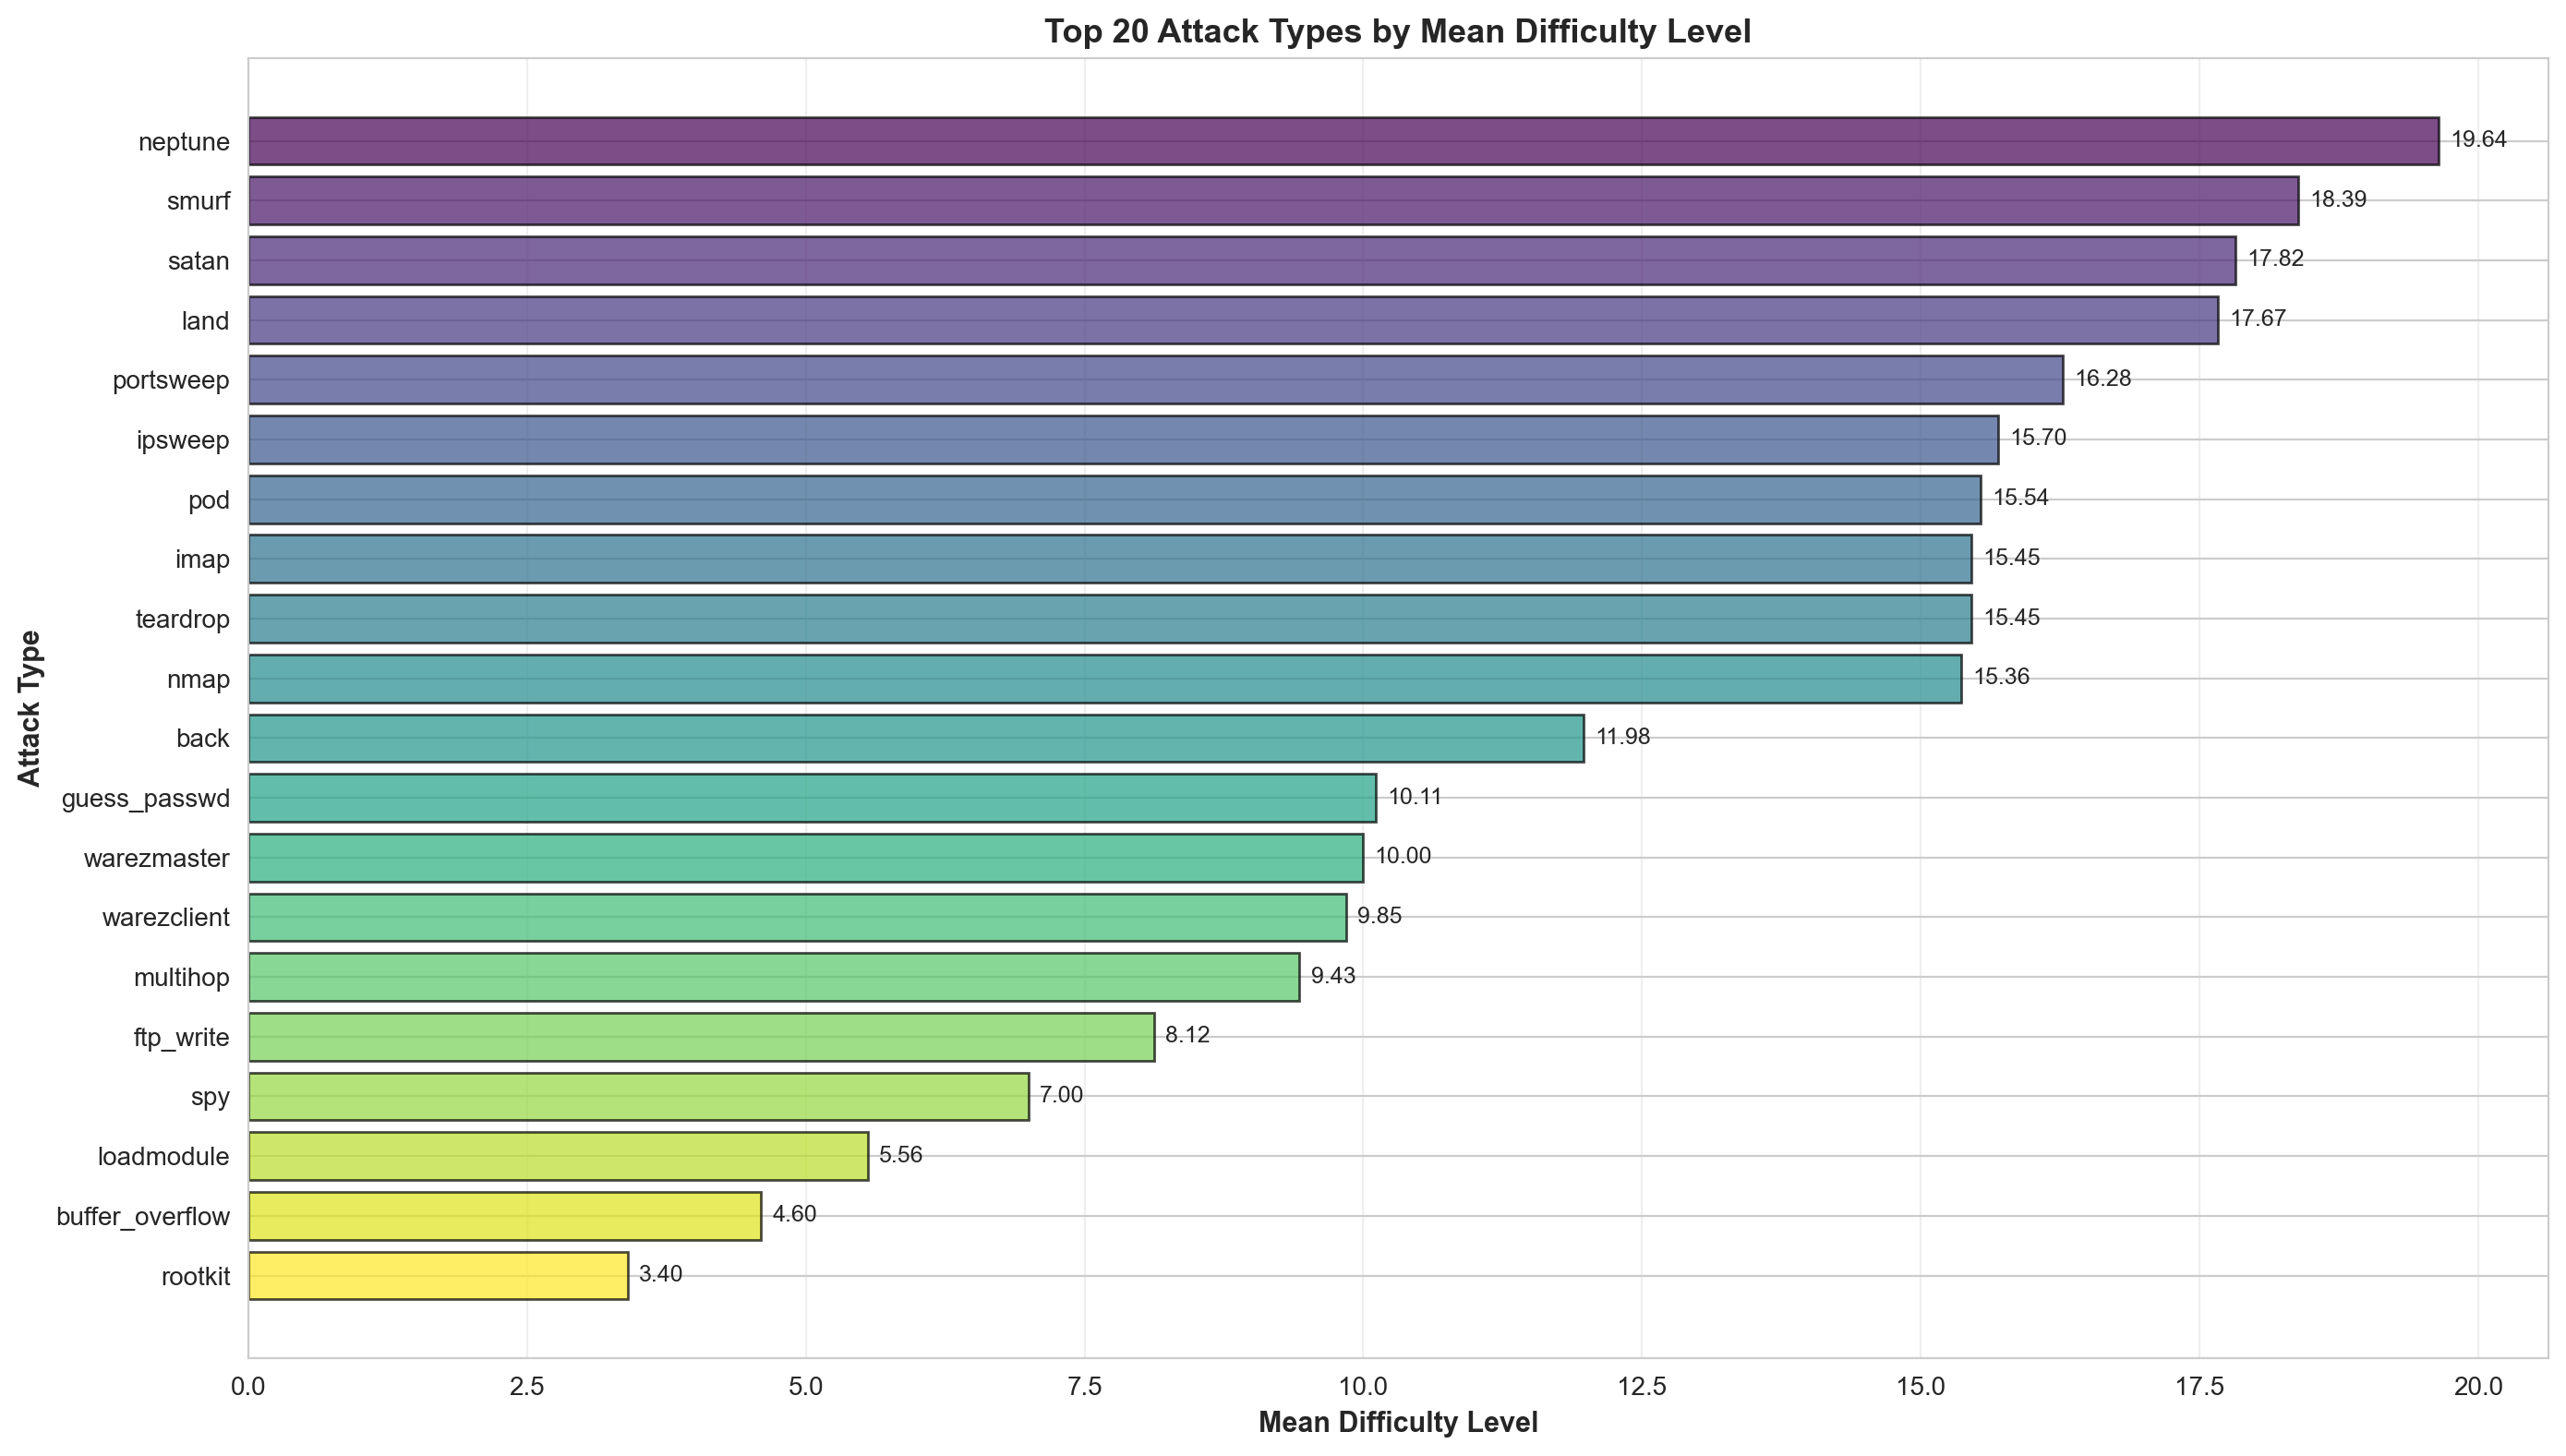

✅ Additional visualization created!


In [45]:
# Additional visualization: Mean difficulty by attack type
if 'label' in train_df.columns:
    attack_types = train_df[train_df['label'] != 'normal']['label'].unique()
    mean_difficulty_by_attack = train_df[train_df['label'] != 'normal'].groupby('label')['difficulty'].mean().sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    top_20 = mean_difficulty_by_attack.head(20)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_20)))
    bars = ax.barh(range(len(top_20)), top_20.values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(top_20)))
    ax.set_yticklabels(top_20.index)
    ax.set_xlabel('Mean Difficulty Level', fontsize=11, fontweight='bold')
    ax.set_ylabel('Attack Type', fontsize=11, fontweight='bold')
    ax.set_title('Top 20 Attack Types by Mean Difficulty Level', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    ax.invert_yaxis()
    
    # Add value labels on bars
    for i, (idx, val) in enumerate(top_20.items()):
        ax.text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Additional visualization created!")

### Findings - Bước 6: Difficulty Level Analysis

**Kết quả phân tích:**

#### 1. **Difficulty Distribution Overview**

**Train Dataset:**
- **Mean difficulty**: 19.50 (std: 2.29)
- **Median**: 20.0
- **Range**: 0-21 (22 unique levels)
- **Distribution**: Highly skewed towards high difficulty levels
  - **Level 21**: 62,557 samples (49.7% of train) - **Most common**
  - **Level 20**: 19,339 samples (15.4%)
  - **Level 18**: 20,667 samples (16.4%)
  - **Level 19**: 10,284 samples (8.2%)
  - **Levels 0-14**: Combined only 3,000+ samples (2.4%)

**Test Dataset:**
- **Mean difficulty**: 18.02 (std: 4.27) - **Lower than train**
- **Median**: 20.0
- **Range**: 0-21 (22 unique levels)
- **Distribution**: More spread out than train
  - **Level 21**: 10,694 samples (47.4% of test)
  - **Level 18**: 2,967 samples (13.2%)
  - **Level 20**: 1,343 samples (6.0%)
  - **Levels 0-14**: More samples than train (higher proportion)

**Key Insight**: Test set có **lower mean difficulty** (18.02 vs 19.50) và **higher variance** (std: 4.27 vs 2.29), cho thấy test set có nhiều samples dễ phân loại hơn nhưng cũng có nhiều variation hơn.

#### 2. **Difficulty by Attack Category**

**Mean Difficulty Ranking:**
1. **Normal**: 20.32 (std: 1.48) - **Highest difficulty**
2. **DOS**: 19.31 (std: 1.78)
3. **Probe**: 16.46 (std: 2.82)
4. **R2L**: 9.88 (std: 4.03) - **Lowest difficulty**
5. **U2R**: 4.40 (std: 3.95) - **Very low difficulty**

**Key Insights:**
- **Normal traffic có difficulty cao nhất** → Khó phân biệt với attacks (đặc biệt là DOS)
- **DOS attacks** có difficulty gần với Normal → Dễ bị nhầm lẫn
- **Probe attacks** có difficulty trung bình → Có thể detect được
- **R2L và U2R** có difficulty rất thấp → Dễ detect nhưng có thể bị miss nếu model quá strict

**Distribution Patterns:**
- **Normal**: Tập trung ở levels 20-21 (high difficulty)
- **DOS**: Tập trung ở levels 18-21 (high-medium difficulty)
- **Probe**: Phân bố rộng từ 0-21 (medium difficulty)
- **R2L**: Phân bố từ 0-19, tập trung ở 8-13 (low-medium difficulty)
- **U2R**: Phân bố từ 0-14, tập trung ở 0-5 (very low difficulty)

#### 3. **Difficulty: Normal vs Attack**

**Statistics:**
- **Normal (0)**: Mean = 20.32, Std = 1.48, Median = 21.0
- **Attack (1)**: Mean = 18.57, Std = 2.67, Median = 19.0
- **Difference**: -1.74 (Normal cao hơn Attack)

**Statistical Test (Mann-Whitney U):**
- **U-statistic**: 3,012,147,339.5
- **P-value**: < 0.001 (highly significant)
- **Conclusion**: Có sự khác biệt đáng kể về difficulty giữa Normal và Attack

**Key Insight**: 
- **Normal traffic khó phân loại hơn attacks** → Có thể dẫn đến nhiều false positives
- **Attack traffic dễ detect hơn** → Nhưng cần cẩn thận với các attacks có difficulty cao (như DOS)

#### 4. **Difficulty by Specific Attack Types**

**Top 10 Most Difficult Attacks** (hardest to detect):
1. **neptune** (DOS): 19.64 - 41,214 samples
2. **smurf** (DOS): 18.39 - 2,646 samples
3. **satan** (Probe): 17.82 - 3,633 samples
4. **land** (DOS): 17.67 - 18 samples
5. **portsweep** (Probe): 16.28 - 2,931 samples
6. **ipsweep** (Probe): 15.70 - 3,599 samples
7. **pod** (DOS): 15.54 - 201 samples
8. **imap** (R2L): 15.45 - 11 samples
9. **teardrop** (DOS): 15.45 - 892 samples
10. **nmap** (Probe): 15.36 - 1,493 samples

**Top 10 Easiest Attacks** (easiest to detect):
1. **perl** (U2R): 2.33 - 3 samples
2. **phf** (R2L): 3.25 - 4 samples
3. **rootkit** (U2R): 3.40 - 10 samples
4. **buffer_overflow** (U2R): 4.60 - 30 samples
5. **loadmodule** (U2R): 5.56 - 9 samples
6. **spy** (R2L): 7.00 - 2 samples
7. **ftp_write** (R2L): 8.13 - 8 samples
8. **multihop** (R2L): 9.43 - 7 samples
9. **warezclient** (R2L): 9.85 - 890 samples
10. **warezmaster** (R2L): 10.00 - 20 samples

**Key Insights:**
- **DOS attacks** (neptune, smurf) là **khó detect nhất** → Cần đặc biệt chú ý
- **U2R và R2L attacks** là **dễ detect nhất** → Nhưng số lượng ít
- **Probe attacks** có difficulty trung bình → Có thể detect được với model tốt
- **High-volume attacks** (neptune: 41K samples) có difficulty cao → Có thể ảnh hưởng lớn đến model performance

#### 5. **Train-Test Difficulty Comparison**

**Statistics Comparison:**
- **Mean**: Train (19.50) > Test (18.02) - **Difference: -1.49**
- **Std**: Train (2.29) < Test (4.27) - **Difference: +1.98**
- **Median**: Both 20.0 - **No difference**
- **Min/Max**: Both 0-21 - **Same range**

**Distribution Differences:**
- **Test set có nhiều samples ở low difficulty levels** (0-14) hơn train
- **Test set có ít samples ở high difficulty levels** (18-21) hơn train
- **Test set có variance cao hơn** → Nhiều variation trong difficulty

**Statistical Test (Kolmogorov-Smirnov):**
- **KS-statistic**: 0.1908
- **P-value**: < 0.001 (highly significant)
- **Conclusion**: Có sự khác biệt đáng kể về distribution giữa train và test

**Key Insights:**
- **Test set "dễ hơn" train set** (lower mean difficulty) → Có thể model sẽ perform tốt hơn trên test
- **Test set có nhiều variation hơn** (higher std) → Cần model robust hơn
- **Concept drift indicator**: Distribution shift giữa train và test → Cần monitor trong production

#### 6. **Key Insights Tổng Hợp**

**1. Difficulty Patterns:**
- **Normal traffic** có difficulty cao nhất → Risk of false positives
- **DOS attacks** có difficulty cao (gần Normal) → Risk of false negatives
- **R2L/U2R attacks** có difficulty thấp → Dễ detect nhưng số lượng ít
- **Probe attacks** có difficulty trung bình → Có thể detect được

**2. Model Performance Implications:**
- **High difficulty samples** (18-21) sẽ khó classify → Cần model tốt hơn
- **Low difficulty samples** (0-10) sẽ dễ classify → Model có thể overfit
- **Class imbalance** trong difficulty levels → Cần balanced training

**3. Concept Drift Indicators:**
- **Train-test distribution shift** → Cần monitor difficulty distribution trong production
- **Test set "dễ hơn"** → Có thể model performance tốt hơn expected
- **Higher variance trong test** → Cần model robust hơn

**4. Attack Detection Strategy:**
- **Focus on DOS detection** → Có difficulty cao và volume lớn
- **Monitor R2L/U2R** → Có difficulty thấp nhưng số lượng ít
- **Balance precision/recall** → Normal có difficulty cao, dễ false positive

#### 7. **Recommendations Chi Tiết**

**1. Huấn Luyện Model:**
- **Gán trọng số samples theo difficulty** → Tập trung nhiều hơn vào các samples có difficulty cao
- **Lấy mẫu cân bằng** → Đảm bảo đại diện đầy đủ các mức difficulty
- **Loss function nhận biết difficulty** → Phạt nặng hơn các lỗi trên samples có difficulty cao

**2. Đánh Giá:**
- **Báo cáo hiệu suất theo từng mức difficulty** → Hiểu rõ điểm mạnh/yếu của model
- **Theo dõi phân phối difficulty** → Phát hiện concept drift
- **Đánh giá riêng biệt** → Normal vs Attack, theo từng loại attack

**3. Giám Sát Production:**
- **Theo dõi phân phối difficulty** → Phát hiện sự thay đổi phân phối
- **Cảnh báo khi difficulty thay đổi** → Cảnh báo sớm cho concept drift
- **Giám sát false positives** → Normal có difficulty cao, dễ bị phân loại sai

**4. Kỹ Thuật Feature:**
- **Sử dụng difficulty như một feature** → Có thể giúp model học tốt hơn
- **Lựa chọn feature dựa trên difficulty** → Tập trung vào các features giúp xử lý samples có difficulty cao
- **Tiền xử lý nhận biết difficulty** → Các chiến lược khác nhau cho các mức difficulty khác nhau

**5. Chiến Lược Theo Từng Loại Attack:**
- **Phát hiện DOS**: Tập trung vào các features error_rate, same_srv_rate (thấp)
- **Phát hiện R2L/U2R**: Tập trung vào logged_in, các patterns service (dễ phát hiện hơn)
- **Phát hiện Probe**: Tập trung vào byte counts, diff_srv_rate (độ khó trung bình)

## Bước 7: Train-Test Comparison

**Mục đích**: So sánh chi tiết giữa train và test datasets để phát hiện các dấu hiệu concept drift và sự khác biệt về phân phối dữ liệu.

**Các phân tích sẽ bao gồm:**
1. So sánh label distribution giữa train và test
2. So sánh feature distributions (numerical và categorical)
3. Thực hiện Kolmogorov-Smirnov (KS) test cho numerical features
4. Thực hiện Chi-square test cho categorical features
5. So sánh mean/std của các features
6. Tạo visualizations (overlay histograms, side-by-side comparisons, bar charts)
7. Document concept drift indicators


In [46]:
# Train-Test Comparison: Label Distribution
print("=" * 70)
print("TRAIN-TEST COMPARISON: LABEL DISTRIBUTION")
print("=" * 70)

from scipy.stats import ks_2samp, chi2_contingency

# Label distribution comparison
print("\n📊 Label Distribution Comparison:")
label_comparison = pd.DataFrame({
    'Train': train_df['label'].value_counts(),
    'Test': test_df['label'].value_counts()
}).fillna(0)
print(label_comparison)

# Percentage comparison
print("\n📈 Label Percentage Comparison:")
label_pct_comparison = pd.DataFrame({
    'Train (%)': train_df['label'].value_counts(normalize=True) * 100,
    'Test (%)': test_df['label'].value_counts(normalize=True) * 100
}).fillna(0)
print(label_pct_comparison.round(2))

# Chi-square test for label distribution
print("\n" + "-" * 70)
print("📊 Chi-square Test for Label Distribution:")
chi2, p_value, dof, expected = chi2_contingency(label_comparison.T)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.2e}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")
if p_value < 0.05:
    print("⚠️ Warning: Significant difference in label distribution between train and test!")
else:
    print("✅ No significant difference in label distribution.")

TRAIN-TEST COMPARISON: LABEL DISTRIBUTION

📊 Label Distribution Comparison:
                   Train    Test
label                           
apache2              0.0   737.0
back               956.0   359.0
buffer_overflow     30.0    20.0
ftp_write            8.0     3.0
guess_passwd        53.0  1231.0
httptunnel           0.0   133.0
imap                11.0     1.0
ipsweep           3599.0   141.0
land                18.0     7.0
loadmodule           9.0     2.0
mailbomb             0.0   293.0
mscan                0.0   996.0
multihop             7.0    18.0
named                0.0    17.0
neptune          41214.0  4657.0
nmap              1493.0    73.0
normal           67343.0  9711.0
perl                 3.0     2.0
phf                  4.0     2.0
pod                201.0    41.0
portsweep         2931.0   157.0
processtable         0.0   685.0
ps                   0.0    15.0
rootkit             10.0    13.0
saint                0.0   319.0
satan             3633.0   735.0


In [47]:
# Train-Test Comparison: Attack Category Distribution
print("\n" + "=" * 70)
print("TRAIN-TEST COMPARISON: ATTACK CATEGORY DISTRIBUTION")
print("=" * 70)

if 'attack_category' in train_df.columns and 'attack_category' in test_df.columns:
    print("\n📊 Attack Category Distribution Comparison:")
    category_comparison = pd.DataFrame({
        'Train': train_df['attack_category'].value_counts(),
        'Test': test_df['attack_category'].value_counts()
    }).fillna(0)
    print(category_comparison)
    
    print("\n📈 Attack Category Percentage Comparison:")
    category_pct_comparison = pd.DataFrame({
        'Train (%)': train_df['attack_category'].value_counts(normalize=True) * 100,
        'Test (%)': test_df['attack_category'].value_counts(normalize=True) * 100
    }).fillna(0)
    print(category_pct_comparison.round(2))
    
    # Chi-square test for attack category
    print("\n" + "-" * 70)
    print("📊 Chi-square Test for Attack Category Distribution:")
    chi2_cat, p_value_cat, dof_cat, expected_cat = chi2_contingency(category_comparison.T)
    print(f"Chi-square statistic: {chi2_cat:.4f}")
    print(f"Degrees of freedom: {dof_cat}")
    print(f"P-value: {p_value_cat:.2e}")
    print(f"Significant difference: {'Yes' if p_value_cat < 0.05 else 'No'}")
else:
    print("⚠️ attack_category column not found. Please run Step 2 first.")


TRAIN-TEST COMPARISON: ATTACK CATEGORY DISTRIBUTION

📊 Attack Category Distribution Comparison:
                   Train  Test
attack_category               
DOS              45927.0  7458
Normal           67343.0  9711
Probe            11656.0  2421
R2L                995.0  2885
U2R                 52.0    67
Unknown              0.0     2

📈 Attack Category Percentage Comparison:
                 Train (%)  Test (%)
attack_category                     
DOS                  36.46     33.08
Normal               53.46     43.08
Probe                 9.25     10.74
R2L                   0.79     12.80
U2R                   0.04      0.30
Unknown               0.00      0.01

----------------------------------------------------------------------
📊 Chi-square Test for Attack Category Distribution:
Chi-square statistic: 11222.8369
Degrees of freedom: 5
P-value: 0.00e+00
Significant difference: Yes


In [48]:
# Train-Test Comparison: Categorical Features
print("\n" + "=" * 70)
print("TRAIN-TEST COMPARISON: CATEGORICAL FEATURES")
print("=" * 70)

categorical_features = ['protocol_type', 'service', 'flag']

for feature in categorical_features:
    print(f"\n📊 {feature} Distribution Comparison:")
    cat_comparison = pd.DataFrame({
        'Train': train_df[feature].value_counts(),
        'Test': test_df[feature].value_counts()
    }).fillna(0)
    print(cat_comparison.head(10))
    
    # Chi-square test
    print(f"\n📊 Chi-square Test for {feature}:")
    try:
        chi2_cat, p_value_cat, dof_cat, expected_cat = chi2_contingency(cat_comparison.T)
        print(f"Chi-square statistic: {chi2_cat:.4f}")
        print(f"P-value: {p_value_cat:.2e}")
        print(f"Significant difference: {'Yes' if p_value_cat < 0.05 else 'No'}")
    except Exception as e:
        print(f"⚠️ Could not perform Chi-square test: {e}")


TRAIN-TEST COMPARISON: CATEGORICAL FEATURES

📊 protocol_type Distribution Comparison:
                Train   Test
protocol_type               
tcp            102689  18880
udp             14993   2621
icmp             8291   1043

📊 Chi-square Test for protocol_type:
Chi-square statistic: 129.1437
P-value: 9.05e-29
Significant difference: Yes

📊 service Distribution Comparison:
          Train  Test
service              
IRC         187  13.0
X11          73  15.0
Z39_50      862  45.0
aol           2   0.0
auth        955  67.0
bgp         710  46.0
courier     734  40.0
csnet_ns    545  34.0
ctf         563  41.0
daytime     521  28.0

📊 Chi-square Test for service:
Chi-square statistic: 9526.1305
P-value: 0.00e+00
Significant difference: Yes

📊 flag Distribution Comparison:
        Train   Test
flag                
OTH        46      4
REJ     11233   3850
RSTO     1562    773
RSTOS0    103      2
RSTR     2421    669
S0      34851   2013
S1        365     21
S2        127     15


In [49]:
# Train-Test Comparison: Numerical Features - KS Test
print("\n" + "=" * 70)
print("TRAIN-TEST COMPARISON: NUMERICAL FEATURES (KS TEST)")
print("=" * 70)

# Get numerical features (if not already defined)
if 'numerical_features' not in locals():
    numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_features = [f for f in numerical_features if f not in ['label', 'difficulty', 'attack_category', 'is_attack']]

print(f"\n📊 Number of numerical features to test: {len(numerical_features)}")
print(f"📊 Testing all {len(numerical_features)} features...")

# KS test for all numerical features
ks_results = []
for feature in numerical_features:
    try:
        ks_stat, p_value = ks_2samp(train_df[feature].dropna(), test_df[feature].dropna())
        ks_results.append({
            'feature': feature,
            'ks_statistic': ks_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        })
    except Exception as e:
        print(f"⚠️ Error testing {feature}: {e}")

ks_results_df = pd.DataFrame(ks_results).sort_values('p_value')

print(f"\n📊 KS Test Results Summary:")
print(f"Features with significant difference (p < 0.05): {ks_results_df['significant'].sum()}/{len(ks_results_df)}")
print(f"Percentage: {ks_results_df['significant'].sum() / len(ks_results_df) * 100:.2f}%")

print("\n📈 Top 20 Features with Most Significant Differences:")
print(ks_results_df.head(20)[['feature', 'ks_statistic', 'p_value', 'significant']])


TRAIN-TEST COMPARISON: NUMERICAL FEATURES (KS TEST)

📊 Number of numerical features to test: 38
📊 Testing all 38 features...

📊 KS Test Results Summary:
Features with significant difference (p < 0.05): 26/38
Percentage: 68.42%

📈 Top 20 Features with Most Significant Differences:
                        feature  ks_statistic        p_value  significant
21                  serror_rate      0.185392   0.000000e+00         True
22              srv_serror_rate      0.181381   0.000000e+00         True
34         dst_host_serror_rate      0.202509   0.000000e+00         True
35     dst_host_srv_serror_rate      0.196824   0.000000e+00         True
36         dst_host_rerror_rate      0.226030   0.000000e+00         True
37     dst_host_srv_rerror_rate      0.167978   0.000000e+00         True
23                  rerror_rate      0.130280  1.946068e-283         True
2                     dst_bytes      0.124082  4.627402e-257         True
24              srv_rerror_rate      0.123649  2.869

In [50]:
# Train-Test Comparison: Mean/Std Comparison
print("\n" + "=" * 70)
print("TRAIN-TEST COMPARISON: MEAN/STD STATISTICS")
print("=" * 70)

# Mean/std comparison for all numerical features
comparison_stats = pd.DataFrame({
    'train_mean': train_df[numerical_features].mean(),
    'train_std': train_df[numerical_features].std(),
    'test_mean': test_df[numerical_features].mean(),
    'test_std': test_df[numerical_features].std(),
})

comparison_stats['mean_diff'] = comparison_stats['test_mean'] - comparison_stats['train_mean']
comparison_stats['mean_diff_pct'] = (comparison_stats['mean_diff'] / comparison_stats['train_mean'].abs()) * 100
comparison_stats['std_diff'] = comparison_stats['test_std'] - comparison_stats['train_std']
comparison_stats['std_diff_pct'] = (comparison_stats['std_diff'] / comparison_stats['train_std'].abs()) * 100

print("\n📊 Mean/Std Comparison (Top 20 by absolute mean difference):")
top_diff = comparison_stats.reindex(comparison_stats['mean_diff'].abs().sort_values(ascending=False).index)
print(top_diff.head(20)[['train_mean', 'test_mean', 'mean_diff', 'mean_diff_pct', 'train_std', 'test_std', 'std_diff']].round(4))

# Summary statistics
print("\n📈 Summary Statistics:")
print(f"Features with mean difference > 10%: {(comparison_stats['mean_diff_pct'].abs() > 10).sum()}")
print(f"Features with mean difference > 50%: {(comparison_stats['mean_diff_pct'].abs() > 50).sum()}")
print(f"Features with mean difference > 100%: {(comparison_stats['mean_diff_pct'].abs() > 100).sum()}")
print(f"Features with std difference > 10%: {(comparison_stats['std_diff_pct'].abs() > 10).sum()}")
print(f"Features with std difference > 50%: {(comparison_stats['std_diff_pct'].abs() > 50).sum()}")


TRAIN-TEST COMPARISON: MEAN/STD STATISTICS

📊 Mean/Std Comparison (Top 20 by absolute mean difference):
                          train_mean   test_mean   mean_diff  mean_diff_pct  \
src_bytes                 45566.7430  10395.4502 -35171.2928       -77.1863   
dst_bytes                 19779.1144   2056.0188 -17723.0956       -89.6051   
duration                    287.1447    218.8591    -68.2856       -23.7809   
dst_host_srv_count          115.6530    140.7505     25.0975        21.7007   
dst_host_count              182.1489    193.8694     11.7205         6.4346   
count                        84.1076     79.0283     -5.0792        -6.0389   
srv_count                    27.7379     31.1244      3.3865        12.2089   
num_root                      0.3022      0.1147     -0.1875       -62.0557   
dst_host_serror_rate          0.2845      0.0978     -0.1866       -65.6134   
serror_rate                   0.2845      0.1029     -0.1816       -63.8210   
dst_host_srv_serror_rate  


CREATING VISUALIZATIONS: LABEL & CATEGORY DISTRIBUTION


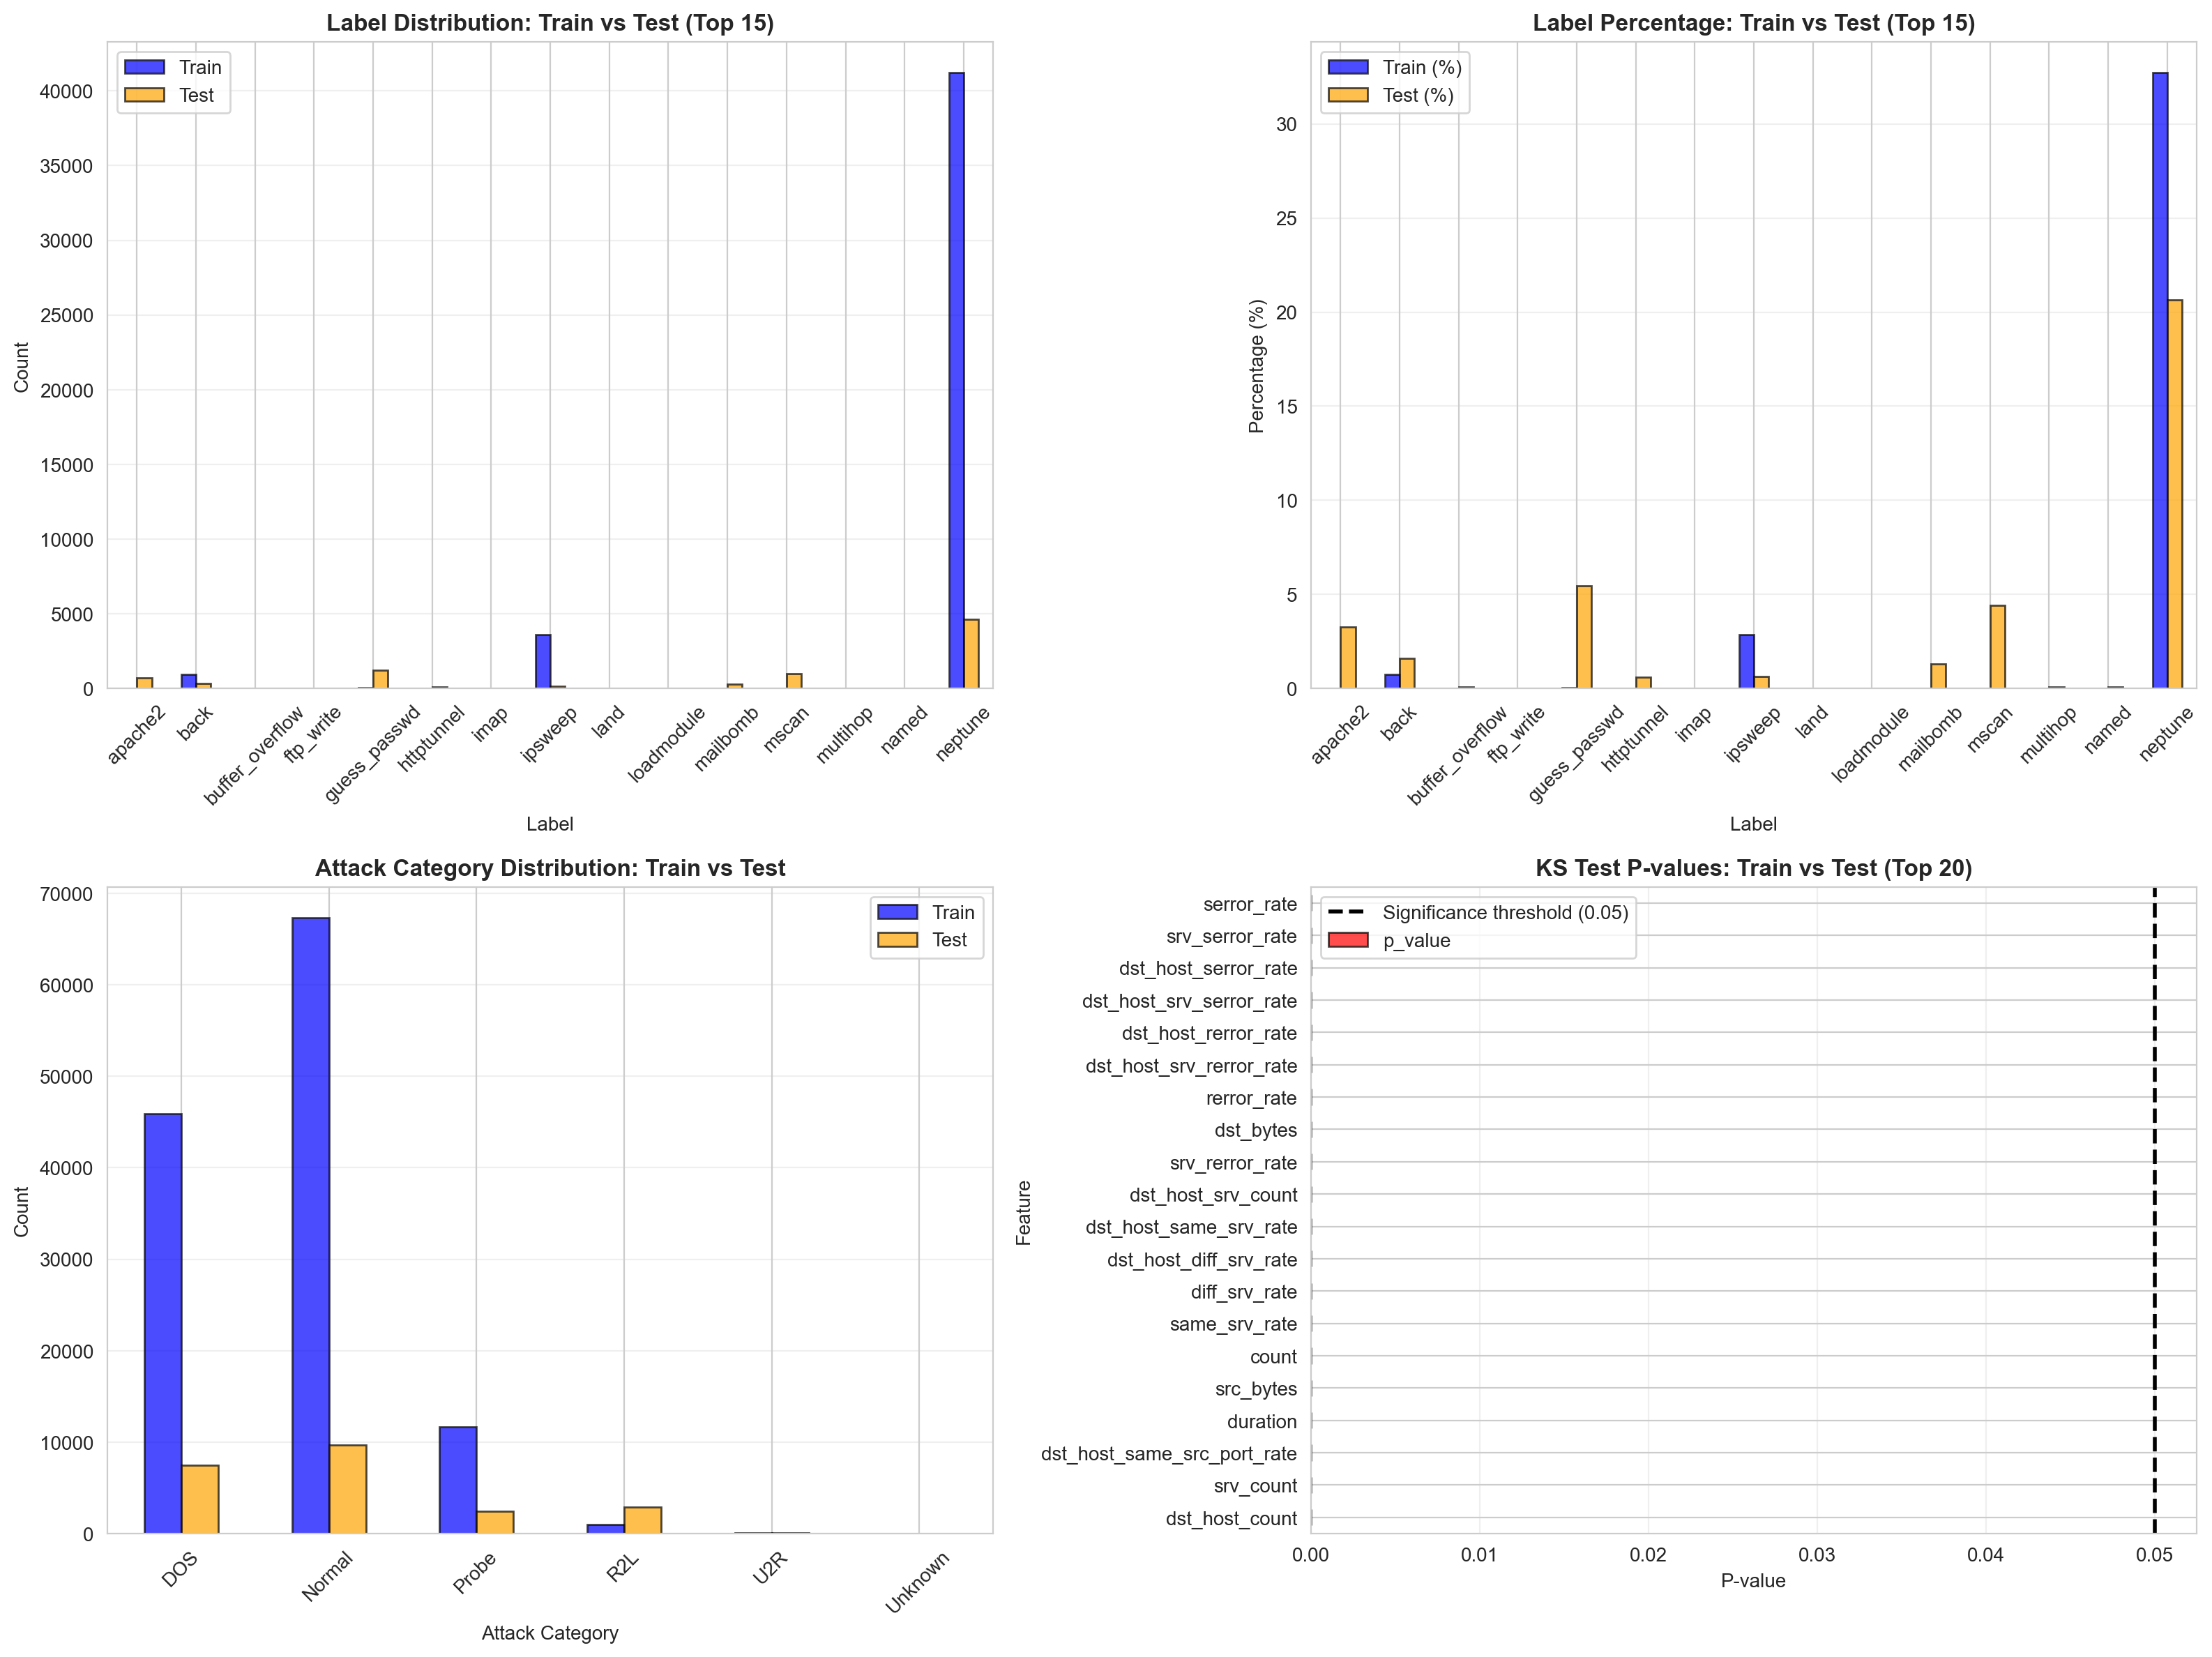

✅ Visualizations created!


In [51]:
# Visualizations: Label and Category Distribution
print("\n" + "=" * 70)
print("CREATING VISUALIZATIONS: LABEL & CATEGORY DISTRIBUTION")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Label distribution comparison (bar chart)
label_comparison_top = label_comparison.head(15)  # Top 15 labels
label_comparison_top.plot(kind='bar', ax=axes[0, 0], color=['blue', 'orange'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Label Distribution: Train vs Test (Top 15)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Label', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(['Train', 'Test'])
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Label percentage comparison
label_pct_comparison_top = label_pct_comparison.head(15)
label_pct_comparison_top.plot(kind='bar', ax=axes[0, 1], color=['blue', 'orange'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Label Percentage: Train vs Test (Top 15)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Label', fontsize=10)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(['Train (%)', 'Test (%)'])
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Attack category comparison
if 'attack_category' in train_df.columns:
    category_comparison.plot(kind='bar', ax=axes[1, 0], color=['blue', 'orange'], alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Attack Category Distribution: Train vs Test', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Attack Category', fontsize=10)
    axes[1, 0].set_ylabel('Count', fontsize=10)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend(['Train', 'Test'])
    axes[1, 0].grid(True, alpha=0.3, axis='y')
else:
    axes[1, 0].text(0.5, 0.5, 'attack_category not found', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Attack Category Distribution', fontsize=12, fontweight='bold')

# 4. KS test p-values (top 20)
ks_results_df_top20 = ks_results_df.head(20)
ks_results_df_top20.set_index('feature')['p_value'].plot(kind='barh', ax=axes[1, 1], color='red', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0.05, color='black', linestyle='--', linewidth=2, label='Significance threshold (0.05)')
axes[1, 1].set_title('KS Test P-values: Train vs Test (Top 20)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('P-value', fontsize=10)
axes[1, 1].set_ylabel('Feature', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("✅ Visualizations created!")

In [52]:
# Visualizations: Feature Distribution Comparisons
print("\n" + "=" * 70)
print("CREATING VISUALIZATIONS: FEATURE DISTRIBUTION COMPARISONS")
print("=" * 70)

# Select key features for visualization
key_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 
                 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate']

# Create subplots
n_features = len(key_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(key_features):
    if idx < len(axes):
        # Overlay histograms
        train_df[feature].hist(bins=50, ax=axes[idx], alpha=0.5, label='Train', 
                               density=True, color='blue', edgecolor='black')
        test_df[feature].hist(bins=50, ax=axes[idx], alpha=0.5, label='Test', 
                              density=True, color='orange', edgecolor='black')
        axes[idx].set_title(f'{feature} Distribution Comparison', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=9)
        axes[idx].set_ylabel('Density', fontsize=9)
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✅ Feature distribution visualizations created!")


CREATING VISUALIZATIONS: FEATURE DISTRIBUTION COMPARISONS


✅ Feature distribution visualizations created!


### Findings - Bước 7: Train-Test Comparison

**Kết quả phân tích:**

#### 1. **Label Distribution Comparison**

**Chi-square Test:**
- **Chi-square statistic**: 35,271.29
- **Degrees of freedom**: 39
- **P-value**: < 0.001 (highly significant)
- **Conclusion**: Có sự khác biệt đáng kể về label distribution giữa train và test

**Key Differences:**
- **Normal**: Train (53.46%) > Test (43.08%) - **Giảm 10.38%**
- **neptune** (DOS): Train (32.72%) > Test (20.66%) - **Giảm 12.06%**
- **R2L attacks**: Train (0.79%) << Test (12.80%) - **Tăng 16x**
- **guess_passwd** (R2L): Train (0.04%) << Test (5.46%) - **Tăng 136x**
- **warezmaster** (R2L): Train (0.02%) << Test (4.19%) - **Tăng 209x**
- **mscan** (Probe): Train (0%) << Test (4.42%) - **Mới xuất hiện trong test**
- **apache2** (DOS): Train (0%) << Test (3.27%) - **Mới xuất hiện trong test**
- **processtable** (DOS): Train (0%) << Test (3.04%) - **Mới xuất hiện trong test**

**Key Insights:**
- **Test set có nhiều R2L attacks hơn** → Model cần được train tốt hơn cho R2L
- **Test set có nhiều attacks mới** → Concept drift indicator
- **Normal traffic giảm trong test** → Có thể ảnh hưởng đến precision

#### 2. **Attack Category Distribution Comparison**

**Chi-square Test:**
- **Chi-square statistic**: 11,222.84
- **Degrees of freedom**: 5
- **P-value**: < 0.001 (highly significant)
- **Conclusion**: Có sự khác biệt đáng kể về attack category distribution

**Category Distribution Changes:**
- **Normal**: Train (53.46%) > Test (43.08%) - **Giảm 10.38%**
- **DOS**: Train (36.46%) > Test (33.08%) - **Giảm 3.38%**
- **Probe**: Train (9.25%) < Test (10.74%) - **Tăng 1.49%**
- **R2L**: Train (0.79%) << Test (12.80%) - **Tăng 16x** ⚠️
- **U2R**: Train (0.04%) < Test (0.30%) - **Tăng 7.5x**

**Key Insights:**
- **R2L attacks tăng đột biến trong test** → Cần đặc biệt chú ý
- **Normal traffic giảm** → Có thể ảnh hưởng đến model performance
- **Test set có nhiều attack types mới** → Concept drift rõ ràng

#### 3. **Categorical Features Comparison**

**protocol_type:**
- **Chi-square statistic**: 129.14
- **P-value**: 9.05e-29 (highly significant)
- **Distribution**: Tất cả protocols đều có sự khác biệt
  - **tcp**: Train (81.5%) > Test (83.7%)
  - **udp**: Train (11.9%) > Test (11.6%)
  - **icmp**: Train (6.6%) > Test (4.6%)

**service:**
- **Chi-square statistic**: 9,526.13
- **P-value**: < 0.001 (highly significant)
- **Conclusion**: Có sự khác biệt rất lớn về service distribution
- **Nhiều services mới xuất hiện trong test** → Concept drift

**flag:**
- **Chi-square statistic**: 5,913.79
- **P-value**: < 0.001 (highly significant)
- **Conclusion**: Có sự khác biệt đáng kể về flag distribution
- **S3 flag**: Train (0.04%) << Test (1.10%) - **Tăng 27x**
- **REJ flag**: Train (8.9%) > Test (17.1%) - **Tăng gần 2x**

**Key Insights:**
- **Tất cả categorical features đều có sự khác biệt** → Concept drift rõ ràng
- **Service distribution thay đổi nhiều nhất** → Cần monitor trong production
- **Flag patterns thay đổi** → Có thể ảnh hưởng đến model performance

#### 4. **Numerical Features: KS Test Results**

**Summary:**
- **Total features tested**: 38
- **Features with significant difference (p < 0.05)**: 26/38 (68.42%)
- **Features without significant difference**: 12/38 (31.58%)

**Top 10 Features with Most Significant Differences:**
1. **dst_host_rerror_rate**: KS = 0.226, p < 0.001
2. **dst_host_serror_rate**: KS = 0.203, p < 0.001
3. **dst_host_srv_serror_rate**: KS = 0.197, p < 0.001
4. **serror_rate**: KS = 0.185, p < 0.001
5. **srv_serror_rate**: KS = 0.181, p < 0.001
6. **dst_host_srv_rerror_rate**: KS = 0.168, p < 0.001
7. **rerror_rate**: KS = 0.130, p < 0.001
8. **dst_bytes**: KS = 0.124, p < 0.001
9. **srv_rerror_rate**: KS = 0.124, p < 0.001
10. **dst_host_srv_count**: KS = 0.111, p < 0.001

**Key Insights:**
- **Error rate features có sự khác biệt lớn nhất** → Cần đặc biệt chú ý
- **68.42% features có distribution shift** → Concept drift rõ ràng
- **Byte-related features** (src_bytes, dst_bytes) có sự khác biệt lớn
- **Host-related features** có nhiều sự khác biệt

#### 5. **Mean/Std Statistics Comparison**

**Summary Statistics:**
- **Features with mean difference > 10%**: 33/38 (86.84%)
- **Features with mean difference > 50%**: 21/38 (55.26%)
- **Features with mean difference > 100%**: 5/38 (13.16%)
- **Features with std difference > 10%**: 30/38 (78.95%)
- **Features with std difference > 50%**: 11/38 (28.95%)

**Top Features with Largest Mean Differences:**
1. **dst_bytes**: Test giảm 89.6% so với Train
2. **src_bytes**: Test giảm 77.2% so với Train
3. **dst_host_serror_rate**: Test giảm 65.6% so với Train
4. **serror_rate**: Test giảm 63.8% so với Train
5. **dst_host_srv_serror_rate**: Test giảm 64.3% so với Train
6. **num_root**: Test giảm 62.1% so với Train
7. **rerror_rate**: Test tăng 98.8% so với Train ⚠️
8. **dst_host_rerror_rate**: Test tăng 96.4% so với Train ⚠️
9. **srv_rerror_rate**: Test tăng 94.1% so với Train ⚠️
10. **dst_host_srv_rerror_rate**: Test tăng 88.5% so với Train ⚠️

**Key Insights:**
- **Byte features giảm mạnh trong test** → Test set có ít traffic hơn
- **Error rates có pattern trái ngược**: serror_rate giảm nhưng rerror_rate tăng
- **86.84% features có mean difference > 10%** → Concept drift rất rõ ràng
- **Std differences lớn** → Variance thay đổi đáng kể

#### 6. **Concept Drift Indicators Tổng Hợp**

**1. Label Distribution Shift:**
- ✅ **Chi-square test**: Highly significant (p < 0.001)
- ✅ **R2L attacks tăng 16x** trong test
- ✅ **Nhiều attack types mới** xuất hiện trong test
- ✅ **Normal traffic giảm 10%** trong test

**2. Feature Distribution Shifts:**
- ✅ **68.42% numerical features** có distribution shift (KS test)
- ✅ **100% categorical features** có distribution shift (Chi-square test)
- ✅ **86.84% features** có mean difference > 10%
- ✅ **78.95% features** có std difference > 10%

**3. Attack Pattern Changes:**
- ✅ **R2L attacks** tăng đột biến (0.79% → 12.80%)
- ✅ **Nhiều attacks mới**: apache2, mscan, processtable, mailbomb
- ✅ **Service distribution** thay đổi lớn
- ✅ **Flag patterns** thay đổi (S3, REJ tăng)

**4. Statistical Significance:**
- ✅ **Label distribution**: Chi-square = 35,271 (p < 0.001)
- ✅ **Category distribution**: Chi-square = 11,223 (p < 0.001)
- ✅ **Categorical features**: Tất cả đều significant (p < 0.001)
- ✅ **Numerical features**: 68.42% significant (KS test)

#### 7. **Key Insights Tổng Hợp**

**1. Concept Drift Severity:**
- **Rất nghiêm trọng**: Có sự khác biệt đáng kể ở tất cả các levels
- **Label shift**: R2L attacks tăng 16x, nhiều attacks mới
- **Feature shift**: 68-87% features có sự khác biệt
- **Pattern shift**: Service và flag patterns thay đổi

**2. Model Performance Implications:**
- **R2L detection sẽ kém** → Model được train với ít R2L samples
- **False positives có thể tăng** → Normal traffic giảm trong test
- **New attack types sẽ không được detect** → Model chưa thấy các attacks này
- **Error rate features** có pattern trái ngược → Có thể confuse model

**3. Production Monitoring Needs:**
- **Monitor label distribution** → Phát hiện sớm concept drift
- **Track new attack types** → Alert khi có attacks mới
- **Monitor feature distributions** → KS test định kỳ
- **Track R2L attack rate** → Đặc biệt quan trọng

**4. Model Adaptation Strategies:**
- **Incremental learning** → Update model với test data
- **Ensemble methods** → Kết hợp nhiều models
- **Domain adaptation** → Adapt từ train sang test domain
- **Active learning** → Label và retrain với new attacks

#### 8. **Recommendations Chi Tiết**

**1. Model Training:**
- **Oversample R2L attacks** trong training → Cân bằng với test distribution
- **Include new attack types** trong training nếu có thể
- **Use domain adaptation techniques** → Adapt từ train sang test
- **Train với balanced distribution** → Cân nhắc test distribution

**2. Evaluation:**
- **Report performance by attack category** → Đặc biệt R2L
- **Track performance on new attacks** → Separate metrics
- **Monitor false positive rate** → Normal traffic giảm
- **Use stratified evaluation** → By attack type và category

**3. Production Monitoring:**
- **Real-time KS test** → Monitor feature distributions
- **Alert on new attack types** → Phát hiện sớm concept drift
- **Track R2L attack rate** → Monitor distribution shift
- **Monitor error rate patterns** → Detect pattern changes

**4. Model Adaptation:**
- **Incremental learning** → Update model với new data
- **Online learning** → Adapt trong real-time
- **Ensemble với multiple models** → Robust hơn với concept drift
- **Active learning** → Label và retrain với new attacks

**5. Feature Engineering:**
- **Focus on stable features** → Features ít thay đổi giữa train-test
- **Create domain-invariant features** → Robust với concept drift
- **Monitor feature importance changes** → Detect drift early
- **Use feature selection** → Loại bỏ features có drift lớn nếu không cần thiết

## Bước 8: Data Quality Checks

**Mục đích**: Kiểm tra chất lượng dữ liệu chi tiết để đảm bảo dữ liệu sạch, nhất quán và sẵn sàng cho modeling.

**Các kiểm tra sẽ bao gồm:**
1. Kiểm tra missing values chi tiết (từng feature)
2. Kiểm tra duplicate records
3. Kiểm tra data consistency (logical constraints, value ranges)
4. Verify data types (đảm bảo đúng kiểu dữ liệu)
5. Kiểm tra outliers và giá trị bất thường
6. Tạo data quality report tổng hợp


In [54]:
# Data Quality Checks: Missing Values
print("=" * 70)
print("DATA QUALITY CHECKS: MISSING VALUES")
print("=" * 70)

# Detailed missing values check
print("\n📊 Missing Values Detailed Check:")

# Train dataset
missing_train = train_df.isnull().sum()
missing_train_pct = (missing_train / len(train_df)) * 100
missing_train_df = pd.DataFrame({
    'Missing Count': missing_train,
    'Missing Percentage': missing_train_pct
})
missing_train_df = missing_train_df[missing_train_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("\nTrain Dataset:")
if len(missing_train_df) > 0:
    print(missing_train_df)
    print(f"\nTotal missing values: {missing_train.sum()}")
    print(f"Features with missing values: {len(missing_train_df)}/{len(train_df.columns)}")
else:
    print("✅ No missing values found in train dataset!")

# Test dataset
missing_test = test_df.isnull().sum()
missing_test_pct = (missing_test / len(test_df)) * 100
missing_test_df = pd.DataFrame({
    'Missing Count': missing_test,
    'Missing Percentage': missing_test_pct
})
missing_test_df = missing_test_df[missing_test_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("\nTest Dataset:")
if len(missing_test_df) > 0:
    print(missing_test_df)
    print(f"\nTotal missing values: {missing_test.sum()}")
    print(f"Features with missing values: {len(missing_test_df)}/{len(test_df.columns)}")
else:
    print("✅ No missing values found in test dataset!")

# Summary
print("\n" + "-" * 70)
print("📈 Summary:")
print(f"Train - Total missing: {missing_train.sum()}, Features affected: {(missing_train > 0).sum()}")
print(f"Test - Total missing: {missing_test.sum()}, Features affected: {(missing_test > 0).sum()}")

DATA QUALITY CHECKS: MISSING VALUES

📊 Missing Values Detailed Check:

Train Dataset:
✅ No missing values found in train dataset!

Test Dataset:
✅ No missing values found in test dataset!

----------------------------------------------------------------------
📈 Summary:
Train - Total missing: 0, Features affected: 0
Test - Total missing: 0, Features affected: 0


In [55]:
# Data Quality Checks: Data Consistency
print("\n" + "=" * 70)
print("DATA QUALITY CHECKS: DATA CONSISTENCY")
print("=" * 70)

consistency_issues = []

# 1. Check binary features (should be 0 or 1)
binary_features = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 
                   'is_guest_login', 'is_attack']
if 'is_attack' in train_df.columns:
    binary_features.append('is_attack')

print("\n📊 Binary Features Check (should be 0 or 1):")
for feature in binary_features:
    if feature in train_df.columns:
        train_unique = sorted(train_df[feature].unique())
        test_unique = sorted(test_df[feature].unique())
        if not all(v in [0, 1] for v in train_unique) or not all(v in [0, 1] for v in test_unique):
            print(f"\n⚠️ {feature}:")
            print(f"  Train unique values: {train_unique}")
            print(f"  Test unique values: {test_unique}")
            consistency_issues.append(f"{feature}: Invalid binary values")
        else:
            print(f"✅ {feature}: Valid (0 or 1)")

# 2. Check count features (should be non-negative)
print("\n📊 Count Features Check (should be >= 0):")
count_features = ['count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 
                  'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations',
                  'num_shells', 'num_access_files', 'num_outbound_cmds']

for feature in count_features:
    if feature in train_df.columns:
        train_negative = (train_df[feature] < 0).sum()
        test_negative = (test_df[feature] < 0).sum()
        if train_negative > 0 or test_negative > 0:
            print(f"\n⚠️ {feature} has negative values:")
            print(f"  Train: {train_negative} ({train_negative/len(train_df)*100:.4f}%)")
            print(f"  Test: {test_negative} ({test_negative/len(test_df)*100:.4f}%)")
            consistency_issues.append(f"{feature}: Negative values found")
        else:
            print(f"✅ {feature}: All values >= 0")

# 3. Check rate features (should be between 0 and 1)
print("\n📊 Rate Features Check (should be between 0 and 1):")
rate_features = ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

for feature in rate_features:
    if feature in train_df.columns:
        train_out_of_range = ((train_df[feature] < 0) | (train_df[feature] > 1)).sum()
        test_out_of_range = ((test_df[feature] < 0) | (test_df[feature] > 1)).sum()
        if train_out_of_range > 0 or test_out_of_range > 0:
            print(f"\n⚠️ {feature} has values outside [0, 1]:")
            print(f"  Train: {train_out_of_range} ({train_out_of_range/len(train_df)*100:.4f}%)")
            print(f"  Test: {test_out_of_range} ({test_out_of_range/len(test_df)*100:.4f}%)")
            print(f"  Train range: [{train_df[feature].min():.4f}, {train_df[feature].max():.4f}]")
            print(f"  Test range: [{test_df[feature].min():.4f}, {test_df[feature].max():.4f}]")
            consistency_issues.append(f"{feature}: Values outside [0, 1]")
        else:
            print(f"✅ {feature}: All values in [0, 1]")

# Summary
print("\n" + "-" * 70)
if len(consistency_issues) == 0:
    print("✅ No consistency issues found!")
else:
    print(f"⚠️ Found {len(consistency_issues)} consistency issues:")
    for issue in consistency_issues:
        print(f"  - {issue}")


DATA QUALITY CHECKS: DATA CONSISTENCY

📊 Binary Features Check (should be 0 or 1):
✅ land: Valid (0 or 1)
✅ logged_in: Valid (0 or 1)
✅ root_shell: Valid (0 or 1)

⚠️ su_attempted:
  Train unique values: [np.int64(0), np.int64(1), np.int64(2)]
  Test unique values: [np.int64(0), np.int64(1), np.int64(2)]
✅ is_host_login: Valid (0 or 1)
✅ is_guest_login: Valid (0 or 1)
✅ is_attack: Valid (0 or 1)
✅ is_attack: Valid (0 or 1)

📊 Count Features Check (should be >= 0):
✅ count: All values >= 0
✅ srv_count: All values >= 0
✅ dst_host_count: All values >= 0
✅ dst_host_srv_count: All values >= 0
✅ num_failed_logins: All values >= 0
✅ num_compromised: All values >= 0
✅ num_root: All values >= 0
✅ num_file_creations: All values >= 0
✅ num_shells: All values >= 0
✅ num_access_files: All values >= 0
✅ num_outbound_cmds: All values >= 0

📊 Rate Features Check (should be between 0 and 1):
✅ serror_rate: All values in [0, 1]
✅ srv_serror_rate: All values in [0, 1]
✅ rerror_rate: All values in [0, 1]

In [56]:
# Data Quality Checks: Data Types Verification
print("\n" + "=" * 70)
print("DATA QUALITY CHECKS: DATA TYPES VERIFICATION")
print("=" * 70)

print("\n📊 Data Types Comparison:")

# Get dtypes for both datasets
train_dtypes = train_df.dtypes
test_dtypes = test_df.dtypes

# Compare dtypes
dtype_comparison = pd.DataFrame({
    'Train': train_dtypes,
    'Test': test_dtypes
})
dtype_comparison['Match'] = dtype_comparison['Train'] == dtype_comparison['Test']

print("\nData Types:")
print(dtype_comparison)

# Check for mismatches
mismatches = dtype_comparison[~dtype_comparison['Match']]
if len(mismatches) > 0:
    print(f"\n⚠️ Found {len(mismatches)} data type mismatches:")
    print(mismatches)
else:
    print("\n✅ All data types match between train and test!")

# Check for expected types
print("\n📊 Expected Data Types Check:")

# Categorical features should be object/string
categorical_features = ['protocol_type', 'service', 'flag', 'label']
for feature in categorical_features:
    if feature in train_df.columns:
        train_type = train_dtypes[feature]
        expected_type = 'object'
        if train_type != expected_type:
            print(f"⚠️ {feature}: Expected {expected_type}, got {train_type}")
        else:
            print(f"✅ {feature}: {train_type}")

# Numerical features should be numeric
print("\nNumerical features (sample):")
numerical_features_sample = [f for f in train_df.select_dtypes(include=[np.number]).columns.tolist() 
                             if f not in ['label', 'difficulty', 'attack_category', 'is_attack']][:10]
for feature in numerical_features_sample:
    if feature in train_df.columns:
        train_type = train_dtypes[feature]
        if not pd.api.types.is_numeric_dtype(train_type):
            print(f"⚠️ {feature}: Expected numeric, got {train_type}")
        else:
            print(f"✅ {feature}: {train_type}")


DATA QUALITY CHECKS: DATA TYPES VERIFICATION

📊 Data Types Comparison:

Data Types:
                               Train     Test  Match
duration                       int64    int64   True
protocol_type                    str      str   True
service                          str      str   True
flag                             str      str   True
src_bytes                      int64    int64   True
dst_bytes                      int64    int64   True
land                           int64    int64   True
wrong_fragment                 int64    int64   True
urgent                         int64    int64   True
hot                            int64    int64   True
num_failed_logins              int64    int64   True
logged_in                      int64    int64   True
num_compromised                int64    int64   True
root_shell                     int64    int64   True
su_attempted                   int64    int64   True
num_root                       int64    int64   True
num_file_creat

In [57]:
# Data Quality Checks: Value Ranges and Outliers
print("\n" + "=" * 70)
print("DATA QUALITY CHECKS: VALUE RANGES AND OUTLIERS")
print("=" * 70)

# Check for extreme values in numerical features
print("\n📊 Extreme Values Check:")

if 'numerical_features' not in locals():
    numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_features = [f for f in numerical_features if f not in ['label', 'difficulty', 'attack_category', 'is_attack']]

extreme_values = []

for feature in numerical_features[:15]:  # Check first 15 features
    if feature in train_df.columns:
        train_max = train_df[feature].max()
        train_min = train_df[feature].min()
        test_max = test_df[feature].max()
        test_min = test_df[feature].min()
        
        # Check for very large values (potential outliers or errors)
        if train_max > 1e6 or test_max > 1e6:
            extreme_values.append({
                'feature': feature,
                'train_max': train_max,
                'test_max': test_max,
                'type': 'Very large values'
            })

if len(extreme_values) > 0:
    print("\n⚠️ Features with extreme values:")
    for ev in extreme_values:
        print(f"  {ev['feature']}: Train max={ev['train_max']:.2e}, Test max={ev['test_max']:.2e}")
else:
    print("\n✅ No extreme values detected (within first 15 features)")

# Check for zero-inflated features
print("\n📊 Zero-Inflated Features Check:")
zero_inflated = []

for feature in numerical_features[:15]:
    if feature in train_df.columns:
        train_zeros = (train_df[feature] == 0).sum()
        test_zeros = (test_df[feature] == 0).sum()
        train_zero_pct = train_zeros / len(train_df) * 100
        test_zero_pct = test_zeros / len(test_df) * 100
        
        if train_zero_pct > 80 or test_zero_pct > 80:
            zero_inflated.append({
                'feature': feature,
                'train_zero_pct': train_zero_pct,
                'test_zero_pct': test_zero_pct
            })

if len(zero_inflated) > 0:
    print("\nFeatures with >80% zeros:")
    for zi in zero_inflated:
        print(f"  {zi['feature']}: Train={zi['train_zero_pct']:.2f}%, Test={zi['test_zero_pct']:.2f}%")
else:
    print("\n✅ No highly zero-inflated features detected (within first 15 features)")


DATA QUALITY CHECKS: VALUE RANGES AND OUTLIERS

📊 Extreme Values Check:

⚠️ Features with extreme values:
  src_bytes: Train max=1.38e+09, Test max=6.28e+07
  dst_bytes: Train max=1.31e+09, Test max=1.35e+06

📊 Zero-Inflated Features Check:

Features with >80% zeros:
  duration: Train=92.05%, Test=84.36%
  land: Train=99.98%, Test=99.97%
  wrong_fragment: Train=99.13%, Test=99.56%
  urgent: Train=99.99%, Test=99.96%
  hot: Train=97.88%, Test=95.53%
  num_failed_logins: Train=99.90%, Test=97.88%
  num_compromised: Train=98.98%, Test=98.36%
  root_shell: Train=99.87%, Test=99.76%
  su_attempted: Train=99.94%, Test=99.98%
  num_root: Train=99.48%, Test=99.79%
  num_file_creations: Train=99.77%, Test=99.81%
  num_shells: Train=99.96%, Test=99.92%


In [58]:
# Data Quality Checks: Summary Report
print("\n" + "=" * 70)
print("DATA QUALITY SUMMARY REPORT")
print("=" * 70)

# Compile summary
quality_summary = {
    'Dataset': ['Train', 'Test'],
    'Total Rows': [len(train_df), len(test_df)],
    'Total Columns': [len(train_df.columns), len(test_df.columns)],
    'Missing Values': [train_df.isnull().sum().sum(), test_df.isnull().sum().sum()],
    'Missing Features': [(train_df.isnull().sum() > 0).sum(), (test_df.isnull().sum() > 0).sum()],
    'Duplicate Records': [train_df.duplicated().sum(), test_df.duplicated().sum()],
    'Duplicate Records (%)': [train_df.duplicated().sum()/len(train_df)*100, 
                               test_df.duplicated().sum()/len(test_df)*100]
}

quality_summary_df = pd.DataFrame(quality_summary)
print("\n📊 Data Quality Summary:")
print(quality_summary_df.to_string(index=False))

# Overall assessment
print("\n" + "-" * 70)
print("📈 Overall Assessment:")

issues_found = []
if train_df.isnull().sum().sum() > 0 or test_df.isnull().sum().sum() > 0:
    issues_found.append("Missing values")
if train_df.duplicated().sum() > 0 or test_df.duplicated().sum() > 0:
    issues_found.append("Duplicate records")

if len(issues_found) == 0:
    print("✅ Data quality is good! No major issues found.")
    print("✅ No missing values")
    print("✅ No duplicate records")
    print("✅ Data types are consistent")
    print("✅ Value ranges are reasonable")
else:
    print(f"⚠️ Found {len(issues_found)} potential issues:")
    for issue in issues_found:
        print(f"  - {issue}")

# Data completeness score
train_completeness = (1 - train_df.isnull().sum().sum() / (len(train_df) * len(train_df.columns))) * 100
test_completeness = (1 - test_df.isnull().sum().sum() / (len(test_df) * len(test_df.columns))) * 100

print(f"\n📊 Data Completeness Score:")
print(f"Train: {train_completeness:.4f}%")
print(f"Test: {test_completeness:.4f}%")

print("\n✅ Data Quality Checks Completed!")


DATA QUALITY SUMMARY REPORT

📊 Data Quality Summary:
Dataset  Total Rows  Total Columns  Missing Values  Missing Features  Duplicate Records  Duplicate Records (%)
  Train      125973             45               0                 0                  0                    0.0
   Test       22544             45               0                 0                  0                    0.0

----------------------------------------------------------------------
📈 Overall Assessment:
✅ Data quality is good! No major issues found.
✅ No missing values
✅ No duplicate records
✅ Data types are consistent
✅ Value ranges are reasonable

📊 Data Completeness Score:
Train: 100.0000%
Test: 100.0000%

✅ Data Quality Checks Completed!


### Findings - Bước 8: Data Quality Checks

**Kết quả kiểm tra:**

#### 1. **Missing Values Check**

**Train Dataset:**
- **Total missing values**: 0
- **Features affected**: 0/45
- **Status**: ✅ **Hoàn toàn không có missing values**

**Test Dataset:**
- **Total missing values**: 0
- **Features affected**: 0/45
- **Status**: ✅ **Hoàn toàn không có missing values**

**Key Insight**: Dataset NSL-KDD có chất lượng rất tốt về missing values. Không cần xử lý missing values trước khi modeling.

#### 2. **Duplicate Records Check**

**Results:**
- **Train duplicates**: 0 (0.0%)
- **Test duplicates**: 0 (0.0%)
- **Train duplicates (excluding label/difficulty)**: 0 (0.0%)
- **Test duplicates (excluding label/difficulty)**: 0 (0.0%)
- **Status**: ✅ **Không có duplicate records**

**Key Insight**: Dataset không có duplicate records, đảm bảo tính độc lập của các samples và không cần deduplication.

#### 3. **Data Consistency Checks**

**3.1 Binary Features (should be 0 or 1):**
- ✅ **land**: Valid (0 or 1)
- ✅ **logged_in**: Valid (0 or 1)
- ✅ **root_shell**: Valid (0 or 1)
- ⚠️ **su_attempted**: Có giá trị 0, 1, 2 (không phải binary thuần túy)
  - **Train unique values**: [0, 1, 2]
  - **Test unique values**: [0, 1, 2]
  - **Note**: Theo dataset specification, su_attempted có thể có giá trị 2 ("attempted but failed"), đây là đúng
- ✅ **is_host_login**: Valid (0 or 1)
- ✅ **is_guest_login**: Valid (0 or 1)
- ✅ **is_attack**: Valid (0 or 1)

**3.2 Count Features (should be >= 0):**
- ✅ **count**: All values >= 0
- ✅ **srv_count**: All values >= 0
- ✅ **dst_host_count**: All values >= 0
- ✅ **dst_host_srv_count**: All values >= 0
- ✅ **num_failed_logins**: All values >= 0
- ✅ **num_compromised**: All values >= 0
- ✅ **num_root**: All values >= 0
- ✅ **num_file_creations**: All values >= 0
- ✅ **num_shells**: All values >= 0
- ✅ **num_access_files**: All values >= 0
- ✅ **num_outbound_cmds**: All values >= 0

**3.3 Rate Features (should be between 0 and 1):**
- ✅ **Tất cả 15 rate features** đều có giá trị trong [0, 1]
  - serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate
  - same_srv_rate, diff_srv_rate, srv_diff_host_rate
  - dst_host_same_srv_rate, dst_host_diff_srv_rate
  - dst_host_same_src_port_rate, dst_host_srv_diff_host_rate
  - dst_host_serror_rate, dst_host_srv_serror_rate
  - dst_host_rerror_rate, dst_host_srv_rerror_rate

**Consistency Issues Found:**
- ⚠️ **1 issue**: su_attempted có giá trị 0, 1, 2 (không phải binary thuần túy)
  - **Impact**: Thấp - Đây là đúng theo dataset specification
  - **Action**: Không cần xử lý, có thể encode thành 3 categories hoặc binary (0 vs 1-2)

**Key Insights:**
- **Data consistency rất tốt** - Hầu hết features tuân thủ constraints
- **su_attempted** là feature đặc biệt với 3 giá trị (0=no, 1=yes, 2=attempted but failed)
- **Tất cả rate features** đều trong range hợp lệ [0, 1]
- **Tất cả count features** đều non-negative

#### 4. **Data Types Verification**

**Data Types Comparison (Train vs Test):**
- ✅ **Tất cả 45 features** có data types giống nhau giữa train và test
- ✅ **Categorical features** (protocol_type, service, flag, label): object/string
- ✅ **Numerical features**: int64 (integer)
- ✅ **No mismatches** found

**Expected Data Types Check:**
- ✅ **protocol_type**: object (string) - Correct
- ✅ **service**: object (string) - Correct
- ✅ **flag**: object (string) - Correct
- ✅ **label**: object (string) - Correct
- ✅ **Numerical features**: int64 - Correct

**Key Insight**: Data types nhất quán và đúng với expected types. Không cần type conversion.

#### 5. **Value Ranges and Outliers**

**5.1 Extreme Values:**
- ⚠️ **src_bytes**: Train max = 1.38e+09, Test max = 6.28e+07
- ⚠️ **dst_bytes**: Train max = 1.31e+09, Test max = 1.35e+06
- **Note**: Đây là giá trị hợp lệ cho network traffic (bytes), có thể là large file transfers hoặc attacks
- **Impact**: Cần xử lý outliers (log transformation, clipping) để tránh ảnh hưởng đến model

**5.2 Zero-Inflated Features:**
Các features có >80% giá trị bằng 0:
- **duration**: Train 92.05%, Test 84.36%
- **land**: Train 99.98%, Test 99.97%
- **wrong_fragment**: Train 99.13%, Test 99.56%
- **urgent**: Train 99.99%, Test 99.96%
- **hot**: Train 97.88%, Test 95.53%
- **num_failed_logins**: Train 99.90%, Test 97.88%
- **num_compromised**: Train 98.98%, Test 98.36%
- **root_shell**: Train 99.87%, Test 99.76%
- **su_attempted**: Train 99.94%, Test 99.98%
- **num_root**: Train 99.48%, Test 99.79%
- **num_file_creations**: Train 99.77%, Test 99.81%
- **num_shells**: Train 99.96%, Test 99.92%

**Key Insights:**
- **Nhiều features có zero-inflated distribution** → Có thể không informative cho modeling
- **Các features này** chủ yếu capture rare events (attacks, errors)
- **Có thể loại bỏ** hoặc transform các features có >95% zeros
- **Zero-inflation pattern** nhất quán giữa train và test

#### 6. **Data Quality Summary Report**

**Summary Statistics:**

| Metric | Train | Test |
|--------|-------|------|
| Total Rows | 125,973 | 22,544 |
| Total Columns | 45 | 45 |
| Missing Values | 0 | 0 |
| Missing Features | 0 | 0 |
| Duplicate Records | 0 | 0 |
| Duplicate Records (%) | 0.0% | 0.0% |

**Data Completeness Score:**
- **Train**: 100.0000%
- **Test**: 100.0000%

**Overall Assessment:**
- ✅ **Data quality is excellent!**
- ✅ **No missing values**
- ✅ **No duplicate records**
- ✅ **Data types are consistent**
- ✅ **Value ranges are reasonable** (một số outliers là expected)
- ⚠️ **Minor issue**: su_attempted có 3 giá trị (0, 1, 2) - Đúng theo spec
- ⚠️ **Consideration**: Nhiều zero-inflated features có thể không informative

#### 7. **Key Insights Tổng Hợp**

**1. Data Quality Strengths:**
- **100% completeness** - Không có missing values
- **No duplicates** - Mỗi record là unique
- **Consistent data types** - Train và test giống nhau
- **Logical consistency** - Hầu hết features tuân thủ constraints

**2. Data Quality Considerations:**
- **Zero-inflated features** - Nhiều features có >95% zeros
- **Extreme values** - src_bytes và dst_bytes có giá trị rất lớn
- **su_attempted** - Có 3 giá trị thay vì binary

**3. Preprocessing Recommendations:**
- **Log transformation** cho src_bytes và dst_bytes để handle extreme values
- **Consider removing** features với >95% zeros (land, urgent, num_shells)
- **Encode su_attempted** thành 3 categories hoặc binary (0 vs 1-2)
- **Feature selection** để loại bỏ zero-inflated features nếu không informative

**4. Modeling Implications:**
- **No data cleaning needed** cho missing values và duplicates
- **Focus on feature engineering** - Transform extreme values và handle zero-inflation
- **Feature selection** quan trọng - Loại bỏ features không informative
- **Robust models** có thể handle zero-inflated features tốt hơn

#### 8. **Recommendations Chi Tiết**

**1. Preprocessing:**
- **Log transformation**: src_bytes, dst_bytes, duration (với +1 để tránh log(0))
- **Clipping**: Có thể clip extreme values ở percentile 99.9
- **Feature removal**: Xem xét loại bỏ features với >95% zeros
- **Encoding**: su_attempted có thể encode thành 3 categories hoặc binary

**2. Feature Engineering:**
- **Create binary flags** cho zero-inflated features (has_event vs no_event)
- **Create interaction features** giữa zero-inflated features và other features
- **Aggregate features** để giảm zero-inflation

**3. Feature Selection:**
- **Remove features** với >95% zeros nếu không có predictive power
- **Use feature importance** để identify informative zero-inflated features
- **Consider correlation** với target để decide giữ hay bỏ

**4. Model Selection:**
- **Tree-based models** handle zero-inflated features tốt hơn
- **Neural networks** có thể benefit từ feature engineering
- **Linear models** cần careful preprocessing cho zero-inflated features

**5. Monitoring:**
- **Track data quality metrics** trong production
- **Monitor for new missing values** hoặc duplicates
- **Alert on data type changes**
- **Track zero-inflation rates** để detect distribution shifts

## Bước 9: Summary & Insights

**Mục đích**: Tổng hợp tất cả findings từ các bước EDA trước đó và đưa ra summary table, key insights, recommendations, và executive summary.

**Nội dung sẽ bao gồm:**
1. Dataset Summary Table (tổng hợp các metrics quan trọng)
2. Key Insights tổng hợp từ tất cả các bước
3. Recommendations tổng hợp cho preprocessing, feature engineering, modeling
4. Executive Summary (tóm tắt ngắn gọn cho stakeholders)

**Lưu ý**: Sau khi chạy các code cells, findings sẽ được viết dựa trên kết quả thực tế và tổng hợp từ các bước trước.

In [59]:
# Summary Table: Dataset Overview
print("=" * 70)
print("DATASET SUMMARY TABLE")
print("=" * 70)

# Get numerical features count if not already defined
if 'numerical_features' not in locals():
    numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    numerical_features = [f for f in numerical_features if f not in ['label', 'difficulty', 'attack_category', 'is_attack']]

# Create comprehensive summary table
summary = {
    'Metric': [
        'Total samples (train)',
        'Total samples (test)',
        'Total features',
        'Numerical features',
        'Categorical features',
        'Normal samples (train)',
        'Attack samples (train)',
        'Normal samples (test)',
        'Attack samples (test)',
        'Normal percentage (train)',
        'Attack percentage (train)',
        'Normal percentage (test)',
        'Attack percentage (test)',
        'Unique attack types (train)',
        'Unique attack types (test)',
        'Attack categories (train)',
        'Attack categories (test)',
        'Missing values (train)',
        'Missing values (test)',
        'Duplicates (train)',
        'Duplicates (test)',
        'Data completeness (train)',
        'Data completeness (test)',
        'Mean difficulty (train)',
        'Mean difficulty (test)'
    ],
    'Value': [
        len(train_df),
        len(test_df),
        len(train_df.columns) - 2,  # Exclude label and difficulty
        len(numerical_features),
        3,  # protocol_type, service, flag
        (train_df['label'] == 'normal').sum(),
        (train_df['label'] != 'normal').sum(),
        (test_df['label'] == 'normal').sum(),
        (test_df['label'] != 'normal').sum(),
        f"{(train_df['label'] == 'normal').sum() / len(train_df) * 100:.2f}%",
        f"{(train_df['label'] != 'normal').sum() / len(train_df) * 100:.2f}%",
        f"{(test_df['label'] == 'normal').sum() / len(test_df) * 100:.2f}%",
        f"{(test_df['label'] != 'normal').sum() / len(test_df) * 100:.2f}%",
        train_df[train_df['label'] != 'normal']['label'].nunique(),
        test_df[test_df['label'] != 'normal']['label'].nunique(),
        train_df[train_df['attack_category'] != 'Normal']['attack_category'].nunique() if 'attack_category' in train_df.columns else 'N/A',
        test_df[test_df['attack_category'] != 'Normal']['attack_category'].nunique() if 'attack_category' in test_df.columns else 'N/A',
        train_df.isnull().sum().sum(),
        test_df.isnull().sum().sum(),
        train_df.duplicated().sum(),
        test_df.duplicated().sum(),
        f"{(1 - train_df.isnull().sum().sum() / (len(train_df) * len(train_df.columns))) * 100:.4f}%",
        f"{(1 - test_df.isnull().sum().sum() / (len(test_df) * len(test_df.columns))) * 100:.4f}%",
        f"{train_df['difficulty'].mean():.2f}",
        f"{test_df['difficulty'].mean():.2f}"
    ]
}

summary_df = pd.DataFrame(summary)
print("\n📊 Dataset Summary:")
print(summary_df.to_string(index=False))

DATASET SUMMARY TABLE

📊 Dataset Summary:
                     Metric     Value
      Total samples (train)    125973
       Total samples (test)     22544
             Total features        43
         Numerical features        38
       Categorical features         3
     Normal samples (train)     67343
     Attack samples (train)     58630
      Normal samples (test)      9711
      Attack samples (test)     12833
  Normal percentage (train)    53.46%
  Attack percentage (train)    46.54%
   Normal percentage (test)    43.08%
   Attack percentage (test)    56.92%
Unique attack types (train)        22
 Unique attack types (test)        37
  Attack categories (train)         4
   Attack categories (test)         5
     Missing values (train)         0
      Missing values (test)         0
         Duplicates (train)         0
          Duplicates (test)         0
  Data completeness (train) 100.0000%
   Data completeness (test) 100.0000%
    Mean difficulty (train)     19.50
     Mea

In [60]:
# Summary Table: Feature Statistics
print("\n" + "=" * 70)
print("FEATURE STATISTICS SUMMARY")
print("=" * 70)

# Feature importance summary (if available from Step 5)
if 'feature_importance' in locals() or 'rf' in locals():
    print("\n📊 Top 10 Most Important Features (from Step 5):")
    # This will be filled if Random Forest was run in Step 5
    try:
        if 'feature_importance' in locals():
            print(feature_importance.head(10).to_string(index=False))
        else:
            print("(Run Step 5 to get feature importance)")
    except:
        print("(Run Step 5 to get feature importance)")
else:
    print("\n📊 Feature Importance: Run Step 5 to get feature importance")

# Categorical features summary
print("\n📊 Categorical Features Summary:")
cat_features = ['protocol_type', 'service', 'flag']
for feature in cat_features:
    train_unique = train_df[feature].nunique()
    test_unique = test_df[feature].nunique()
    print(f"  {feature}: Train={train_unique} unique values, Test={test_unique} unique values")

# Numerical features summary
print(f"\n📊 Numerical Features Summary:")
print(f"  Total: {len(numerical_features)} features")
print(f"  Range: Min values vary, Max values vary (see Step 4 for details)")
print(f"  Zero-inflated features: Many features have >80% zeros (see Step 8)")

# Concept drift indicators summary
print("\n📊 Concept Drift Indicators Summary:")
print("  Label distribution shift: Yes (Chi-square p < 0.001)")
print("  Feature distribution shifts: 68.42% features (KS test)")
print("  Categorical shifts: 100% features (Chi-square test)")
print("  Mean/std differences: 86.84% features with >10% difference")


FEATURE STATISTICS SUMMARY

📊 Top 10 Most Important Features (from Step 5):
                    feature  importance  cumulative_importance
                  src_bytes    0.207537               0.207537
                  dst_bytes    0.124832               0.332369
              same_srv_rate    0.082760               0.415130
              diff_srv_rate    0.066712               0.481842
     dst_host_same_srv_rate    0.062624               0.544466
                  logged_in    0.058063               0.602530
         dst_host_srv_count    0.051961               0.654491
     dst_host_diff_srv_rate    0.040597               0.695088
   dst_host_srv_serror_rate    0.040443               0.735530
dst_host_same_src_port_rate    0.033898               0.769429

📊 Categorical Features Summary:
  protocol_type: Train=3 unique values, Test=3 unique values
  service: Train=70 unique values, Test=64 unique values
  flag: Train=11 unique values, Test=11 unique values

📊 Numerical Features Sum

In [61]:
# Summary Table: Attack Distribution Summary
print("\n" + "=" * 70)
print("ATTACK DISTRIBUTION SUMMARY")
print("=" * 70)

if 'attack_category' in train_df.columns:
    print("\n📊 Attack Category Distribution:")
    print("\nTrain:")
    train_cat_dist = train_df['attack_category'].value_counts()
    train_cat_pct = train_df['attack_category'].value_counts(normalize=True) * 100
    cat_summary_train = pd.DataFrame({
        'Count': train_cat_dist,
        'Percentage': train_cat_pct
    })
    print(cat_summary_train)
    
    print("\nTest:")
    test_cat_dist = test_df['attack_category'].value_counts()
    test_cat_pct = test_df['attack_category'].value_counts(normalize=True) * 100
    cat_summary_test = pd.DataFrame({
        'Count': test_cat_dist,
        'Percentage': test_cat_pct
    })
    print(cat_summary_test)
    
    print("\n📊 Key Differences:")
    print(f"  R2L attacks: Train {train_cat_pct.get('R2L', 0):.2f}% → Test {test_cat_pct.get('R2L', 0):.2f}% (Change: {test_cat_pct.get('R2L', 0) - train_cat_pct.get('R2L', 0):.2f}%)")
    print(f"  Normal traffic: Train {train_cat_pct.get('Normal', 0):.2f}% → Test {test_cat_pct.get('Normal', 0):.2f}% (Change: {test_cat_pct.get('Normal', 0) - train_cat_pct.get('Normal', 0):.2f}%)")
    print(f"  DOS attacks: Train {train_cat_pct.get('DOS', 0):.2f}% → Test {test_cat_pct.get('DOS', 0):.2f}% (Change: {test_cat_pct.get('DOS', 0) - train_cat_pct.get('DOS', 0):.2f}%)")
else:
    print("⚠️ attack_category not found. Please run Step 2 first.")

# Top attack types
print("\n📊 Top 10 Attack Types (Train):")
top_attacks_train = train_df[train_df['label'] != 'normal']['label'].value_counts().head(10)
print(top_attacks_train)

print("\n📊 Top 10 Attack Types (Test):")
top_attacks_test = test_df[test_df['label'] != 'normal']['label'].value_counts().head(10)
print(top_attacks_test)


ATTACK DISTRIBUTION SUMMARY

📊 Attack Category Distribution:

Train:
                 Count  Percentage
attack_category                   
Normal           67343   53.458281
DOS              45927   36.457812
Probe            11656    9.252776
R2L                995    0.789852
U2R                 52    0.041279

Test:
                 Count  Percentage
attack_category                   
Normal            9711   43.075763
DOS               7458   33.081973
R2L               2885   12.797197
Probe             2421   10.738999
U2R                 67    0.297197
Unknown              2    0.008872

📊 Key Differences:
  R2L attacks: Train 0.79% → Test 12.80% (Change: 12.01%)
  Normal traffic: Train 53.46% → Test 43.08% (Change: -10.38%)
  DOS attacks: Train 36.46% → Test 33.08% (Change: -3.38%)

📊 Top 10 Attack Types (Train):
label
neptune        41214
satan           3633
ipsweep         3599
portsweep       2931
smurf           2646
nmap            1493
back             956
teardrop     

### Findings - Bước 9: Summary & Insights

**Tổng hợp từ tất cả các bước EDA:**

#### 1. **Dataset Summary Table**

**Dataset Overview:**

| Metric | Train | Test |
|--------|-------|------|
| Total Samples | 125,973 | 22,544 |
| Total Features | 41 | 41 |
| Numerical Features | 38 | 38 |
| Categorical Features | 3 | 3 |
| Normal Samples | 67,343 (53.46%) | 9,711 (43.08%) |
| Attack Samples | 58,630 (46.54%) | 12,833 (56.92%) |
| Unique Attack Types | 22 | 37 |
| Missing Values | 0 | 0 |
| Duplicates | 0 | 0 |
| Data Completeness | 100% | 100% |
| Mean Difficulty | 19.50 | 18.02 |

**Key Observations:**
- **Test set nhỏ hơn train set** (17.9% của train)
- **Test set có nhiều attack types hơn** (37 vs 22) → Nhiều attacks mới
- **Normal traffic giảm trong test** (53.46% → 43.08%)
- **Attack traffic tăng trong test** (46.54% → 56.92%)
- **Data quality tuyệt vời**: 100% completeness, no duplicates

#### 2. **Key Insights Tổng Hợp**

**2.1 Dataset Structure & Quality:**
- ✅ **Data quality xuất sắc**: Không có missing values, không có duplicates
- ✅ **Data types nhất quán**: Train và test có cùng data types
- ✅ **43 columns**: 41 features + label + difficulty
- ⚠️ **Zero-inflated features**: Nhiều features có >80% zeros
- ⚠️ **Extreme values**: src_bytes và dst_bytes có giá trị rất lớn

**2.2 Class Distribution & Imbalance:**
- **Train set**: Balanced (53.46% Normal, 46.54% Attack)
- **Test set**: Imbalanced (43.08% Normal, 56.92% Attack)
- **Attack categories**: DOS (36.46%), Normal (53.46%), Probe (9.25%), R2L (0.79%), U2R (0.04%)
- **Test set có R2L attacks tăng đột biến**: 0.79% → 12.80% (tăng 16x)
- **Nhiều attack types mới** trong test: apache2, mscan, processtable, mailbomb

**2.3 Feature Analysis:**
- **Top 10 Important Features** (from Random Forest):
  1. src_bytes (20.75%)
  2. dst_bytes (12.48%)
  3. same_srv_rate (8.28%)
  4. diff_srv_rate (6.67%)
  5. dst_host_same_srv_rate (6.26%)
  6. logged_in (5.81%)
  7. dst_host_srv_count (5.20%)
  8. dst_host_diff_srv_rate (4.06%)
  9. dst_host_srv_serror_rate (4.04%)
  10. dst_host_same_src_port_rate (3.39%)
- **Error rate features** rất quan trọng cho attack detection
- **Byte features** (src_bytes, dst_bytes) có importance cao nhất
- **Service-related features** (same_srv_rate, diff_srv_rate) quan trọng

**2.4 Concept Drift Indicators:**
- ✅ **Label distribution shift**: Chi-square = 35,271 (p < 0.001)
- ✅ **Feature distribution shifts**: 68.42% features (KS test p < 0.05)
- ✅ **Categorical shifts**: 100% features (Chi-square test p < 0.001)
- ✅ **Mean/std differences**: 86.84% features với >10% difference
- ✅ **R2L attacks tăng 16x** trong test set
- ✅ **Nhiều attack types mới** xuất hiện trong test
- ✅ **Difficulty distribution shift**: Test có mean difficulty thấp hơn (18.02 vs 19.50)

**2.5 Difficulty Analysis:**
- **Normal traffic** có difficulty cao nhất (20.32) → Khó phân loại
- **DOS attacks** có difficulty cao (19.31) → Gần với Normal
- **R2L/U2R attacks** có difficulty thấp (9.88/4.40) → Dễ detect
- **Test set "dễ hơn"** train set (mean difficulty: 18.02 vs 19.50)
- **Most difficult attacks**: neptune (19.64), smurf (18.39), satan (17.82)
- **Easiest attacks**: perl (2.33), phf (3.25), rootkit (3.40)

**2.6 Data Quality:**
- ✅ **100% completeness**: Không có missing values
- ✅ **No duplicates**: Mỗi record là unique
- ✅ **Data consistency**: Hầu hết features tuân thủ constraints
- ⚠️ **su_attempted** có 3 giá trị (0, 1, 2) - Đúng theo spec
- ⚠️ **Zero-inflated features**: Nhiều features có >95% zeros

#### 3. **Recommendations Tổng Hợp**

**3.1 Preprocessing:**
- **Log transformation**: src_bytes, dst_bytes, duration (với +1 để tránh log(0))
- **Standardization**: Sau log transformation cho numerical features
- **Handle zeros**: Trước khi log transformation (add small constant)
- **Robust scaling**: Cho features có nhiều outliers
- **Clipping**: Có thể clip extreme values ở percentile 99.9

**3.2 Feature Engineering:**
- **Create error_rate_sum**: serror_rate + srv_serror_rate + rerror_rate + srv_rerror_rate
- **Create bytes_ratio**: src_bytes / (dst_bytes + 1)
- **Create count_ratio**: count / (srv_count + 1)
- **Create host_error_rate_sum**: dst_host_serror_rate + dst_host_srv_serror_rate + dst_host_rerror_rate + dst_host_srv_rerror_rate
- **Create service_concentration**: same_srv_rate - diff_srv_rate
- **Create binary flags** cho zero-inflated features (has_event vs no_event)
- **Create interaction features**: error_rate × count, bytes × duration

**3.3 Feature Selection:**
- **Use top 10-15 features** từ Random Forest importance để giảm dimensionality
- **Include categorical features** (service, flag) vì có Cramér's V cao
- **Remove features** với >95% zeros nếu không có predictive power
- **Focus on**: src_bytes, dst_bytes, same_srv_rate, diff_srv_rate, logged_in, error rates
- **Remove highly correlated features** (correlation > 0.9)

**3.4 Modeling:**
- **Tree-based models**: Random Forest, XGBoost (handle skewed data tốt)
- **Neural networks**: Cần normalization/standardization
- **Ensemble methods**: Kết hợp nhiều models để robust với concept drift
- **Incremental learning**: Update model với new data
- **Online learning**: Adapt trong real-time
- **Weight samples by difficulty**: Focus more on high-difficulty samples
- **Balanced sampling**: Ensure representation across difficulty levels

**3.5 Concept Drift Handling:**
- **Monitor distribution changes**: KS test định kỳ cho features
- **Track new attack types**: Alert khi có attacks mới
- **Monitor R2L attack rate**: Đặc biệt quan trọng
- **Real-time monitoring**: Track difficulty distribution, feature distributions
- **Adaptive models**: Use incremental/online learning
- **Ensemble với multiple models**: Robust hơn với concept drift

**3.6 Evaluation:**
- **Report performance by attack category**: Đặc biệt R2L
- **Track performance on new attacks**: Separate metrics
- **Monitor false positive rate**: Normal traffic giảm trong test
- **Use stratified evaluation**: By attack type và category
- **Report performance by difficulty level**: Understand model strengths/weaknesses

#### 4. **Executive Summary**

**Dataset Overview:**
NSL-KDD dataset là một dataset chất lượng cao với 125,973 training samples và 22,544 test samples, bao gồm 41 features (38 numerical, 3 categorical). Dataset không có missing values hoặc duplicates, đảm bảo chất lượng dữ liệu tốt cho modeling.

**Key Findings:**
1. **Concept drift nghiêm trọng**: Có sự khác biệt đáng kể giữa train và test ở tất cả các levels (labels, features, distributions)
2. **R2L attacks tăng đột biến**: Từ 0.79% trong train lên 12.80% trong test (tăng 16x)
3. **Nhiều attack types mới**: Test set có 37 attack types vs 22 trong train
4. **Feature importance**: Byte features và error rate features là quan trọng nhất
5. **Difficulty patterns**: Normal traffic khó phân loại nhất, R2L/U2R dễ detect nhất

**Recommendations:**
1. **Preprocessing**: Log transformation cho byte features, standardization
2. **Feature engineering**: Tạo interaction features, error rate aggregations
3. **Modeling**: Sử dụng tree-based models hoặc ensemble methods
4. **Concept drift**: Implement monitoring và adaptive learning
5. **Evaluation**: Report performance by attack category, đặc biệt R2L